# Generalised Multiple Artificial Neural Network Training

This script creates and trains a generalised artificial neural network for each of the output pixels in the reconstruction process.

The system is trained using the classical reconstruction methods obtained from the inverse problem as the outputs and the differential voltages obtained from the forward probelm.

The input to the system is 208 differnetial voltage signals measured in a single frame.

The output of the network is the reconstructed image (P outputs), where P is the density of the FEM model.

In [0]:
input_data_name = '50k_32_c_pureElemData_input_data.csv'
output_data_name = '50k_32_c_pureElemData_output_data.csv'

data_path = '/content/gdrive/My Drive/Colab Notebooks/data/'
save_path = '/content/gdrive/My Drive/Colab Notebooks/MANN/b2c_32_256_sgd_mann/'

P = 256 #output pixels
hidden_layer_neurons = 10;

output_network_name = 'b2c_nonoise_208_'+str(hidden_layer_neurons)+'_'+str(P)+'mann_';



In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import pandas as pd
import numpy as np
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import io
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

from sklearn import preprocessing

Using TensorFlow backend.


## Input data: N trias x 208 voltages
## Output Data: N trials x P pixel_elements 

Each row represents one trial of data or one simulation
Each column is a feature.

In [0]:
in_df = pd.read_csv(data_path+input_data_name, delimiter=',', prefix="Trial", skiprows=0, header=None)
out_df = pd.read_csv(data_path+output_data_name, delimiter=',', prefix="Trial", skiprows=0, header=None)



input_data = in_df.values
output_data = out_df.values

P = output_data.shape[1]

In [0]:
es = EarlyStopping(monitor='loss',
                   mode = 'min',
                   verbose = 1,
                   patience = 50,
                   restore_best_weights=True)

In [6]:
sgd = tf.keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)


#Create each model
index = 0;
mann = []
for x in tqdm(range(P)):
  mann.append(tf.keras.Sequential([ tf.keras.layers.Dense(units=256, activation='relu', input_dim=256),
                                    tf.keras.layers.Dense(units=hidden_layer_neurons, activation='relu'),
                                    tf.keras.layers.Dense(units=1, activation='linear') ]) )
  mann[index].compile(loss='mean_squared_error', optimizer=sgd)
  index+=1



100%|██████████| 256/256 [00:20<00:00, 12.76it/s]


In [7]:
index = 0;
for x in tqdm(mann):
  x.fit(input_data,np.array([output_data[:,index]]).T, validation_split = 0.15, epochs=20, shuffle=True, callbacks=[es], verbose=2)
  index+=1

  0%|          | 0/256 [00:00<?, ?it/s]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 18s - loss: 0.0641 - val_loss: 0.0552
Epoch 2/20
42500/42500 - 3s - loss: 0.0536 - val_loss: 0.0552
Epoch 3/20
42500/42500 - 3s - loss: 0.0536 - val_loss: 0.0553
Epoch 4/20
42500/42500 - 3s - loss: 0.0536 - val_loss: 0.0552
Epoch 5/20
42500/42500 - 3s - loss: 0.0536 - val_loss: 0.0554
Epoch 6/20
42500/42500 - 3s - loss: 0.0536 - val_loss: 0.0553
Epoch 7/20
42500/42500 - 3s - loss: 0.0536 - val_loss: 0.0553
Epoch 8/20
42500/42500 - 4s - loss: 0.0536 - val_loss: 0.0552
Epoch 9/20
42500/42500 - 3s - loss: 0.0536 - val_loss: 0.0553
Epoch 10/20
42500/42500 - 3s - loss: 0.0536 - val_loss: 0.0553
Epoch 11/20
42500/42500 - 3s - loss: 0.0536 - val_loss: 0.0553
Epoch 12/20
42500/42500 - 3s - loss: 0.0536 - val_loss: 0.0552
Epoch 13/20
42500/42500 - 3s - loss: 0.0535 - val_loss: 0.0554
Epoch 14/20
42500/42500 - 3s - loss: 0.0536 - val_loss: 0.0553
Epoch 15/20
42500/42500 - 3s - loss: 0.0536 - val_loss: 0.0553
Epoch 16/20
42

  0%|          | 1/256 [01:20<5:42:37, 80.62s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0663 - val_loss: 0.0539
Epoch 2/20
42500/42500 - 4s - loss: 0.0534 - val_loss: 0.0539
Epoch 3/20
42500/42500 - 4s - loss: 0.0535 - val_loss: 0.0539
Epoch 4/20
42500/42500 - 4s - loss: 0.0535 - val_loss: 0.0539
Epoch 5/20
42500/42500 - 4s - loss: 0.0535 - val_loss: 0.0539
Epoch 6/20
42500/42500 - 4s - loss: 0.0534 - val_loss: 0.0539
Epoch 7/20
42500/42500 - 4s - loss: 0.0534 - val_loss: 0.0539
Epoch 8/20
42500/42500 - 4s - loss: 0.0535 - val_loss: 0.0539
Epoch 9/20
42500/42500 - 4s - loss: 0.0535 - val_loss: 0.0539
Epoch 10/20
42500/42500 - 3s - loss: 0.0535 - val_loss: 0.0539
Epoch 11/20
42500/42500 - 3s - loss: 0.0535 - val_loss: 0.0540
Epoch 12/20
42500/42500 - 3s - loss: 0.0535 - val_loss: 0.0539
Epoch 13/20
42500/42500 - 3s - loss: 0.0535 - val_loss: 0.0539
Epoch 14/20
42500/42500 - 3s - loss: 0.0535 - val_loss: 0.0540
Epoch 15/20
42500/42500 - 3s - loss: 0.0535 - val_loss: 0.0540
Epoch 16/20
425

  1%|          | 2/256 [02:31<5:29:22, 77.80s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0653 - val_loss: 0.0529
Epoch 2/20
42500/42500 - 3s - loss: 0.0547 - val_loss: 0.0529
Epoch 3/20
42500/42500 - 4s - loss: 0.0547 - val_loss: 0.0531
Epoch 4/20
42500/42500 - 4s - loss: 0.0547 - val_loss: 0.0529
Epoch 5/20
42500/42500 - 4s - loss: 0.0547 - val_loss: 0.0529
Epoch 6/20
42500/42500 - 4s - loss: 0.0547 - val_loss: 0.0533
Epoch 7/20
42500/42500 - 3s - loss: 0.0547 - val_loss: 0.0529
Epoch 8/20
42500/42500 - 3s - loss: 0.0547 - val_loss: 0.0532
Epoch 9/20
42500/42500 - 3s - loss: 0.0547 - val_loss: 0.0530
Epoch 10/20
42500/42500 - 4s - loss: 0.0547 - val_loss: 0.0530
Epoch 11/20
42500/42500 - 4s - loss: 0.0547 - val_loss: 0.0529
Epoch 12/20
42500/42500 - 4s - loss: 0.0547 - val_loss: 0.0529
Epoch 13/20
42500/42500 - 4s - loss: 0.0547 - val_loss: 0.0529
Epoch 14/20
42500/42500 - 4s - loss: 0.0547 - val_loss: 0.0530
Epoch 15/20
42500/42500 - 4s - loss: 0.0547 - val_loss: 0.0529
Epoch 16/20
425

  1%|          | 3/256 [03:46<5:24:30, 76.96s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0670 - val_loss: 0.0532
Epoch 2/20
42500/42500 - 4s - loss: 0.0542 - val_loss: 0.0531
Epoch 3/20
42500/42500 - 3s - loss: 0.0543 - val_loss: 0.0531
Epoch 4/20
42500/42500 - 3s - loss: 0.0542 - val_loss: 0.0532
Epoch 5/20
42500/42500 - 3s - loss: 0.0542 - val_loss: 0.0531
Epoch 6/20
42500/42500 - 3s - loss: 0.0542 - val_loss: 0.0534
Epoch 7/20
42500/42500 - 4s - loss: 0.0542 - val_loss: 0.0536
Epoch 8/20
42500/42500 - 3s - loss: 0.0542 - val_loss: 0.0531
Epoch 9/20
42500/42500 - 4s - loss: 0.0542 - val_loss: 0.0531
Epoch 10/20
42500/42500 - 3s - loss: 0.0542 - val_loss: 0.0531
Epoch 11/20
42500/42500 - 4s - loss: 0.0542 - val_loss: 0.0531
Epoch 12/20
42500/42500 - 3s - loss: 0.0543 - val_loss: 0.0532
Epoch 13/20
42500/42500 - 4s - loss: 0.0542 - val_loss: 0.0532
Epoch 14/20
42500/42500 - 4s - loss: 0.0542 - val_loss: 0.0534
Epoch 15/20
42500/42500 - 4s - loss: 0.0542 - val_loss: 0.0534
Epoch 16/20
425

  2%|▏         | 4/256 [05:01<5:19:57, 76.18s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0640 - val_loss: 0.0549
Epoch 2/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0548
Epoch 3/20
42500/42500 - 4s - loss: 0.0499 - val_loss: 0.0549
Epoch 4/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0549
Epoch 5/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0548
Epoch 6/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0548
Epoch 7/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0549
Epoch 8/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0551
Epoch 9/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0550
Epoch 10/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0551
Epoch 11/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0549
Epoch 12/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0548
Epoch 13/20
42500/42500 - 4s - loss: 0.0499 - val_loss: 0.0549
Epoch 14/20
42500/42500 - 4s - loss: 0.0499 - val_loss: 0.0550
Epoch 15/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0551
Epoch 16/20
425

  2%|▏         | 5/256 [06:08<5:07:47, 73.57s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0637 - val_loss: 0.0514
Epoch 2/20
42500/42500 - 4s - loss: 0.0490 - val_loss: 0.0514
Epoch 3/20
42500/42500 - 3s - loss: 0.0489 - val_loss: 0.0513
Epoch 4/20
42500/42500 - 3s - loss: 0.0489 - val_loss: 0.0513
Epoch 5/20
42500/42500 - 3s - loss: 0.0489 - val_loss: 0.0514
Epoch 6/20
42500/42500 - 3s - loss: 0.0489 - val_loss: 0.0512
Epoch 7/20
42500/42500 - 3s - loss: 0.0490 - val_loss: 0.0512
Epoch 8/20
42500/42500 - 3s - loss: 0.0489 - val_loss: 0.0512
Epoch 9/20
42500/42500 - 3s - loss: 0.0489 - val_loss: 0.0513
Epoch 10/20
42500/42500 - 3s - loss: 0.0489 - val_loss: 0.0514
Epoch 11/20
42500/42500 - 3s - loss: 0.0489 - val_loss: 0.0512
Epoch 12/20
42500/42500 - 3s - loss: 0.0489 - val_loss: 0.0513
Epoch 13/20
42500/42500 - 3s - loss: 0.0489 - val_loss: 0.0513
Epoch 14/20
42500/42500 - 3s - loss: 0.0489 - val_loss: 0.0513
Epoch 15/20
42500/42500 - 3s - loss: 0.0490 - val_loss: 0.0513
Epoch 16/20
425

  2%|▏         | 6/256 [07:15<4:58:12, 71.57s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0618 - val_loss: 0.0519
Epoch 2/20
42500/42500 - 3s - loss: 0.0519 - val_loss: 0.0518
Epoch 3/20
42500/42500 - 3s - loss: 0.0519 - val_loss: 0.0518
Epoch 4/20
42500/42500 - 3s - loss: 0.0520 - val_loss: 0.0519
Epoch 5/20
42500/42500 - 3s - loss: 0.0519 - val_loss: 0.0522
Epoch 6/20
42500/42500 - 3s - loss: 0.0519 - val_loss: 0.0518
Epoch 7/20
42500/42500 - 3s - loss: 0.0519 - val_loss: 0.0526
Epoch 8/20
42500/42500 - 3s - loss: 0.0520 - val_loss: 0.0518
Epoch 9/20
42500/42500 - 3s - loss: 0.0520 - val_loss: 0.0518
Epoch 10/20
42500/42500 - 3s - loss: 0.0519 - val_loss: 0.0518
Epoch 11/20
42500/42500 - 3s - loss: 0.0519 - val_loss: 0.0522
Epoch 12/20
42500/42500 - 3s - loss: 0.0520 - val_loss: 0.0525
Epoch 13/20
42500/42500 - 3s - loss: 0.0520 - val_loss: 0.0521
Epoch 14/20
42500/42500 - 3s - loss: 0.0519 - val_loss: 0.0519
Epoch 15/20
42500/42500 - 3s - loss: 0.0519 - val_loss: 0.0518
Epoch 16/20
425

  3%|▎         | 7/256 [08:23<4:52:28, 70.48s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0594 - val_loss: 0.0490
Epoch 2/20
42500/42500 - 4s - loss: 0.0511 - val_loss: 0.0490
Epoch 3/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0490
Epoch 4/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0505
Epoch 5/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0491
Epoch 6/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0492
Epoch 7/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0490
Epoch 8/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0492
Epoch 9/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0492
Epoch 10/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0490
Epoch 11/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0490
Epoch 12/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0491
Epoch 13/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0490
Epoch 14/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0493
Epoch 15/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0491
Epoch 16/20
425

  3%|▎         | 8/256 [09:29<4:46:20, 69.27s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0595 - val_loss: 0.0547
Epoch 2/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0546
Epoch 3/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0546
Epoch 4/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0546
Epoch 5/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0547
Epoch 6/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0546
Epoch 7/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0547
Epoch 8/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0549
Epoch 9/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0547
Epoch 10/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0546
Epoch 11/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0546
Epoch 12/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0547
Epoch 13/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0547
Epoch 14/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0548
Epoch 15/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0548
Epoch 16/20
425

  4%|▎         | 9/256 [10:34<4:38:55, 67.75s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0569 - val_loss: 0.0587
Epoch 2/20
42500/42500 - 4s - loss: 0.0511 - val_loss: 0.0587
Epoch 3/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0585
Epoch 4/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0584
Epoch 5/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0588
Epoch 6/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0594
Epoch 7/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0584
Epoch 8/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0584
Epoch 9/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0585
Epoch 10/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0584
Epoch 11/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0583
Epoch 12/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0583
Epoch 13/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0584
Epoch 14/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0587
Epoch 15/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0594
Epoch 16/20
425

  4%|▍         | 10/256 [11:40<4:35:40, 67.24s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0609 - val_loss: 0.0516
Epoch 2/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0517
Epoch 3/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0520
Epoch 4/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0517
Epoch 5/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0516
Epoch 6/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0516
Epoch 7/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0516
Epoch 8/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0518
Epoch 9/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0516
Epoch 10/20
42500/42500 - 4s - loss: 0.0502 - val_loss: 0.0518
Epoch 11/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0518
Epoch 12/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0519
Epoch 13/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0516
Epoch 14/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0516
Epoch 15/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0516
Epoch 16/20
425

  4%|▍         | 11/256 [12:45<4:32:42, 66.78s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0643 - val_loss: 0.0559
Epoch 2/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0562
Epoch 3/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0560
Epoch 4/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0560
Epoch 5/20
42500/42500 - 4s - loss: 0.0506 - val_loss: 0.0560
Epoch 6/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0560
Epoch 7/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0560
Epoch 8/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0562
Epoch 9/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0560
Epoch 10/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0564
Epoch 11/20
42500/42500 - 4s - loss: 0.0506 - val_loss: 0.0560
Epoch 12/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0559
Epoch 13/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0561
Epoch 14/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0563
Epoch 15/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0560
Epoch 16/20
425

  5%|▍         | 12/256 [13:56<4:35:58, 67.86s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0595 - val_loss: 0.0533
Epoch 2/20
42500/42500 - 3s - loss: 0.0518 - val_loss: 0.0532
Epoch 3/20
42500/42500 - 4s - loss: 0.0519 - val_loss: 0.0534
Epoch 4/20
42500/42500 - 4s - loss: 0.0518 - val_loss: 0.0534
Epoch 5/20
42500/42500 - 4s - loss: 0.0518 - val_loss: 0.0532
Epoch 6/20
42500/42500 - 4s - loss: 0.0519 - val_loss: 0.0534
Epoch 7/20
42500/42500 - 3s - loss: 0.0518 - val_loss: 0.0532
Epoch 8/20
42500/42500 - 3s - loss: 0.0518 - val_loss: 0.0532
Epoch 9/20
42500/42500 - 3s - loss: 0.0518 - val_loss: 0.0532
Epoch 10/20
42500/42500 - 4s - loss: 0.0518 - val_loss: 0.0533
Epoch 11/20
42500/42500 - 3s - loss: 0.0518 - val_loss: 0.0532
Epoch 12/20
42500/42500 - 3s - loss: 0.0519 - val_loss: 0.0532
Epoch 13/20
42500/42500 - 4s - loss: 0.0518 - val_loss: 0.0532
Epoch 14/20
42500/42500 - 4s - loss: 0.0518 - val_loss: 0.0532
Epoch 15/20
42500/42500 - 4s - loss: 0.0518 - val_loss: 0.0536
Epoch 16/20
425

  5%|▌         | 13/256 [15:11<4:43:10, 69.92s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0596 - val_loss: 0.0521
Epoch 2/20
42500/42500 - 4s - loss: 0.0529 - val_loss: 0.0522
Epoch 3/20
42500/42500 - 3s - loss: 0.0529 - val_loss: 0.0521
Epoch 4/20
42500/42500 - 4s - loss: 0.0529 - val_loss: 0.0523
Epoch 5/20
42500/42500 - 3s - loss: 0.0529 - val_loss: 0.0531
Epoch 6/20
42500/42500 - 4s - loss: 0.0529 - val_loss: 0.0521
Epoch 7/20
42500/42500 - 4s - loss: 0.0529 - val_loss: 0.0525
Epoch 8/20
42500/42500 - 3s - loss: 0.0529 - val_loss: 0.0521
Epoch 9/20
42500/42500 - 3s - loss: 0.0529 - val_loss: 0.0521
Epoch 10/20
42500/42500 - 3s - loss: 0.0529 - val_loss: 0.0521
Epoch 11/20
42500/42500 - 3s - loss: 0.0529 - val_loss: 0.0523
Epoch 12/20
42500/42500 - 3s - loss: 0.0529 - val_loss: 0.0521
Epoch 13/20
42500/42500 - 3s - loss: 0.0529 - val_loss: 0.0524
Epoch 14/20
42500/42500 - 3s - loss: 0.0529 - val_loss: 0.0521
Epoch 15/20
42500/42500 - 3s - loss: 0.0529 - val_loss: 0.0524
Epoch 16/20
425

  5%|▌         | 14/256 [16:19<4:39:57, 69.41s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0648 - val_loss: 0.0513
Epoch 2/20
42500/42500 - 4s - loss: 0.0516 - val_loss: 0.0512
Epoch 3/20
42500/42500 - 3s - loss: 0.0516 - val_loss: 0.0516
Epoch 4/20
42500/42500 - 3s - loss: 0.0516 - val_loss: 0.0512
Epoch 5/20
42500/42500 - 3s - loss: 0.0516 - val_loss: 0.0512
Epoch 6/20
42500/42500 - 3s - loss: 0.0516 - val_loss: 0.0512
Epoch 7/20
42500/42500 - 3s - loss: 0.0516 - val_loss: 0.0513
Epoch 8/20
42500/42500 - 3s - loss: 0.0516 - val_loss: 0.0513
Epoch 9/20
42500/42500 - 3s - loss: 0.0516 - val_loss: 0.0513
Epoch 10/20
42500/42500 - 3s - loss: 0.0516 - val_loss: 0.0513
Epoch 11/20
42500/42500 - 3s - loss: 0.0516 - val_loss: 0.0512
Epoch 12/20
42500/42500 - 3s - loss: 0.0516 - val_loss: 0.0512
Epoch 13/20
42500/42500 - 3s - loss: 0.0516 - val_loss: 0.0513
Epoch 14/20
42500/42500 - 3s - loss: 0.0516 - val_loss: 0.0512
Epoch 15/20
42500/42500 - 3s - loss: 0.0516 - val_loss: 0.0513
Epoch 16/20
425

  6%|▌         | 15/256 [17:26<4:35:36, 68.62s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0619 - val_loss: 0.0499
Epoch 2/20
42500/42500 - 3s - loss: 0.0533 - val_loss: 0.0499
Epoch 3/20
42500/42500 - 3s - loss: 0.0533 - val_loss: 0.0499
Epoch 4/20
42500/42500 - 3s - loss: 0.0533 - val_loss: 0.0500
Epoch 5/20
42500/42500 - 3s - loss: 0.0533 - val_loss: 0.0499
Epoch 6/20
42500/42500 - 3s - loss: 0.0533 - val_loss: 0.0499
Epoch 7/20
42500/42500 - 3s - loss: 0.0533 - val_loss: 0.0503
Epoch 8/20
42500/42500 - 3s - loss: 0.0533 - val_loss: 0.0501
Epoch 9/20
42500/42500 - 3s - loss: 0.0533 - val_loss: 0.0501
Epoch 10/20
42500/42500 - 3s - loss: 0.0533 - val_loss: 0.0499
Epoch 11/20
42500/42500 - 3s - loss: 0.0533 - val_loss: 0.0500
Epoch 12/20
42500/42500 - 3s - loss: 0.0533 - val_loss: 0.0500
Epoch 13/20
42500/42500 - 3s - loss: 0.0533 - val_loss: 0.0499
Epoch 14/20
42500/42500 - 3s - loss: 0.0533 - val_loss: 0.0499
Epoch 15/20
42500/42500 - 3s - loss: 0.0533 - val_loss: 0.0500
Epoch 16/20
425

  6%|▋         | 16/256 [18:31<4:30:08, 67.53s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0612 - val_loss: 0.0546
Epoch 2/20
42500/42500 - 3s - loss: 0.0514 - val_loss: 0.0548
Epoch 3/20
42500/42500 - 3s - loss: 0.0514 - val_loss: 0.0547
Epoch 4/20
42500/42500 - 3s - loss: 0.0514 - val_loss: 0.0547
Epoch 5/20
42500/42500 - 3s - loss: 0.0514 - val_loss: 0.0547
Epoch 6/20
42500/42500 - 3s - loss: 0.0514 - val_loss: 0.0546
Epoch 7/20
42500/42500 - 3s - loss: 0.0514 - val_loss: 0.0547
Epoch 8/20
42500/42500 - 3s - loss: 0.0514 - val_loss: 0.0546
Epoch 9/20
42500/42500 - 3s - loss: 0.0514 - val_loss: 0.0548
Epoch 10/20
42500/42500 - 3s - loss: 0.0514 - val_loss: 0.0550
Epoch 11/20
42500/42500 - 3s - loss: 0.0514 - val_loss: 0.0546
Epoch 12/20
42500/42500 - 3s - loss: 0.0514 - val_loss: 0.0547
Epoch 13/20
42500/42500 - 3s - loss: 0.0514 - val_loss: 0.0547
Epoch 14/20
42500/42500 - 3s - loss: 0.0514 - val_loss: 0.0546
Epoch 15/20
42500/42500 - 3s - loss: 0.0514 - val_loss: 0.0549
Epoch 16/20
425

  7%|▋         | 17/256 [19:36<4:26:05, 66.80s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0616 - val_loss: 0.0581
Epoch 2/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0581
Epoch 3/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0581
Epoch 4/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0582
Epoch 5/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0588
Epoch 6/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0583
Epoch 7/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0583
Epoch 8/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0582
Epoch 9/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0585
Epoch 10/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0587
Epoch 11/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0582
Epoch 12/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0582
Epoch 13/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0584
Epoch 14/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0583
Epoch 15/20
42500/42500 - 3s - loss: 0.0511 - val_loss: 0.0583
Epoch 16/20
425

  7%|▋         | 18/256 [20:42<4:23:53, 66.53s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0669 - val_loss: 0.0537
Epoch 2/20
42500/42500 - 3s - loss: 0.0498 - val_loss: 0.0536
Epoch 3/20
42500/42500 - 3s - loss: 0.0498 - val_loss: 0.0536
Epoch 4/20
42500/42500 - 3s - loss: 0.0498 - val_loss: 0.0537
Epoch 5/20
42500/42500 - 3s - loss: 0.0498 - val_loss: 0.0538
Epoch 6/20
42500/42500 - 3s - loss: 0.0498 - val_loss: 0.0537
Epoch 7/20
42500/42500 - 3s - loss: 0.0498 - val_loss: 0.0536
Epoch 8/20
42500/42500 - 3s - loss: 0.0498 - val_loss: 0.0538
Epoch 9/20
42500/42500 - 3s - loss: 0.0498 - val_loss: 0.0537
Epoch 10/20
42500/42500 - 3s - loss: 0.0498 - val_loss: 0.0536
Epoch 11/20
42500/42500 - 3s - loss: 0.0498 - val_loss: 0.0536
Epoch 12/20
42500/42500 - 3s - loss: 0.0498 - val_loss: 0.0538
Epoch 13/20
42500/42500 - 3s - loss: 0.0498 - val_loss: 0.0536
Epoch 14/20
42500/42500 - 3s - loss: 0.0498 - val_loss: 0.0536
Epoch 15/20
42500/42500 - 3s - loss: 0.0498 - val_loss: 0.0536
Epoch 16/20
425

  7%|▋         | 19/256 [21:46<4:19:54, 65.80s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0563 - val_loss: 0.0557
Epoch 2/20
42500/42500 - 3s - loss: 0.0507 - val_loss: 0.0557
Epoch 3/20
42500/42500 - 3s - loss: 0.0507 - val_loss: 0.0555
Epoch 4/20
42500/42500 - 3s - loss: 0.0507 - val_loss: 0.0558
Epoch 5/20
42500/42500 - 3s - loss: 0.0507 - val_loss: 0.0555
Epoch 6/20
42500/42500 - 3s - loss: 0.0507 - val_loss: 0.0555
Epoch 7/20
42500/42500 - 3s - loss: 0.0507 - val_loss: 0.0556
Epoch 8/20
42500/42500 - 3s - loss: 0.0507 - val_loss: 0.0555
Epoch 9/20
42500/42500 - 3s - loss: 0.0507 - val_loss: 0.0557
Epoch 10/20
42500/42500 - 3s - loss: 0.0507 - val_loss: 0.0556
Epoch 11/20
42500/42500 - 3s - loss: 0.0507 - val_loss: 0.0557
Epoch 12/20
42500/42500 - 3s - loss: 0.0507 - val_loss: 0.0557
Epoch 13/20
42500/42500 - 3s - loss: 0.0507 - val_loss: 0.0556
Epoch 14/20
42500/42500 - 3s - loss: 0.0507 - val_loss: 0.0555
Epoch 15/20
42500/42500 - 3s - loss: 0.0507 - val_loss: 0.0557
Epoch 16/20
425

  8%|▊         | 20/256 [22:50<4:17:06, 65.37s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0642 - val_loss: 0.0530
Epoch 2/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0528
Epoch 3/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0528
Epoch 4/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0528
Epoch 5/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0528
Epoch 6/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0527
Epoch 7/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0527
Epoch 8/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0528
Epoch 9/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0528
Epoch 10/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0527
Epoch 11/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0529
Epoch 12/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0534
Epoch 13/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0527
Epoch 14/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0527
Epoch 15/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0527
Epoch 16/20
425

  8%|▊         | 21/256 [23:56<4:16:12, 65.41s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0604 - val_loss: 0.0533
Epoch 2/20
42500/42500 - 3s - loss: 0.0515 - val_loss: 0.0533
Epoch 3/20
42500/42500 - 3s - loss: 0.0515 - val_loss: 0.0533
Epoch 4/20
42500/42500 - 3s - loss: 0.0515 - val_loss: 0.0533
Epoch 5/20
42500/42500 - 3s - loss: 0.0515 - val_loss: 0.0536
Epoch 6/20
42500/42500 - 3s - loss: 0.0515 - val_loss: 0.0533
Epoch 7/20
42500/42500 - 3s - loss: 0.0515 - val_loss: 0.0535
Epoch 8/20
42500/42500 - 3s - loss: 0.0515 - val_loss: 0.0533
Epoch 9/20
42500/42500 - 3s - loss: 0.0515 - val_loss: 0.0533
Epoch 10/20
42500/42500 - 3s - loss: 0.0515 - val_loss: 0.0533
Epoch 11/20
42500/42500 - 3s - loss: 0.0515 - val_loss: 0.0543
Epoch 12/20
42500/42500 - 3s - loss: 0.0515 - val_loss: 0.0533
Epoch 13/20
42500/42500 - 3s - loss: 0.0515 - val_loss: 0.0533
Epoch 14/20
42500/42500 - 3s - loss: 0.0515 - val_loss: 0.0533
Epoch 15/20
42500/42500 - 3s - loss: 0.0515 - val_loss: 0.0536
Epoch 16/20
425

  9%|▊         | 22/256 [25:02<4:16:06, 65.67s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0610 - val_loss: 0.0493
Epoch 2/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0493
Epoch 3/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0495
Epoch 4/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0493
Epoch 5/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0495
Epoch 6/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0493
Epoch 7/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0493
Epoch 8/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0493
Epoch 9/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0492
Epoch 10/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0493
Epoch 11/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0493
Epoch 12/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0494
Epoch 13/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0493
Epoch 14/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0493
Epoch 15/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0496
Epoch 16/20
425

  9%|▉         | 23/256 [26:06<4:13:38, 65.31s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0595 - val_loss: 0.0496
Epoch 2/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0494
Epoch 3/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0496
Epoch 4/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0494
Epoch 5/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0495
Epoch 6/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0497
Epoch 7/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0495
Epoch 8/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0495
Epoch 9/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0494
Epoch 10/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0494
Epoch 11/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0494
Epoch 12/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0495
Epoch 13/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0495
Epoch 14/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0495
Epoch 15/20
42500/42500 - 3s - loss: 0.0517 - val_loss: 0.0494
Epoch 16/20
425

  9%|▉         | 24/256 [27:12<4:13:24, 65.54s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0622 - val_loss: 0.0506
Epoch 2/20
42500/42500 - 3s - loss: 0.0516 - val_loss: 0.0505
Epoch 3/20
42500/42500 - 3s - loss: 0.0516 - val_loss: 0.0505
Epoch 4/20
42500/42500 - 3s - loss: 0.0515 - val_loss: 0.0505
Epoch 5/20
42500/42500 - 3s - loss: 0.0515 - val_loss: 0.0507
Epoch 6/20
42500/42500 - 3s - loss: 0.0516 - val_loss: 0.0506
Epoch 7/20
42500/42500 - 3s - loss: 0.0515 - val_loss: 0.0505
Epoch 8/20
42500/42500 - 3s - loss: 0.0516 - val_loss: 0.0506
Epoch 9/20
42500/42500 - 3s - loss: 0.0516 - val_loss: 0.0507
Epoch 10/20
42500/42500 - 3s - loss: 0.0516 - val_loss: 0.0505
Epoch 11/20
42500/42500 - 3s - loss: 0.0515 - val_loss: 0.0505
Epoch 12/20
42500/42500 - 3s - loss: 0.0516 - val_loss: 0.0506
Epoch 13/20
42500/42500 - 3s - loss: 0.0515 - val_loss: 0.0506
Epoch 14/20
42500/42500 - 3s - loss: 0.0515 - val_loss: 0.0505
Epoch 15/20
42500/42500 - 3s - loss: 0.0515 - val_loss: 0.0506
Epoch 16/20
425

 10%|▉         | 25/256 [28:17<4:11:34, 65.34s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0630 - val_loss: 0.0611
Epoch 2/20
42500/42500 - 3s - loss: 0.0532 - val_loss: 0.0611
Epoch 3/20
42500/42500 - 3s - loss: 0.0532 - val_loss: 0.0609
Epoch 4/20
42500/42500 - 3s - loss: 0.0532 - val_loss: 0.0610
Epoch 5/20
42500/42500 - 3s - loss: 0.0532 - val_loss: 0.0611
Epoch 6/20
42500/42500 - 3s - loss: 0.0532 - val_loss: 0.0614
Epoch 7/20
42500/42500 - 3s - loss: 0.0532 - val_loss: 0.0609
Epoch 8/20
42500/42500 - 3s - loss: 0.0532 - val_loss: 0.0616
Epoch 9/20
42500/42500 - 3s - loss: 0.0532 - val_loss: 0.0613
Epoch 10/20
42500/42500 - 3s - loss: 0.0532 - val_loss: 0.0615
Epoch 11/20
42500/42500 - 3s - loss: 0.0532 - val_loss: 0.0612
Epoch 12/20
42500/42500 - 3s - loss: 0.0532 - val_loss: 0.0613
Epoch 13/20
42500/42500 - 3s - loss: 0.0532 - val_loss: 0.0610
Epoch 14/20
42500/42500 - 3s - loss: 0.0532 - val_loss: 0.0610
Epoch 15/20
42500/42500 - 3s - loss: 0.0532 - val_loss: 0.0614
Epoch 16/20
425

 10%|█         | 26/256 [29:22<4:09:36, 65.11s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0564 - val_loss: 0.0574
Epoch 2/20
42500/42500 - 3s - loss: 0.0509 - val_loss: 0.0575
Epoch 3/20
42500/42500 - 3s - loss: 0.0509 - val_loss: 0.0574
Epoch 4/20
42500/42500 - 3s - loss: 0.0509 - val_loss: 0.0574
Epoch 5/20
42500/42500 - 3s - loss: 0.0509 - val_loss: 0.0573
Epoch 6/20
42500/42500 - 3s - loss: 0.0509 - val_loss: 0.0574
Epoch 7/20
42500/42500 - 3s - loss: 0.0509 - val_loss: 0.0573
Epoch 8/20
42500/42500 - 3s - loss: 0.0509 - val_loss: 0.0577
Epoch 9/20
42500/42500 - 3s - loss: 0.0509 - val_loss: 0.0574
Epoch 10/20
42500/42500 - 3s - loss: 0.0509 - val_loss: 0.0573
Epoch 11/20
42500/42500 - 3s - loss: 0.0509 - val_loss: 0.0577
Epoch 12/20
42500/42500 - 3s - loss: 0.0509 - val_loss: 0.0574
Epoch 13/20
42500/42500 - 3s - loss: 0.0509 - val_loss: 0.0578
Epoch 14/20
42500/42500 - 3s - loss: 0.0509 - val_loss: 0.0573
Epoch 15/20
42500/42500 - 3s - loss: 0.0509 - val_loss: 0.0575
Epoch 16/20
425

 11%|█         | 27/256 [30:28<4:09:20, 65.33s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0613 - val_loss: 0.0537
Epoch 2/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0537
Epoch 3/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0538
Epoch 4/20
42500/42500 - 3s - loss: 0.0500 - val_loss: 0.0537
Epoch 5/20
42500/42500 - 3s - loss: 0.0500 - val_loss: 0.0536
Epoch 6/20
42500/42500 - 3s - loss: 0.0500 - val_loss: 0.0536
Epoch 7/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0536
Epoch 8/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0536
Epoch 9/20
42500/42500 - 3s - loss: 0.0500 - val_loss: 0.0538
Epoch 10/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0537
Epoch 11/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0539
Epoch 12/20
42500/42500 - 3s - loss: 0.0500 - val_loss: 0.0536
Epoch 13/20
42500/42500 - 3s - loss: 0.0500 - val_loss: 0.0537
Epoch 14/20
42500/42500 - 4s - loss: 0.0501 - val_loss: 0.0537
Epoch 15/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0539
Epoch 16/20
425

 11%|█         | 28/256 [31:35<4:11:08, 66.09s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0602 - val_loss: 0.0534
Epoch 2/20
42500/42500 - 3s - loss: 0.0520 - val_loss: 0.0535
Epoch 3/20
42500/42500 - 3s - loss: 0.0520 - val_loss: 0.0539
Epoch 4/20
42500/42500 - 3s - loss: 0.0520 - val_loss: 0.0534
Epoch 5/20
42500/42500 - 3s - loss: 0.0520 - val_loss: 0.0535
Epoch 6/20
42500/42500 - 3s - loss: 0.0520 - val_loss: 0.0535
Epoch 7/20
42500/42500 - 3s - loss: 0.0520 - val_loss: 0.0534
Epoch 8/20
42500/42500 - 3s - loss: 0.0520 - val_loss: 0.0537
Epoch 9/20
42500/42500 - 3s - loss: 0.0520 - val_loss: 0.0535
Epoch 10/20
42500/42500 - 3s - loss: 0.0520 - val_loss: 0.0535
Epoch 11/20
42500/42500 - 3s - loss: 0.0520 - val_loss: 0.0534
Epoch 12/20
42500/42500 - 3s - loss: 0.0520 - val_loss: 0.0534
Epoch 13/20
42500/42500 - 3s - loss: 0.0520 - val_loss: 0.0534
Epoch 14/20
42500/42500 - 3s - loss: 0.0520 - val_loss: 0.0534
Epoch 15/20
42500/42500 - 3s - loss: 0.0520 - val_loss: 0.0534
Epoch 16/20
425

 11%|█▏        | 29/256 [32:42<4:10:39, 66.25s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0571 - val_loss: 0.0569
Epoch 2/20
42500/42500 - 4s - loss: 0.0507 - val_loss: 0.0569
Epoch 3/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0570
Epoch 4/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0572
Epoch 5/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0567
Epoch 6/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0567
Epoch 7/20
42500/42500 - 3s - loss: 0.0507 - val_loss: 0.0570
Epoch 8/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0576
Epoch 9/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0569
Epoch 10/20
42500/42500 - 3s - loss: 0.0507 - val_loss: 0.0569
Epoch 11/20
42500/42500 - 3s - loss: 0.0507 - val_loss: 0.0567
Epoch 12/20
42500/42500 - 3s - loss: 0.0507 - val_loss: 0.0572
Epoch 13/20
42500/42500 - 3s - loss: 0.0507 - val_loss: 0.0568
Epoch 14/20
42500/42500 - 3s - loss: 0.0507 - val_loss: 0.0568
Epoch 15/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0570
Epoch 16/20
425

 12%|█▏        | 30/256 [33:50<4:11:55, 66.88s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0617 - val_loss: 0.0535
Epoch 2/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0536
Epoch 3/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0535
Epoch 4/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0536
Epoch 5/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0535
Epoch 6/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0535
Epoch 7/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0536
Epoch 8/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0536
Epoch 9/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0535
Epoch 10/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0535
Epoch 11/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0535
Epoch 12/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0535
Epoch 13/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0535
Epoch 14/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0535
Epoch 15/20
42500/42500 - 3s - loss: 0.0502 - val_loss: 0.0541
Epoch 16/20
425

 12%|█▏        | 31/256 [34:56<4:09:18, 66.48s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0617 - val_loss: 0.0541
Epoch 2/20
42500/42500 - 3s - loss: 0.0528 - val_loss: 0.0541
Epoch 3/20
42500/42500 - 3s - loss: 0.0528 - val_loss: 0.0541
Epoch 4/20
42500/42500 - 3s - loss: 0.0528 - val_loss: 0.0541
Epoch 5/20
42500/42500 - 3s - loss: 0.0528 - val_loss: 0.0541
Epoch 6/20
42500/42500 - 3s - loss: 0.0528 - val_loss: 0.0544
Epoch 7/20
42500/42500 - 3s - loss: 0.0528 - val_loss: 0.0541
Epoch 8/20
42500/42500 - 3s - loss: 0.0528 - val_loss: 0.0541
Epoch 9/20
42500/42500 - 3s - loss: 0.0528 - val_loss: 0.0542
Epoch 10/20
42500/42500 - 3s - loss: 0.0528 - val_loss: 0.0541
Epoch 11/20
42500/42500 - 3s - loss: 0.0528 - val_loss: 0.0544
Epoch 12/20
42500/42500 - 3s - loss: 0.0528 - val_loss: 0.0541
Epoch 13/20
42500/42500 - 3s - loss: 0.0528 - val_loss: 0.0541
Epoch 14/20
42500/42500 - 3s - loss: 0.0528 - val_loss: 0.0542
Epoch 15/20
42500/42500 - 3s - loss: 0.0528 - val_loss: 0.0541
Epoch 16/20
425

 12%|█▎        | 32/256 [36:01<4:06:20, 65.98s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0586 - val_loss: 0.0517
Epoch 2/20
42500/42500 - 3s - loss: 0.0522 - val_loss: 0.0517
Epoch 3/20
42500/42500 - 3s - loss: 0.0522 - val_loss: 0.0517
Epoch 4/20
42500/42500 - 3s - loss: 0.0521 - val_loss: 0.0517
Epoch 5/20
42500/42500 - 3s - loss: 0.0522 - val_loss: 0.0517
Epoch 6/20
42500/42500 - 3s - loss: 0.0522 - val_loss: 0.0517
Epoch 7/20
42500/42500 - 3s - loss: 0.0522 - val_loss: 0.0517
Epoch 8/20
42500/42500 - 3s - loss: 0.0522 - val_loss: 0.0516
Epoch 9/20
42500/42500 - 3s - loss: 0.0522 - val_loss: 0.0522
Epoch 10/20
42500/42500 - 3s - loss: 0.0522 - val_loss: 0.0518
Epoch 11/20
42500/42500 - 3s - loss: 0.0521 - val_loss: 0.0519
Epoch 12/20
42500/42500 - 3s - loss: 0.0522 - val_loss: 0.0521
Epoch 13/20
42500/42500 - 3s - loss: 0.0522 - val_loss: 0.0517
Epoch 14/20
42500/42500 - 3s - loss: 0.0522 - val_loss: 0.0524
Epoch 15/20
42500/42500 - 3s - loss: 0.0522 - val_loss: 0.0518
Epoch 16/20
425

 13%|█▎        | 33/256 [37:05<4:03:32, 65.53s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0601 - val_loss: 0.0503
Epoch 2/20
42500/42500 - 3s - loss: 0.0519 - val_loss: 0.0504
Epoch 3/20
42500/42500 - 3s - loss: 0.0519 - val_loss: 0.0504
Epoch 4/20
42500/42500 - 3s - loss: 0.0519 - val_loss: 0.0504
Epoch 5/20
42500/42500 - 3s - loss: 0.0519 - val_loss: 0.0504
Epoch 6/20
42500/42500 - 3s - loss: 0.0519 - val_loss: 0.0504
Epoch 7/20
42500/42500 - 3s - loss: 0.0519 - val_loss: 0.0503
Epoch 8/20
42500/42500 - 3s - loss: 0.0519 - val_loss: 0.0505
Epoch 9/20
42500/42500 - 3s - loss: 0.0519 - val_loss: 0.0504
Epoch 10/20
42500/42500 - 3s - loss: 0.0519 - val_loss: 0.0505
Epoch 11/20
42500/42500 - 3s - loss: 0.0519 - val_loss: 0.0503
Epoch 12/20
42500/42500 - 3s - loss: 0.0519 - val_loss: 0.0505
Epoch 13/20
42500/42500 - 3s - loss: 0.0519 - val_loss: 0.0512
Epoch 14/20
42500/42500 - 3s - loss: 0.0519 - val_loss: 0.0506
Epoch 15/20
42500/42500 - 3s - loss: 0.0519 - val_loss: 0.0503
Epoch 16/20
425

 13%|█▎        | 34/256 [38:10<4:01:56, 65.39s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0590 - val_loss: 0.0514
Epoch 2/20
42500/42500 - 3s - loss: 0.0514 - val_loss: 0.0515
Epoch 3/20
42500/42500 - 3s - loss: 0.0513 - val_loss: 0.0516
Epoch 4/20
42500/42500 - 3s - loss: 0.0513 - val_loss: 0.0516
Epoch 5/20
42500/42500 - 3s - loss: 0.0513 - val_loss: 0.0519
Epoch 6/20
42500/42500 - 3s - loss: 0.0514 - val_loss: 0.0515
Epoch 7/20
42500/42500 - 3s - loss: 0.0514 - val_loss: 0.0514
Epoch 8/20
42500/42500 - 3s - loss: 0.0514 - val_loss: 0.0514
Epoch 9/20
42500/42500 - 3s - loss: 0.0513 - val_loss: 0.0514
Epoch 10/20
42500/42500 - 3s - loss: 0.0513 - val_loss: 0.0515
Epoch 11/20
42500/42500 - 3s - loss: 0.0513 - val_loss: 0.0515
Epoch 12/20
42500/42500 - 3s - loss: 0.0514 - val_loss: 0.0514
Epoch 13/20
42500/42500 - 3s - loss: 0.0513 - val_loss: 0.0514
Epoch 14/20
42500/42500 - 3s - loss: 0.0514 - val_loss: 0.0525
Epoch 15/20
42500/42500 - 3s - loss: 0.0513 - val_loss: 0.0516
Epoch 16/20
425

 14%|█▎        | 35/256 [39:15<3:59:27, 65.01s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0622 - val_loss: 0.0507
Epoch 2/20
42500/42500 - 3s - loss: 0.0527 - val_loss: 0.0507
Epoch 3/20
42500/42500 - 3s - loss: 0.0527 - val_loss: 0.0508
Epoch 4/20
42500/42500 - 3s - loss: 0.0527 - val_loss: 0.0508
Epoch 5/20
42500/42500 - 3s - loss: 0.0527 - val_loss: 0.0508
Epoch 6/20
42500/42500 - 3s - loss: 0.0527 - val_loss: 0.0508
Epoch 7/20
42500/42500 - 3s - loss: 0.0527 - val_loss: 0.0507
Epoch 8/20
42500/42500 - 3s - loss: 0.0527 - val_loss: 0.0508
Epoch 9/20
42500/42500 - 3s - loss: 0.0527 - val_loss: 0.0507
Epoch 10/20
42500/42500 - 3s - loss: 0.0527 - val_loss: 0.0507
Epoch 11/20
42500/42500 - 3s - loss: 0.0527 - val_loss: 0.0508
Epoch 12/20
42500/42500 - 3s - loss: 0.0527 - val_loss: 0.0507
Epoch 13/20
42500/42500 - 3s - loss: 0.0527 - val_loss: 0.0507
Epoch 14/20
42500/42500 - 3s - loss: 0.0527 - val_loss: 0.0507
Epoch 15/20
42500/42500 - 3s - loss: 0.0527 - val_loss: 0.0508
Epoch 16/20
425

 14%|█▍        | 36/256 [40:21<3:59:52, 65.42s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0605 - val_loss: 0.0506
Epoch 2/20
42500/42500 - 3s - loss: 0.0505 - val_loss: 0.0507
Epoch 3/20
42500/42500 - 3s - loss: 0.0505 - val_loss: 0.0506
Epoch 4/20
42500/42500 - 3s - loss: 0.0504 - val_loss: 0.0507
Epoch 5/20
42500/42500 - 3s - loss: 0.0505 - val_loss: 0.0505
Epoch 6/20
42500/42500 - 3s - loss: 0.0505 - val_loss: 0.0510
Epoch 7/20
42500/42500 - 3s - loss: 0.0504 - val_loss: 0.0506
Epoch 8/20
42500/42500 - 3s - loss: 0.0505 - val_loss: 0.0505
Epoch 9/20
42500/42500 - 3s - loss: 0.0505 - val_loss: 0.0505
Epoch 10/20
42500/42500 - 3s - loss: 0.0505 - val_loss: 0.0507
Epoch 11/20
42500/42500 - 3s - loss: 0.0505 - val_loss: 0.0506
Epoch 12/20
42500/42500 - 3s - loss: 0.0505 - val_loss: 0.0510
Epoch 13/20
42500/42500 - 3s - loss: 0.0504 - val_loss: 0.0506
Epoch 14/20
42500/42500 - 3s - loss: 0.0505 - val_loss: 0.0507
Epoch 15/20
42500/42500 - 3s - loss: 0.0504 - val_loss: 0.0507
Epoch 16/20
425

 14%|█▍        | 37/256 [41:26<3:58:34, 65.36s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0563 - val_loss: 0.0565
Epoch 2/20
42500/42500 - 3s - loss: 0.0503 - val_loss: 0.0569
Epoch 3/20
42500/42500 - 3s - loss: 0.0503 - val_loss: 0.0566
Epoch 4/20
42500/42500 - 3s - loss: 0.0503 - val_loss: 0.0564
Epoch 5/20
42500/42500 - 3s - loss: 0.0503 - val_loss: 0.0565
Epoch 6/20
42500/42500 - 3s - loss: 0.0503 - val_loss: 0.0563
Epoch 7/20
42500/42500 - 3s - loss: 0.0503 - val_loss: 0.0567
Epoch 8/20
42500/42500 - 3s - loss: 0.0503 - val_loss: 0.0564
Epoch 9/20
42500/42500 - 3s - loss: 0.0503 - val_loss: 0.0562
Epoch 10/20
42500/42500 - 3s - loss: 0.0503 - val_loss: 0.0562
Epoch 11/20
42500/42500 - 3s - loss: 0.0503 - val_loss: 0.0563
Epoch 12/20
42500/42500 - 3s - loss: 0.0503 - val_loss: 0.0562
Epoch 13/20
42500/42500 - 3s - loss: 0.0503 - val_loss: 0.0566
Epoch 14/20
42500/42500 - 3s - loss: 0.0503 - val_loss: 0.0562
Epoch 15/20
42500/42500 - 3s - loss: 0.0503 - val_loss: 0.0562
Epoch 16/20
425

 15%|█▍        | 38/256 [42:31<3:56:59, 65.23s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0645 - val_loss: 0.0538
Epoch 2/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0538
Epoch 3/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0538
Epoch 4/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0539
Epoch 5/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0538
Epoch 6/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0539
Epoch 7/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0538
Epoch 8/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0540
Epoch 9/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0538
Epoch 10/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0538
Epoch 11/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0538
Epoch 12/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0538
Epoch 13/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0539
Epoch 14/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0539
Epoch 15/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0538
Epoch 16/20
425

 15%|█▌        | 39/256 [43:37<3:56:46, 65.47s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0672 - val_loss: 0.0534
Epoch 2/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0533
Epoch 3/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0533
Epoch 4/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0533
Epoch 5/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0533
Epoch 6/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0533
Epoch 7/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0533
Epoch 8/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0533
Epoch 9/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0533
Epoch 10/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0533
Epoch 11/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0534
Epoch 12/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0534
Epoch 13/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0533
Epoch 14/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0533
Epoch 15/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0533
Epoch 16/20
425

 16%|█▌        | 40/256 [44:42<3:55:24, 65.39s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0596 - val_loss: 0.0510
Epoch 2/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0511
Epoch 3/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0511
Epoch 4/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0510
Epoch 5/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0510
Epoch 6/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0510
Epoch 7/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0510
Epoch 8/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0510
Epoch 9/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0511
Epoch 10/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0510
Epoch 11/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0511
Epoch 12/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0510
Epoch 13/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0510
Epoch 14/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0510
Epoch 15/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0512
Epoch 16/20
425

 16%|█▌        | 41/256 [45:48<3:54:42, 65.50s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0568 - val_loss: 0.0516
Epoch 2/20
42500/42500 - 3s - loss: 0.0491 - val_loss: 0.0520
Epoch 3/20
42500/42500 - 3s - loss: 0.0492 - val_loss: 0.0519
Epoch 4/20
42500/42500 - 3s - loss: 0.0491 - val_loss: 0.0516
Epoch 5/20
42500/42500 - 3s - loss: 0.0491 - val_loss: 0.0517
Epoch 6/20
42500/42500 - 3s - loss: 0.0491 - val_loss: 0.0516
Epoch 7/20
42500/42500 - 3s - loss: 0.0491 - val_loss: 0.0517
Epoch 8/20
42500/42500 - 3s - loss: 0.0491 - val_loss: 0.0516
Epoch 9/20
42500/42500 - 3s - loss: 0.0492 - val_loss: 0.0516
Epoch 10/20
42500/42500 - 4s - loss: 0.0492 - val_loss: 0.0517
Epoch 11/20
42500/42500 - 3s - loss: 0.0491 - val_loss: 0.0517
Epoch 12/20
42500/42500 - 3s - loss: 0.0491 - val_loss: 0.0518
Epoch 13/20
42500/42500 - 4s - loss: 0.0491 - val_loss: 0.0516
Epoch 14/20
42500/42500 - 4s - loss: 0.0491 - val_loss: 0.0518
Epoch 15/20
42500/42500 - 3s - loss: 0.0491 - val_loss: 0.0516
Epoch 16/20
425

 16%|█▋        | 42/256 [46:58<3:58:13, 66.79s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0556 - val_loss: 0.0511
Epoch 2/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0509
Epoch 3/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0510
Epoch 4/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0510
Epoch 5/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0512
Epoch 6/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0510
Epoch 7/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0510
Epoch 8/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0511
Epoch 9/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0509
Epoch 10/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0515
Epoch 11/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0510
Epoch 12/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0510
Epoch 13/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0510
Epoch 14/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0519
Epoch 15/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0509
Epoch 16/20
425

 17%|█▋        | 43/256 [48:05<3:57:27, 66.89s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0601 - val_loss: 0.0506
Epoch 2/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0503
Epoch 3/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0503
Epoch 4/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0502
Epoch 5/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0502
Epoch 6/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0502
Epoch 7/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0502
Epoch 8/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0503
Epoch 9/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0502
Epoch 10/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0502
Epoch 11/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0503
Epoch 12/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0502
Epoch 13/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0502
Epoch 14/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0502
Epoch 15/20
42500/42500 - 3s - loss: 0.0508 - val_loss: 0.0502
Epoch 16/20
425

 17%|█▋        | 44/256 [49:11<3:55:39, 66.70s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0608 - val_loss: 0.0502
Epoch 2/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0501
Epoch 3/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0502
Epoch 4/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0503
Epoch 5/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0502
Epoch 6/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0502
Epoch 7/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0502
Epoch 8/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0501
Epoch 9/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0502
Epoch 10/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0501
Epoch 11/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0501
Epoch 12/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0501
Epoch 13/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0501
Epoch 14/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0502
Epoch 15/20
42500/42500 - 3s - loss: 0.0510 - val_loss: 0.0502
Epoch 16/20
425

 18%|█▊        | 45/256 [50:16<3:53:03, 66.27s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0594 - val_loss: 0.0484
Epoch 2/20
42500/42500 - 3s - loss: 0.0497 - val_loss: 0.0484
Epoch 3/20
42500/42500 - 3s - loss: 0.0497 - val_loss: 0.0485
Epoch 4/20
42500/42500 - 3s - loss: 0.0497 - val_loss: 0.0484
Epoch 5/20
42500/42500 - 3s - loss: 0.0497 - val_loss: 0.0484
Epoch 6/20
42500/42500 - 3s - loss: 0.0497 - val_loss: 0.0484
Epoch 7/20
42500/42500 - 3s - loss: 0.0497 - val_loss: 0.0486
Epoch 8/20
42500/42500 - 3s - loss: 0.0497 - val_loss: 0.0485
Epoch 9/20
42500/42500 - 3s - loss: 0.0497 - val_loss: 0.0486
Epoch 10/20
42500/42500 - 3s - loss: 0.0497 - val_loss: 0.0484
Epoch 11/20
42500/42500 - 3s - loss: 0.0497 - val_loss: 0.0484
Epoch 12/20
42500/42500 - 3s - loss: 0.0497 - val_loss: 0.0484
Epoch 13/20
42500/42500 - 3s - loss: 0.0497 - val_loss: 0.0486
Epoch 14/20
42500/42500 - 3s - loss: 0.0497 - val_loss: 0.0485
Epoch 15/20
42500/42500 - 3s - loss: 0.0497 - val_loss: 0.0484
Epoch 16/20
425

 18%|█▊        | 46/256 [51:23<3:51:52, 66.25s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0598 - val_loss: 0.0485
Epoch 2/20
42500/42500 - 3s - loss: 0.0478 - val_loss: 0.0485
Epoch 3/20
42500/42500 - 3s - loss: 0.0477 - val_loss: 0.0486
Epoch 4/20
42500/42500 - 3s - loss: 0.0478 - val_loss: 0.0485
Epoch 5/20
42500/42500 - 3s - loss: 0.0477 - val_loss: 0.0485
Epoch 6/20
42500/42500 - 3s - loss: 0.0477 - val_loss: 0.0485
Epoch 7/20
42500/42500 - 3s - loss: 0.0477 - val_loss: 0.0485
Epoch 8/20
42500/42500 - 3s - loss: 0.0478 - val_loss: 0.0486
Epoch 9/20
42500/42500 - 3s - loss: 0.0478 - val_loss: 0.0486
Epoch 10/20
42500/42500 - 3s - loss: 0.0477 - val_loss: 0.0485
Epoch 11/20
42500/42500 - 3s - loss: 0.0477 - val_loss: 0.0486
Epoch 12/20
42500/42500 - 3s - loss: 0.0478 - val_loss: 0.0485
Epoch 13/20
42500/42500 - 3s - loss: 0.0478 - val_loss: 0.0485
Epoch 14/20
42500/42500 - 3s - loss: 0.0477 - val_loss: 0.0486
Epoch 15/20
42500/42500 - 3s - loss: 0.0477 - val_loss: 0.0485
Epoch 16/20
425

 18%|█▊        | 47/256 [52:26<3:47:51, 65.41s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0582 - val_loss: 0.0485
Epoch 2/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0493
Epoch 3/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0492
Epoch 4/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0483
Epoch 5/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0484
Epoch 6/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0483
Epoch 7/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0483
Epoch 8/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0484
Epoch 9/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0484
Epoch 10/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0487
Epoch 11/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0483
Epoch 12/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0483
Epoch 13/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0484
Epoch 14/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0483
Epoch 15/20
42500/42500 - 3s - loss: 0.0494 - val_loss: 0.0484
Epoch 16/20
425

 19%|█▉        | 48/256 [53:31<3:46:21, 65.30s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0569 - val_loss: 0.0489
Epoch 2/20
42500/42500 - 3s - loss: 0.0491 - val_loss: 0.0489
Epoch 3/20
42500/42500 - 3s - loss: 0.0491 - val_loss: 0.0488
Epoch 4/20
42500/42500 - 3s - loss: 0.0491 - val_loss: 0.0488
Epoch 5/20
42500/42500 - 3s - loss: 0.0491 - val_loss: 0.0489
Epoch 6/20
42500/42500 - 3s - loss: 0.0491 - val_loss: 0.0488
Epoch 7/20
42500/42500 - 3s - loss: 0.0491 - val_loss: 0.0488
Epoch 8/20
42500/42500 - 3s - loss: 0.0491 - val_loss: 0.0488
Epoch 9/20
42500/42500 - 3s - loss: 0.0491 - val_loss: 0.0489
Epoch 10/20
42500/42500 - 3s - loss: 0.0491 - val_loss: 0.0489
Epoch 11/20
42500/42500 - 3s - loss: 0.0491 - val_loss: 0.0488
Epoch 12/20
42500/42500 - 3s - loss: 0.0491 - val_loss: 0.0488
Epoch 13/20
42500/42500 - 3s - loss: 0.0491 - val_loss: 0.0487
Epoch 14/20
42500/42500 - 3s - loss: 0.0491 - val_loss: 0.0488
Epoch 15/20
42500/42500 - 3s - loss: 0.0491 - val_loss: 0.0488
Epoch 16/20
425

 19%|█▉        | 49/256 [54:37<3:46:00, 65.51s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0595 - val_loss: 0.0521
Epoch 2/20
42500/42500 - 3s - loss: 0.0487 - val_loss: 0.0522
Epoch 3/20
42500/42500 - 3s - loss: 0.0487 - val_loss: 0.0520
Epoch 4/20
42500/42500 - 3s - loss: 0.0487 - val_loss: 0.0520
Epoch 5/20
42500/42500 - 3s - loss: 0.0487 - val_loss: 0.0522
Epoch 6/20
42500/42500 - 3s - loss: 0.0487 - val_loss: 0.0520
Epoch 7/20
42500/42500 - 3s - loss: 0.0487 - val_loss: 0.0522
Epoch 8/20
42500/42500 - 3s - loss: 0.0487 - val_loss: 0.0520
Epoch 9/20
42500/42500 - 3s - loss: 0.0487 - val_loss: 0.0521
Epoch 10/20
42500/42500 - 3s - loss: 0.0487 - val_loss: 0.0520
Epoch 11/20
42500/42500 - 3s - loss: 0.0487 - val_loss: 0.0520
Epoch 12/20
42500/42500 - 3s - loss: 0.0487 - val_loss: 0.0521
Epoch 13/20
42500/42500 - 3s - loss: 0.0487 - val_loss: 0.0520
Epoch 14/20
42500/42500 - 3s - loss: 0.0487 - val_loss: 0.0520
Epoch 15/20
42500/42500 - 3s - loss: 0.0487 - val_loss: 0.0521
Epoch 16/20
425

 20%|█▉        | 50/256 [55:40<3:41:46, 64.59s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0635 - val_loss: 0.0536
Epoch 2/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0535
Epoch 3/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0535
Epoch 4/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0535
Epoch 5/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0536
Epoch 6/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0536
Epoch 7/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0535
Epoch 8/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0536
Epoch 9/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0537
Epoch 10/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0535
Epoch 11/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0536
Epoch 12/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0537
Epoch 13/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0535
Epoch 14/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0535
Epoch 15/20
42500/42500 - 3s - loss: 0.0506 - val_loss: 0.0535
Epoch 16/20
425

 20%|█▉        | 51/256 [56:45<3:41:00, 64.69s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0548 - val_loss: 0.0508
Epoch 2/20
42500/42500 - 3s - loss: 0.0490 - val_loss: 0.0508
Epoch 3/20
42500/42500 - 3s - loss: 0.0490 - val_loss: 0.0508
Epoch 4/20
42500/42500 - 3s - loss: 0.0490 - val_loss: 0.0508
Epoch 5/20
42500/42500 - 3s - loss: 0.0490 - val_loss: 0.0508
Epoch 6/20
42500/42500 - 3s - loss: 0.0490 - val_loss: 0.0508
Epoch 7/20
42500/42500 - 3s - loss: 0.0490 - val_loss: 0.0508
Epoch 8/20
42500/42500 - 3s - loss: 0.0490 - val_loss: 0.0508
Epoch 9/20
42500/42500 - 3s - loss: 0.0490 - val_loss: 0.0508
Epoch 10/20
42500/42500 - 3s - loss: 0.0490 - val_loss: 0.0509
Epoch 11/20
42500/42500 - 3s - loss: 0.0490 - val_loss: 0.0509
Epoch 12/20
42500/42500 - 3s - loss: 0.0490 - val_loss: 0.0511
Epoch 13/20
42500/42500 - 3s - loss: 0.0490 - val_loss: 0.0507
Epoch 14/20
42500/42500 - 3s - loss: 0.0490 - val_loss: 0.0507
Epoch 15/20
42500/42500 - 3s - loss: 0.0490 - val_loss: 0.0508
Epoch 16/20
425

 20%|██        | 52/256 [57:49<3:40:00, 64.71s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0557 - val_loss: 0.0516
Epoch 2/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0517
Epoch 3/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0516
Epoch 4/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0516
Epoch 5/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0520
Epoch 6/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0516
Epoch 7/20
42500/42500 - 3s - loss: 0.0486 - val_loss: 0.0523
Epoch 8/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0519
Epoch 9/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0517
Epoch 10/20
42500/42500 - 3s - loss: 0.0486 - val_loss: 0.0518
Epoch 11/20
42500/42500 - 3s - loss: 0.0486 - val_loss: 0.0517
Epoch 12/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0517
Epoch 13/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0517
Epoch 14/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0516
Epoch 15/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0518
Epoch 16/20
425

 21%|██        | 53/256 [58:54<3:39:11, 64.79s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0600 - val_loss: 0.0510
Epoch 2/20
42500/42500 - 3s - loss: 0.0492 - val_loss: 0.0511
Epoch 3/20
42500/42500 - 3s - loss: 0.0492 - val_loss: 0.0510
Epoch 4/20
42500/42500 - 3s - loss: 0.0492 - val_loss: 0.0510
Epoch 5/20
42500/42500 - 3s - loss: 0.0492 - val_loss: 0.0509
Epoch 6/20
42500/42500 - 3s - loss: 0.0492 - val_loss: 0.0510
Epoch 7/20
42500/42500 - 3s - loss: 0.0492 - val_loss: 0.0510
Epoch 8/20
42500/42500 - 3s - loss: 0.0492 - val_loss: 0.0509
Epoch 9/20
42500/42500 - 3s - loss: 0.0492 - val_loss: 0.0509
Epoch 10/20
42500/42500 - 3s - loss: 0.0491 - val_loss: 0.0513
Epoch 11/20
42500/42500 - 3s - loss: 0.0492 - val_loss: 0.0510
Epoch 12/20
42500/42500 - 3s - loss: 0.0492 - val_loss: 0.0509
Epoch 13/20
42500/42500 - 3s - loss: 0.0492 - val_loss: 0.0509
Epoch 14/20
42500/42500 - 3s - loss: 0.0492 - val_loss: 0.0510
Epoch 15/20
42500/42500 - 3s - loss: 0.0492 - val_loss: 0.0509
Epoch 16/20
425

 21%|██        | 54/256 [1:00:00<3:38:54, 65.02s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0575 - val_loss: 0.0497
Epoch 2/20
42500/42500 - 3s - loss: 0.0496 - val_loss: 0.0494
Epoch 3/20
42500/42500 - 3s - loss: 0.0496 - val_loss: 0.0494
Epoch 4/20
42500/42500 - 3s - loss: 0.0496 - val_loss: 0.0494
Epoch 5/20
42500/42500 - 3s - loss: 0.0496 - val_loss: 0.0496
Epoch 6/20
42500/42500 - 3s - loss: 0.0496 - val_loss: 0.0496
Epoch 7/20
42500/42500 - 3s - loss: 0.0496 - val_loss: 0.0496
Epoch 8/20
42500/42500 - 3s - loss: 0.0496 - val_loss: 0.0494
Epoch 9/20
42500/42500 - 3s - loss: 0.0496 - val_loss: 0.0494
Epoch 10/20
42500/42500 - 3s - loss: 0.0496 - val_loss: 0.0498
Epoch 11/20
42500/42500 - 3s - loss: 0.0496 - val_loss: 0.0494
Epoch 12/20
42500/42500 - 3s - loss: 0.0496 - val_loss: 0.0494
Epoch 13/20
42500/42500 - 3s - loss: 0.0496 - val_loss: 0.0495
Epoch 14/20
42500/42500 - 3s - loss: 0.0496 - val_loss: 0.0496
Epoch 15/20
42500/42500 - 3s - loss: 0.0496 - val_loss: 0.0499
Epoch 16/20
425

 21%|██▏       | 55/256 [1:01:06<3:39:02, 65.38s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0593 - val_loss: 0.0499
Epoch 2/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0499
Epoch 3/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0499
Epoch 4/20
42500/42500 - 3s - loss: 0.0486 - val_loss: 0.0500
Epoch 5/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0501
Epoch 6/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0499
Epoch 7/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0501
Epoch 8/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0499
Epoch 9/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0503
Epoch 10/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0502
Epoch 11/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0499
Epoch 12/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0500
Epoch 13/20
42500/42500 - 3s - loss: 0.0486 - val_loss: 0.0500
Epoch 14/20
42500/42500 - 3s - loss: 0.0486 - val_loss: 0.0500
Epoch 15/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0499
Epoch 16/20
425

 22%|██▏       | 56/256 [1:02:12<3:38:22, 65.51s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 6s - loss: 0.0550 - val_loss: 0.0508
Epoch 2/20
42500/42500 - 3s - loss: 0.0478 - val_loss: 0.0511
Epoch 3/20
42500/42500 - 3s - loss: 0.0479 - val_loss: 0.0508
Epoch 4/20
42500/42500 - 3s - loss: 0.0479 - val_loss: 0.0508
Epoch 5/20
42500/42500 - 3s - loss: 0.0479 - val_loss: 0.0515
Epoch 6/20
42500/42500 - 3s - loss: 0.0479 - val_loss: 0.0513
Epoch 7/20
42500/42500 - 3s - loss: 0.0479 - val_loss: 0.0508
Epoch 8/20
42500/42500 - 3s - loss: 0.0479 - val_loss: 0.0508
Epoch 9/20
42500/42500 - 3s - loss: 0.0479 - val_loss: 0.0508
Epoch 10/20
42500/42500 - 3s - loss: 0.0479 - val_loss: 0.0510
Epoch 11/20
42500/42500 - 3s - loss: 0.0479 - val_loss: 0.0510
Epoch 12/20
42500/42500 - 3s - loss: 0.0479 - val_loss: 0.0511
Epoch 13/20
42500/42500 - 3s - loss: 0.0479 - val_loss: 0.0508
Epoch 14/20
42500/42500 - 3s - loss: 0.0479 - val_loss: 0.0508
Epoch 15/20
42500/42500 - 3s - loss: 0.0479 - val_loss: 0.0509
Epoch 16/20
425

 22%|██▏       | 57/256 [1:03:18<3:37:35, 65.60s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0609 - val_loss: 0.0485
Epoch 2/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0485
Epoch 3/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0484
Epoch 4/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0487
Epoch 5/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0492
Epoch 6/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0484
Epoch 7/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0485
Epoch 8/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0485
Epoch 9/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0485
Epoch 10/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0485
Epoch 11/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0485
Epoch 12/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0485
Epoch 13/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0484
Epoch 14/20
42500/42500 - 4s - loss: 0.0501 - val_loss: 0.0484
Epoch 15/20
42500/42500 - 3s - loss: 0.0501 - val_loss: 0.0486
Epoch 16/20
425

 23%|██▎       | 58/256 [1:04:24<3:37:34, 65.93s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0548 - val_loss: 0.0484
Epoch 2/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0486
Epoch 3/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0483
Epoch 4/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0482
Epoch 5/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0483
Epoch 6/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0482
Epoch 7/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0482
Epoch 8/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0485
Epoch 9/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0482
Epoch 10/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0482
Epoch 11/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0483
Epoch 12/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0483
Epoch 13/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0489
Epoch 14/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0482
Epoch 15/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0484
Epoch 16/20
425

 23%|██▎       | 59/256 [1:05:31<3:36:52, 66.05s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0601 - val_loss: 0.0493
Epoch 2/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0493
Epoch 3/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0493
Epoch 4/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0494
Epoch 5/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0493
Epoch 6/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0494
Epoch 7/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0493
Epoch 8/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0494
Epoch 9/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0504
Epoch 10/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0493
Epoch 11/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0493
Epoch 12/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0493
Epoch 13/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0493
Epoch 14/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0494
Epoch 15/20
42500/42500 - 3s - loss: 0.0499 - val_loss: 0.0494
Epoch 16/20
425

 23%|██▎       | 60/256 [1:06:35<3:34:06, 65.54s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0585 - val_loss: 0.0472
Epoch 2/20
42500/42500 - 3s - loss: 0.0488 - val_loss: 0.0470
Epoch 3/20
42500/42500 - 3s - loss: 0.0488 - val_loss: 0.0471
Epoch 4/20
42500/42500 - 3s - loss: 0.0488 - val_loss: 0.0473
Epoch 5/20
42500/42500 - 3s - loss: 0.0488 - val_loss: 0.0470
Epoch 6/20
42500/42500 - 3s - loss: 0.0488 - val_loss: 0.0471
Epoch 7/20
42500/42500 - 3s - loss: 0.0488 - val_loss: 0.0475
Epoch 8/20
42500/42500 - 3s - loss: 0.0488 - val_loss: 0.0470
Epoch 9/20
42500/42500 - 3s - loss: 0.0488 - val_loss: 0.0471
Epoch 10/20
42500/42500 - 3s - loss: 0.0488 - val_loss: 0.0471
Epoch 11/20
42500/42500 - 3s - loss: 0.0488 - val_loss: 0.0470
Epoch 12/20
42500/42500 - 3s - loss: 0.0488 - val_loss: 0.0471
Epoch 13/20
42500/42500 - 3s - loss: 0.0488 - val_loss: 0.0471
Epoch 14/20
42500/42500 - 3s - loss: 0.0488 - val_loss: 0.0471
Epoch 15/20
42500/42500 - 3s - loss: 0.0488 - val_loss: 0.0471
Epoch 16/20
425

 24%|██▍       | 61/256 [1:07:41<3:33:14, 65.61s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0604 - val_loss: 0.0466
Epoch 2/20
42500/42500 - 3s - loss: 0.0472 - val_loss: 0.0466
Epoch 3/20
42500/42500 - 3s - loss: 0.0472 - val_loss: 0.0466
Epoch 4/20
42500/42500 - 3s - loss: 0.0472 - val_loss: 0.0466
Epoch 5/20
42500/42500 - 3s - loss: 0.0472 - val_loss: 0.0466
Epoch 6/20
42500/42500 - 3s - loss: 0.0472 - val_loss: 0.0465
Epoch 7/20
42500/42500 - 3s - loss: 0.0472 - val_loss: 0.0466
Epoch 8/20
42500/42500 - 3s - loss: 0.0472 - val_loss: 0.0466
Epoch 9/20
42500/42500 - 3s - loss: 0.0472 - val_loss: 0.0465
Epoch 10/20
42500/42500 - 3s - loss: 0.0472 - val_loss: 0.0466
Epoch 11/20
42500/42500 - 3s - loss: 0.0472 - val_loss: 0.0467
Epoch 12/20
42500/42500 - 3s - loss: 0.0472 - val_loss: 0.0470
Epoch 13/20
42500/42500 - 3s - loss: 0.0472 - val_loss: 0.0470
Epoch 14/20
42500/42500 - 3s - loss: 0.0472 - val_loss: 0.0465
Epoch 15/20
42500/42500 - 3s - loss: 0.0472 - val_loss: 0.0466
Epoch 16/20
425

 24%|██▍       | 62/256 [1:08:46<3:31:16, 65.34s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0526 - val_loss: 0.0482
Epoch 2/20
42500/42500 - 3s - loss: 0.0478 - val_loss: 0.0475
Epoch 3/20
42500/42500 - 3s - loss: 0.0478 - val_loss: 0.0474
Epoch 4/20
42500/42500 - 3s - loss: 0.0478 - val_loss: 0.0475
Epoch 5/20
42500/42500 - 3s - loss: 0.0478 - val_loss: 0.0477
Epoch 6/20
42500/42500 - 3s - loss: 0.0478 - val_loss: 0.0484
Epoch 7/20
42500/42500 - 3s - loss: 0.0478 - val_loss: 0.0474
Epoch 8/20
42500/42500 - 3s - loss: 0.0478 - val_loss: 0.0474
Epoch 9/20
42500/42500 - 3s - loss: 0.0478 - val_loss: 0.0474
Epoch 10/20
42500/42500 - 3s - loss: 0.0478 - val_loss: 0.0478
Epoch 11/20
42500/42500 - 3s - loss: 0.0478 - val_loss: 0.0474
Epoch 12/20
42500/42500 - 3s - loss: 0.0478 - val_loss: 0.0474
Epoch 13/20
42500/42500 - 3s - loss: 0.0478 - val_loss: 0.0474
Epoch 14/20
42500/42500 - 3s - loss: 0.0478 - val_loss: 0.0474
Epoch 15/20
42500/42500 - 3s - loss: 0.0478 - val_loss: 0.0476
Epoch 16/20
425

 25%|██▍       | 63/256 [1:09:49<3:28:28, 64.81s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0579 - val_loss: 0.0495
Epoch 2/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0495
Epoch 3/20
42500/42500 - 3s - loss: 0.0486 - val_loss: 0.0495
Epoch 4/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0496
Epoch 5/20
42500/42500 - 3s - loss: 0.0486 - val_loss: 0.0495
Epoch 6/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0495
Epoch 7/20
42500/42500 - 3s - loss: 0.0486 - val_loss: 0.0495
Epoch 8/20
42500/42500 - 3s - loss: 0.0486 - val_loss: 0.0497
Epoch 9/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0498
Epoch 10/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0495
Epoch 11/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0496
Epoch 12/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0497
Epoch 13/20
42500/42500 - 3s - loss: 0.0485 - val_loss: 0.0497
Epoch 14/20
42500/42500 - 3s - loss: 0.0486 - val_loss: 0.0496
Epoch 15/20
42500/42500 - 3s - loss: 0.0486 - val_loss: 0.0495
Epoch 16/20
425

 25%|██▌       | 64/256 [1:10:55<3:28:04, 65.02s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0542 - val_loss: 0.0416
Epoch 2/20
42500/42500 - 3s - loss: 0.0422 - val_loss: 0.0420
Epoch 3/20
42500/42500 - 3s - loss: 0.0422 - val_loss: 0.0417
Epoch 4/20
42500/42500 - 3s - loss: 0.0422 - val_loss: 0.0416
Epoch 5/20
42500/42500 - 3s - loss: 0.0422 - val_loss: 0.0416
Epoch 6/20
42500/42500 - 3s - loss: 0.0422 - val_loss: 0.0418
Epoch 7/20
42500/42500 - 3s - loss: 0.0422 - val_loss: 0.0419
Epoch 8/20
42500/42500 - 3s - loss: 0.0422 - val_loss: 0.0416
Epoch 9/20
42500/42500 - 3s - loss: 0.0422 - val_loss: 0.0417
Epoch 10/20
42500/42500 - 3s - loss: 0.0422 - val_loss: 0.0417
Epoch 11/20
42500/42500 - 3s - loss: 0.0422 - val_loss: 0.0416
Epoch 12/20
42500/42500 - 3s - loss: 0.0422 - val_loss: 0.0416
Epoch 13/20
42500/42500 - 3s - loss: 0.0422 - val_loss: 0.0416
Epoch 14/20
42500/42500 - 3s - loss: 0.0422 - val_loss: 0.0417
Epoch 15/20
42500/42500 - 3s - loss: 0.0422 - val_loss: 0.0416
Epoch 16/20
425

 25%|██▌       | 65/256 [1:11:58<3:25:40, 64.61s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0542 - val_loss: 0.0437
Epoch 2/20
42500/42500 - 3s - loss: 0.0415 - val_loss: 0.0437
Epoch 3/20
42500/42500 - 3s - loss: 0.0415 - val_loss: 0.0438
Epoch 4/20
42500/42500 - 3s - loss: 0.0415 - val_loss: 0.0437
Epoch 5/20
42500/42500 - 3s - loss: 0.0415 - val_loss: 0.0437
Epoch 6/20
42500/42500 - 3s - loss: 0.0415 - val_loss: 0.0437
Epoch 7/20
42500/42500 - 3s - loss: 0.0415 - val_loss: 0.0438
Epoch 8/20
42500/42500 - 3s - loss: 0.0415 - val_loss: 0.0437
Epoch 9/20
42500/42500 - 3s - loss: 0.0415 - val_loss: 0.0437
Epoch 10/20
42500/42500 - 3s - loss: 0.0415 - val_loss: 0.0437
Epoch 11/20
42500/42500 - 3s - loss: 0.0415 - val_loss: 0.0437
Epoch 12/20
42500/42500 - 3s - loss: 0.0415 - val_loss: 0.0438
Epoch 13/20
42500/42500 - 3s - loss: 0.0415 - val_loss: 0.0437
Epoch 14/20
42500/42500 - 3s - loss: 0.0415 - val_loss: 0.0438
Epoch 15/20
42500/42500 - 3s - loss: 0.0415 - val_loss: 0.0437
Epoch 16/20
425

 26%|██▌       | 66/256 [1:13:03<3:24:37, 64.62s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0498 - val_loss: 0.0456
Epoch 2/20
42500/42500 - 3s - loss: 0.0437 - val_loss: 0.0456
Epoch 3/20
42500/42500 - 3s - loss: 0.0437 - val_loss: 0.0459
Epoch 4/20
42500/42500 - 3s - loss: 0.0437 - val_loss: 0.0456
Epoch 5/20
42500/42500 - 3s - loss: 0.0437 - val_loss: 0.0458
Epoch 6/20
42500/42500 - 3s - loss: 0.0438 - val_loss: 0.0458
Epoch 7/20
42500/42500 - 3s - loss: 0.0437 - val_loss: 0.0456
Epoch 8/20
42500/42500 - 3s - loss: 0.0437 - val_loss: 0.0456
Epoch 9/20
42500/42500 - 3s - loss: 0.0437 - val_loss: 0.0459
Epoch 10/20
42500/42500 - 3s - loss: 0.0437 - val_loss: 0.0459
Epoch 11/20
42500/42500 - 3s - loss: 0.0438 - val_loss: 0.0456
Epoch 12/20
42500/42500 - 3s - loss: 0.0437 - val_loss: 0.0457
Epoch 13/20
42500/42500 - 3s - loss: 0.0437 - val_loss: 0.0456
Epoch 14/20
42500/42500 - 3s - loss: 0.0437 - val_loss: 0.0457
Epoch 15/20
42500/42500 - 3s - loss: 0.0437 - val_loss: 0.0456
Epoch 16/20
425

 26%|██▌       | 67/256 [1:14:08<3:24:11, 64.82s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0577 - val_loss: 0.0417
Epoch 2/20
42500/42500 - 3s - loss: 0.0427 - val_loss: 0.0418
Epoch 3/20
42500/42500 - 3s - loss: 0.0427 - val_loss: 0.0417
Epoch 4/20
42500/42500 - 3s - loss: 0.0427 - val_loss: 0.0417
Epoch 5/20
42500/42500 - 3s - loss: 0.0427 - val_loss: 0.0417
Epoch 6/20
42500/42500 - 3s - loss: 0.0427 - val_loss: 0.0417
Epoch 7/20
42500/42500 - 3s - loss: 0.0427 - val_loss: 0.0417
Epoch 8/20
42500/42500 - 3s - loss: 0.0427 - val_loss: 0.0418
Epoch 9/20
42500/42500 - 3s - loss: 0.0427 - val_loss: 0.0417
Epoch 10/20
42500/42500 - 3s - loss: 0.0427 - val_loss: 0.0418
Epoch 11/20
42500/42500 - 3s - loss: 0.0427 - val_loss: 0.0418
Epoch 12/20
42500/42500 - 3s - loss: 0.0427 - val_loss: 0.0417
Epoch 13/20
42500/42500 - 3s - loss: 0.0427 - val_loss: 0.0419
Epoch 14/20
42500/42500 - 3s - loss: 0.0427 - val_loss: 0.0417
Epoch 15/20
42500/42500 - 3s - loss: 0.0427 - val_loss: 0.0417
Epoch 16/20
425

 27%|██▋       | 68/256 [1:15:13<3:22:51, 64.74s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0495 - val_loss: 0.0447
Epoch 2/20
42500/42500 - 3s - loss: 0.0428 - val_loss: 0.0447
Epoch 3/20
42500/42500 - 3s - loss: 0.0428 - val_loss: 0.0447
Epoch 4/20
42500/42500 - 3s - loss: 0.0428 - val_loss: 0.0448
Epoch 5/20
42500/42500 - 3s - loss: 0.0428 - val_loss: 0.0447
Epoch 6/20
42500/42500 - 3s - loss: 0.0428 - val_loss: 0.0449
Epoch 7/20
42500/42500 - 3s - loss: 0.0428 - val_loss: 0.0446
Epoch 8/20
42500/42500 - 3s - loss: 0.0428 - val_loss: 0.0450
Epoch 9/20
42500/42500 - 3s - loss: 0.0428 - val_loss: 0.0447
Epoch 10/20
42500/42500 - 3s - loss: 0.0428 - val_loss: 0.0447
Epoch 11/20
42500/42500 - 3s - loss: 0.0428 - val_loss: 0.0448
Epoch 12/20
42500/42500 - 3s - loss: 0.0428 - val_loss: 0.0446
Epoch 13/20
42500/42500 - 3s - loss: 0.0428 - val_loss: 0.0447
Epoch 14/20
42500/42500 - 3s - loss: 0.0428 - val_loss: 0.0446
Epoch 15/20
42500/42500 - 3s - loss: 0.0428 - val_loss: 0.0447
Epoch 16/20
425

 27%|██▋       | 69/256 [1:16:15<3:19:49, 64.12s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0526 - val_loss: 0.0427
Epoch 2/20
42500/42500 - 3s - loss: 0.0426 - val_loss: 0.0427
Epoch 3/20
42500/42500 - 3s - loss: 0.0426 - val_loss: 0.0427
Epoch 4/20
42500/42500 - 3s - loss: 0.0426 - val_loss: 0.0427
Epoch 5/20
42500/42500 - 3s - loss: 0.0426 - val_loss: 0.0427
Epoch 6/20
42500/42500 - 3s - loss: 0.0426 - val_loss: 0.0427
Epoch 7/20
42500/42500 - 3s - loss: 0.0426 - val_loss: 0.0428
Epoch 8/20
42500/42500 - 3s - loss: 0.0426 - val_loss: 0.0444
Epoch 9/20
42500/42500 - 3s - loss: 0.0426 - val_loss: 0.0427
Epoch 10/20
42500/42500 - 3s - loss: 0.0426 - val_loss: 0.0428
Epoch 11/20
42500/42500 - 3s - loss: 0.0426 - val_loss: 0.0428
Epoch 12/20
42500/42500 - 3s - loss: 0.0426 - val_loss: 0.0427
Epoch 13/20
42500/42500 - 3s - loss: 0.0426 - val_loss: 0.0428
Epoch 14/20
42500/42500 - 3s - loss: 0.0426 - val_loss: 0.0427
Epoch 15/20
42500/42500 - 3s - loss: 0.0426 - val_loss: 0.0433
Epoch 16/20
425

 27%|██▋       | 70/256 [1:17:21<3:20:30, 64.68s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0539 - val_loss: 0.0424
Epoch 2/20
42500/42500 - 3s - loss: 0.0431 - val_loss: 0.0423
Epoch 3/20
42500/42500 - 3s - loss: 0.0431 - val_loss: 0.0424
Epoch 4/20
42500/42500 - 3s - loss: 0.0431 - val_loss: 0.0424
Epoch 5/20
42500/42500 - 3s - loss: 0.0431 - val_loss: 0.0423
Epoch 6/20
42500/42500 - 3s - loss: 0.0431 - val_loss: 0.0426
Epoch 7/20
42500/42500 - 3s - loss: 0.0431 - val_loss: 0.0425
Epoch 8/20
42500/42500 - 3s - loss: 0.0431 - val_loss: 0.0423
Epoch 9/20
42500/42500 - 3s - loss: 0.0431 - val_loss: 0.0425
Epoch 10/20
42500/42500 - 3s - loss: 0.0431 - val_loss: 0.0424
Epoch 11/20
42500/42500 - 3s - loss: 0.0431 - val_loss: 0.0424
Epoch 12/20
42500/42500 - 3s - loss: 0.0431 - val_loss: 0.0423
Epoch 13/20
42500/42500 - 3s - loss: 0.0431 - val_loss: 0.0424
Epoch 14/20
42500/42500 - 3s - loss: 0.0431 - val_loss: 0.0424
Epoch 15/20
42500/42500 - 3s - loss: 0.0431 - val_loss: 0.0423
Epoch 16/20
425

 28%|██▊       | 71/256 [1:18:28<3:20:47, 65.12s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0478 - val_loss: 0.0416
Epoch 2/20
42500/42500 - 3s - loss: 0.0421 - val_loss: 0.0423
Epoch 3/20
42500/42500 - 3s - loss: 0.0421 - val_loss: 0.0418
Epoch 4/20
42500/42500 - 3s - loss: 0.0421 - val_loss: 0.0416
Epoch 5/20
42500/42500 - 3s - loss: 0.0421 - val_loss: 0.0429
Epoch 6/20
42500/42500 - 3s - loss: 0.0420 - val_loss: 0.0415
Epoch 7/20
42500/42500 - 3s - loss: 0.0421 - val_loss: 0.0415
Epoch 8/20
42500/42500 - 3s - loss: 0.0421 - val_loss: 0.0416
Epoch 9/20
42500/42500 - 3s - loss: 0.0421 - val_loss: 0.0416
Epoch 10/20
42500/42500 - 3s - loss: 0.0421 - val_loss: 0.0416
Epoch 11/20
42500/42500 - 3s - loss: 0.0421 - val_loss: 0.0418
Epoch 12/20
42500/42500 - 3s - loss: 0.0421 - val_loss: 0.0417
Epoch 13/20
42500/42500 - 3s - loss: 0.0421 - val_loss: 0.0416
Epoch 14/20
42500/42500 - 3s - loss: 0.0421 - val_loss: 0.0417
Epoch 15/20
42500/42500 - 3s - loss: 0.0421 - val_loss: 0.0422
Epoch 16/20
425

 28%|██▊       | 72/256 [1:19:32<3:19:19, 65.00s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0479 - val_loss: 0.0413
Epoch 2/20
42500/42500 - 3s - loss: 0.0416 - val_loss: 0.0414
Epoch 3/20
42500/42500 - 3s - loss: 0.0416 - val_loss: 0.0414
Epoch 4/20
42500/42500 - 3s - loss: 0.0416 - val_loss: 0.0415
Epoch 5/20
42500/42500 - 3s - loss: 0.0416 - val_loss: 0.0413
Epoch 6/20
42500/42500 - 3s - loss: 0.0416 - val_loss: 0.0414
Epoch 7/20
42500/42500 - 3s - loss: 0.0416 - val_loss: 0.0413
Epoch 8/20
42500/42500 - 3s - loss: 0.0417 - val_loss: 0.0415
Epoch 9/20
42500/42500 - 3s - loss: 0.0416 - val_loss: 0.0413
Epoch 10/20
42500/42500 - 3s - loss: 0.0416 - val_loss: 0.0415
Epoch 11/20
42500/42500 - 3s - loss: 0.0416 - val_loss: 0.0413
Epoch 12/20
42500/42500 - 3s - loss: 0.0416 - val_loss: 0.0415
Epoch 13/20
42500/42500 - 3s - loss: 0.0416 - val_loss: 0.0413
Epoch 14/20
42500/42500 - 3s - loss: 0.0416 - val_loss: 0.0413
Epoch 15/20
42500/42500 - 3s - loss: 0.0417 - val_loss: 0.0414
Epoch 16/20
425

 29%|██▊       | 73/256 [1:20:39<3:19:45, 65.49s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0492 - val_loss: 0.0427
Epoch 2/20
42500/42500 - 3s - loss: 0.0434 - val_loss: 0.0427
Epoch 3/20
42500/42500 - 3s - loss: 0.0434 - val_loss: 0.0428
Epoch 4/20
42500/42500 - 3s - loss: 0.0434 - val_loss: 0.0427
Epoch 5/20
42500/42500 - 3s - loss: 0.0434 - val_loss: 0.0427
Epoch 6/20
42500/42500 - 3s - loss: 0.0434 - val_loss: 0.0427
Epoch 7/20
42500/42500 - 3s - loss: 0.0434 - val_loss: 0.0427
Epoch 8/20
42500/42500 - 3s - loss: 0.0434 - val_loss: 0.0427
Epoch 9/20
42500/42500 - 3s - loss: 0.0434 - val_loss: 0.0430
Epoch 10/20
42500/42500 - 3s - loss: 0.0434 - val_loss: 0.0427
Epoch 11/20
42500/42500 - 3s - loss: 0.0434 - val_loss: 0.0427
Epoch 12/20
42500/42500 - 3s - loss: 0.0434 - val_loss: 0.0428
Epoch 13/20
42500/42500 - 3s - loss: 0.0434 - val_loss: 0.0428
Epoch 14/20
42500/42500 - 3s - loss: 0.0434 - val_loss: 0.0427
Epoch 15/20
42500/42500 - 3s - loss: 0.0434 - val_loss: 0.0427
Epoch 16/20
425

 29%|██▉       | 74/256 [1:21:46<3:19:46, 65.86s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0496 - val_loss: 0.0416
Epoch 2/20
42500/42500 - 3s - loss: 0.0429 - val_loss: 0.0416
Epoch 3/20
42500/42500 - 3s - loss: 0.0429 - val_loss: 0.0417
Epoch 4/20
42500/42500 - 3s - loss: 0.0429 - val_loss: 0.0420
Epoch 5/20
42500/42500 - 3s - loss: 0.0429 - val_loss: 0.0416
Epoch 6/20
42500/42500 - 3s - loss: 0.0429 - val_loss: 0.0416
Epoch 7/20
42500/42500 - 3s - loss: 0.0429 - val_loss: 0.0416
Epoch 8/20
42500/42500 - 3s - loss: 0.0429 - val_loss: 0.0416
Epoch 9/20
42500/42500 - 3s - loss: 0.0429 - val_loss: 0.0417
Epoch 10/20
42500/42500 - 3s - loss: 0.0429 - val_loss: 0.0416
Epoch 11/20
42500/42500 - 3s - loss: 0.0429 - val_loss: 0.0419
Epoch 12/20
42500/42500 - 3s - loss: 0.0429 - val_loss: 0.0416
Epoch 13/20
42500/42500 - 3s - loss: 0.0429 - val_loss: 0.0417
Epoch 14/20
42500/42500 - 3s - loss: 0.0429 - val_loss: 0.0418
Epoch 15/20
42500/42500 - 3s - loss: 0.0429 - val_loss: 0.0417
Epoch 16/20
425

 29%|██▉       | 75/256 [1:22:52<3:19:05, 66.00s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0492 - val_loss: 0.0430
Epoch 2/20
42500/42500 - 3s - loss: 0.0431 - val_loss: 0.0431
Epoch 3/20
42500/42500 - 3s - loss: 0.0430 - val_loss: 0.0431
Epoch 4/20
42500/42500 - 3s - loss: 0.0431 - val_loss: 0.0430
Epoch 5/20
42500/42500 - 3s - loss: 0.0431 - val_loss: 0.0430
Epoch 6/20
42500/42500 - 3s - loss: 0.0430 - val_loss: 0.0431
Epoch 7/20
42500/42500 - 3s - loss: 0.0431 - val_loss: 0.0432
Epoch 8/20
42500/42500 - 3s - loss: 0.0431 - val_loss: 0.0430
Epoch 9/20
42500/42500 - 3s - loss: 0.0431 - val_loss: 0.0430
Epoch 10/20
42500/42500 - 3s - loss: 0.0430 - val_loss: 0.0430
Epoch 11/20
42500/42500 - 3s - loss: 0.0431 - val_loss: 0.0431
Epoch 12/20
42500/42500 - 3s - loss: 0.0430 - val_loss: 0.0430
Epoch 13/20
42500/42500 - 3s - loss: 0.0430 - val_loss: 0.0430
Epoch 14/20
42500/42500 - 3s - loss: 0.0430 - val_loss: 0.0431
Epoch 15/20
42500/42500 - 3s - loss: 0.0431 - val_loss: 0.0431
Epoch 16/20
425

 30%|██▉       | 76/256 [1:23:57<3:16:57, 65.65s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0536 - val_loss: 0.0401
Epoch 2/20
42500/42500 - 3s - loss: 0.0421 - val_loss: 0.0401
Epoch 3/20
42500/42500 - 3s - loss: 0.0421 - val_loss: 0.0401
Epoch 4/20
42500/42500 - 3s - loss: 0.0421 - val_loss: 0.0401
Epoch 5/20
42500/42500 - 3s - loss: 0.0421 - val_loss: 0.0409
Epoch 6/20
42500/42500 - 3s - loss: 0.0421 - val_loss: 0.0401
Epoch 7/20
42500/42500 - 3s - loss: 0.0422 - val_loss: 0.0406
Epoch 8/20
42500/42500 - 3s - loss: 0.0421 - val_loss: 0.0401
Epoch 9/20
42500/42500 - 3s - loss: 0.0422 - val_loss: 0.0401
Epoch 10/20
42500/42500 - 3s - loss: 0.0421 - val_loss: 0.0403
Epoch 11/20
42500/42500 - 3s - loss: 0.0422 - val_loss: 0.0401
Epoch 12/20
42500/42500 - 3s - loss: 0.0421 - val_loss: 0.0401
Epoch 13/20
42500/42500 - 3s - loss: 0.0421 - val_loss: 0.0401
Epoch 14/20
42500/42500 - 3s - loss: 0.0422 - val_loss: 0.0401
Epoch 15/20
42500/42500 - 3s - loss: 0.0421 - val_loss: 0.0401
Epoch 16/20
425

 30%|███       | 77/256 [1:25:02<3:15:53, 65.66s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0483 - val_loss: 0.0406
Epoch 2/20
42500/42500 - 3s - loss: 0.0411 - val_loss: 0.0407
Epoch 3/20
42500/42500 - 3s - loss: 0.0411 - val_loss: 0.0405
Epoch 4/20
42500/42500 - 3s - loss: 0.0411 - val_loss: 0.0405
Epoch 5/20
42500/42500 - 3s - loss: 0.0411 - val_loss: 0.0406
Epoch 6/20
42500/42500 - 3s - loss: 0.0411 - val_loss: 0.0405
Epoch 7/20
42500/42500 - 3s - loss: 0.0411 - val_loss: 0.0404
Epoch 8/20
42500/42500 - 3s - loss: 0.0411 - val_loss: 0.0414
Epoch 9/20
42500/42500 - 3s - loss: 0.0411 - val_loss: 0.0409
Epoch 10/20
42500/42500 - 3s - loss: 0.0411 - val_loss: 0.0404
Epoch 11/20
42500/42500 - 3s - loss: 0.0411 - val_loss: 0.0413
Epoch 12/20
42500/42500 - 3s - loss: 0.0411 - val_loss: 0.0404
Epoch 13/20
42500/42500 - 3s - loss: 0.0411 - val_loss: 0.0406
Epoch 14/20
42500/42500 - 3s - loss: 0.0411 - val_loss: 0.0406
Epoch 15/20
42500/42500 - 3s - loss: 0.0411 - val_loss: 0.0404
Epoch 16/20
425

 30%|███       | 78/256 [1:26:08<3:14:19, 65.50s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0557 - val_loss: 0.0395
Epoch 2/20
42500/42500 - 3s - loss: 0.0405 - val_loss: 0.0395
Epoch 3/20
42500/42500 - 3s - loss: 0.0405 - val_loss: 0.0396
Epoch 4/20
42500/42500 - 3s - loss: 0.0405 - val_loss: 0.0395
Epoch 5/20
42500/42500 - 3s - loss: 0.0405 - val_loss: 0.0395
Epoch 6/20
42500/42500 - 3s - loss: 0.0405 - val_loss: 0.0395
Epoch 7/20
42500/42500 - 3s - loss: 0.0405 - val_loss: 0.0395
Epoch 8/20
42500/42500 - 3s - loss: 0.0405 - val_loss: 0.0395
Epoch 9/20
42500/42500 - 3s - loss: 0.0405 - val_loss: 0.0395
Epoch 10/20
42500/42500 - 3s - loss: 0.0405 - val_loss: 0.0395
Epoch 11/20
42500/42500 - 3s - loss: 0.0405 - val_loss: 0.0395
Epoch 12/20
42500/42500 - 3s - loss: 0.0405 - val_loss: 0.0396
Epoch 13/20
42500/42500 - 3s - loss: 0.0405 - val_loss: 0.0396
Epoch 14/20
42500/42500 - 3s - loss: 0.0405 - val_loss: 0.0395
Epoch 15/20
42500/42500 - 3s - loss: 0.0405 - val_loss: 0.0395
Epoch 16/20
425

 31%|███       | 79/256 [1:27:13<3:13:25, 65.57s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0514 - val_loss: 0.0411
Epoch 2/20
42500/42500 - 3s - loss: 0.0425 - val_loss: 0.0411
Epoch 3/20
42500/42500 - 3s - loss: 0.0425 - val_loss: 0.0411
Epoch 4/20
42500/42500 - 3s - loss: 0.0425 - val_loss: 0.0411
Epoch 5/20
42500/42500 - 3s - loss: 0.0425 - val_loss: 0.0411
Epoch 6/20
42500/42500 - 3s - loss: 0.0425 - val_loss: 0.0411
Epoch 7/20
42500/42500 - 3s - loss: 0.0425 - val_loss: 0.0411
Epoch 8/20
42500/42500 - 3s - loss: 0.0425 - val_loss: 0.0411
Epoch 9/20
42500/42500 - 3s - loss: 0.0425 - val_loss: 0.0411
Epoch 10/20
42500/42500 - 3s - loss: 0.0425 - val_loss: 0.0411
Epoch 11/20
42500/42500 - 3s - loss: 0.0425 - val_loss: 0.0411
Epoch 12/20
42500/42500 - 3s - loss: 0.0425 - val_loss: 0.0411
Epoch 13/20
42500/42500 - 3s - loss: 0.0425 - val_loss: 0.0411
Epoch 14/20
42500/42500 - 3s - loss: 0.0425 - val_loss: 0.0412
Epoch 15/20
42500/42500 - 3s - loss: 0.0425 - val_loss: 0.0411
Epoch 16/20
425

 31%|███▏      | 80/256 [1:28:18<3:11:26, 65.27s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0469 - val_loss: 0.0367
Epoch 2/20
42500/42500 - 3s - loss: 0.0389 - val_loss: 0.0358
Epoch 3/20
42500/42500 - 3s - loss: 0.0389 - val_loss: 0.0359
Epoch 4/20
42500/42500 - 3s - loss: 0.0389 - val_loss: 0.0357
Epoch 5/20
42500/42500 - 3s - loss: 0.0389 - val_loss: 0.0357
Epoch 6/20
42500/42500 - 3s - loss: 0.0389 - val_loss: 0.0357
Epoch 7/20
42500/42500 - 3s - loss: 0.0389 - val_loss: 0.0358
Epoch 8/20
42500/42500 - 3s - loss: 0.0389 - val_loss: 0.0357
Epoch 9/20
42500/42500 - 3s - loss: 0.0389 - val_loss: 0.0359
Epoch 10/20
42500/42500 - 3s - loss: 0.0389 - val_loss: 0.0357
Epoch 11/20
42500/42500 - 3s - loss: 0.0389 - val_loss: 0.0357
Epoch 12/20
42500/42500 - 3s - loss: 0.0389 - val_loss: 0.0357
Epoch 13/20
42500/42500 - 3s - loss: 0.0389 - val_loss: 0.0358
Epoch 14/20
42500/42500 - 3s - loss: 0.0389 - val_loss: 0.0357
Epoch 15/20
42500/42500 - 3s - loss: 0.0389 - val_loss: 0.0357
Epoch 16/20
425

 32%|███▏      | 81/256 [1:29:24<3:10:49, 65.43s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0432 - val_loss: 0.0369
Epoch 2/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0369
Epoch 3/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0369
Epoch 4/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0369
Epoch 5/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0371
Epoch 6/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0370
Epoch 7/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0369
Epoch 8/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0373
Epoch 9/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0373
Epoch 10/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0369
Epoch 11/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0369
Epoch 12/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0369
Epoch 13/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0370
Epoch 14/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0369
Epoch 15/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0369
Epoch 16/20
425

 32%|███▏      | 82/256 [1:30:28<3:09:07, 65.22s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0500 - val_loss: 0.0406
Epoch 2/20
42500/42500 - 3s - loss: 0.0385 - val_loss: 0.0406
Epoch 3/20
42500/42500 - 3s - loss: 0.0385 - val_loss: 0.0406
Epoch 4/20
42500/42500 - 3s - loss: 0.0385 - val_loss: 0.0411
Epoch 5/20
42500/42500 - 3s - loss: 0.0385 - val_loss: 0.0406
Epoch 6/20
42500/42500 - 3s - loss: 0.0385 - val_loss: 0.0406
Epoch 7/20
42500/42500 - 3s - loss: 0.0385 - val_loss: 0.0406
Epoch 8/20
42500/42500 - 3s - loss: 0.0385 - val_loss: 0.0406
Epoch 9/20
42500/42500 - 3s - loss: 0.0385 - val_loss: 0.0407
Epoch 10/20
42500/42500 - 3s - loss: 0.0385 - val_loss: 0.0406
Epoch 11/20
42500/42500 - 3s - loss: 0.0385 - val_loss: 0.0406
Epoch 12/20
42500/42500 - 3s - loss: 0.0385 - val_loss: 0.0406
Epoch 13/20
42500/42500 - 3s - loss: 0.0385 - val_loss: 0.0406
Epoch 14/20
42500/42500 - 3s - loss: 0.0385 - val_loss: 0.0406
Epoch 15/20
42500/42500 - 3s - loss: 0.0385 - val_loss: 0.0406
Epoch 16/20
425

 32%|███▏      | 83/256 [1:31:32<3:07:01, 64.86s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0530 - val_loss: 0.0397
Epoch 2/20
42500/42500 - 3s - loss: 0.0397 - val_loss: 0.0395
Epoch 3/20
42500/42500 - 3s - loss: 0.0397 - val_loss: 0.0395
Epoch 4/20
42500/42500 - 3s - loss: 0.0397 - val_loss: 0.0395
Epoch 5/20
42500/42500 - 3s - loss: 0.0397 - val_loss: 0.0396
Epoch 6/20
42500/42500 - 3s - loss: 0.0397 - val_loss: 0.0395
Epoch 7/20
42500/42500 - 3s - loss: 0.0397 - val_loss: 0.0395
Epoch 8/20
42500/42500 - 3s - loss: 0.0397 - val_loss: 0.0395
Epoch 9/20
42500/42500 - 3s - loss: 0.0397 - val_loss: 0.0395
Epoch 10/20
42500/42500 - 3s - loss: 0.0397 - val_loss: 0.0395
Epoch 11/20
42500/42500 - 3s - loss: 0.0397 - val_loss: 0.0395
Epoch 12/20
42500/42500 - 3s - loss: 0.0397 - val_loss: 0.0395
Epoch 13/20
42500/42500 - 3s - loss: 0.0397 - val_loss: 0.0396
Epoch 14/20
42500/42500 - 3s - loss: 0.0397 - val_loss: 0.0395
Epoch 15/20
42500/42500 - 3s - loss: 0.0397 - val_loss: 0.0395
Epoch 16/20
425

 33%|███▎      | 84/256 [1:32:38<3:06:14, 64.97s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0592 - val_loss: 0.0359
Epoch 2/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0359
Epoch 3/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0360
Epoch 4/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0359
Epoch 5/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0359
Epoch 6/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0359
Epoch 7/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0359
Epoch 8/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0359
Epoch 9/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0359
Epoch 10/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0359
Epoch 11/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0359
Epoch 12/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0359
Epoch 13/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0359
Epoch 14/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0359
Epoch 15/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0359
Epoch 16/20
425

 33%|███▎      | 85/256 [1:33:42<3:04:28, 64.73s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0534 - val_loss: 0.0403
Epoch 2/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0403
Epoch 3/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0403
Epoch 4/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0404
Epoch 5/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0404
Epoch 6/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0404
Epoch 7/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0404
Epoch 8/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0403
Epoch 9/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0403
Epoch 10/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0403
Epoch 11/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0405
Epoch 12/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0404
Epoch 13/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0403
Epoch 14/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0403
Epoch 15/20
42500/42500 - 3s - loss: 0.0388 - val_loss: 0.0404
Epoch 16/20
425

 34%|███▎      | 86/256 [1:34:48<3:04:45, 65.21s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0492 - val_loss: 0.0392
Epoch 2/20
42500/42500 - 3s - loss: 0.0392 - val_loss: 0.0393
Epoch 3/20
42500/42500 - 3s - loss: 0.0392 - val_loss: 0.0393
Epoch 4/20
42500/42500 - 3s - loss: 0.0392 - val_loss: 0.0394
Epoch 5/20
42500/42500 - 3s - loss: 0.0392 - val_loss: 0.0392
Epoch 6/20
42500/42500 - 3s - loss: 0.0392 - val_loss: 0.0394
Epoch 7/20
42500/42500 - 3s - loss: 0.0392 - val_loss: 0.0392
Epoch 8/20
42500/42500 - 3s - loss: 0.0392 - val_loss: 0.0392
Epoch 9/20
42500/42500 - 3s - loss: 0.0392 - val_loss: 0.0392
Epoch 10/20
42500/42500 - 3s - loss: 0.0392 - val_loss: 0.0393
Epoch 11/20
42500/42500 - 3s - loss: 0.0392 - val_loss: 0.0392
Epoch 12/20
42500/42500 - 3s - loss: 0.0392 - val_loss: 0.0394
Epoch 13/20
42500/42500 - 3s - loss: 0.0392 - val_loss: 0.0392
Epoch 14/20
42500/42500 - 3s - loss: 0.0392 - val_loss: 0.0393
Epoch 15/20
42500/42500 - 3s - loss: 0.0392 - val_loss: 0.0393
Epoch 16/20
425

 34%|███▍      | 87/256 [1:35:54<3:04:04, 65.35s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0461 - val_loss: 0.0384
Epoch 2/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0385
Epoch 3/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0386
Epoch 4/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0388
Epoch 5/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0384
Epoch 6/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0388
Epoch 7/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0385
Epoch 8/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0386
Epoch 9/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0385
Epoch 10/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0384
Epoch 11/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0384
Epoch 12/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0385
Epoch 13/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0384
Epoch 14/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0385
Epoch 15/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0384
Epoch 16/20
425

 34%|███▍      | 88/256 [1:36:59<3:03:03, 65.38s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0464 - val_loss: 0.0373
Epoch 2/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0377
Epoch 3/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0373
Epoch 4/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0375
Epoch 5/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0372
Epoch 6/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0378
Epoch 7/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0373
Epoch 8/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0372
Epoch 9/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0372
Epoch 10/20
42500/42500 - 4s - loss: 0.0391 - val_loss: 0.0373
Epoch 11/20
42500/42500 - 4s - loss: 0.0391 - val_loss: 0.0372
Epoch 12/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0372
Epoch 13/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0372
Epoch 14/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0373
Epoch 15/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0372
Epoch 16/20
425

 35%|███▍      | 89/256 [1:38:08<3:04:21, 66.24s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0441 - val_loss: 0.0365
Epoch 2/20
42500/42500 - 3s - loss: 0.0380 - val_loss: 0.0368
Epoch 3/20
42500/42500 - 3s - loss: 0.0380 - val_loss: 0.0364
Epoch 4/20
42500/42500 - 3s - loss: 0.0380 - val_loss: 0.0365
Epoch 5/20
42500/42500 - 3s - loss: 0.0380 - val_loss: 0.0364
Epoch 6/20
42500/42500 - 3s - loss: 0.0380 - val_loss: 0.0375
Epoch 7/20
42500/42500 - 3s - loss: 0.0380 - val_loss: 0.0364
Epoch 8/20
42500/42500 - 3s - loss: 0.0380 - val_loss: 0.0367
Epoch 9/20
42500/42500 - 3s - loss: 0.0380 - val_loss: 0.0364
Epoch 10/20
42500/42500 - 3s - loss: 0.0380 - val_loss: 0.0365
Epoch 11/20
42500/42500 - 3s - loss: 0.0380 - val_loss: 0.0364
Epoch 12/20
42500/42500 - 3s - loss: 0.0380 - val_loss: 0.0363
Epoch 13/20
42500/42500 - 3s - loss: 0.0380 - val_loss: 0.0364
Epoch 14/20
42500/42500 - 3s - loss: 0.0380 - val_loss: 0.0364
Epoch 15/20
42500/42500 - 3s - loss: 0.0380 - val_loss: 0.0363
Epoch 16/20
425

 35%|███▌      | 90/256 [1:39:16<3:05:01, 66.88s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0524 - val_loss: 0.0373
Epoch 2/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0373
Epoch 3/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0373
Epoch 4/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0373
Epoch 5/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0373
Epoch 6/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0373
Epoch 7/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0373
Epoch 8/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0373
Epoch 9/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0374
Epoch 10/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0373
Epoch 11/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0373
Epoch 12/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0373
Epoch 13/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0373
Epoch 14/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0373
Epoch 15/20
42500/42500 - 3s - loss: 0.0377 - val_loss: 0.0373
Epoch 16/20
425

 36%|███▌      | 91/256 [1:40:24<3:04:41, 67.16s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0484 - val_loss: 0.0368
Epoch 2/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0368
Epoch 3/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0368
Epoch 4/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0378
Epoch 5/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0368
Epoch 6/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0371
Epoch 7/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0369
Epoch 8/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0369
Epoch 9/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0369
Epoch 10/20
42500/42500 - 3s - loss: 0.0392 - val_loss: 0.0371
Epoch 11/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0369
Epoch 12/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0369
Epoch 13/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0368
Epoch 14/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0370
Epoch 15/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0369
Epoch 16/20
425

 36%|███▌      | 92/256 [1:41:31<3:03:35, 67.17s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0538 - val_loss: 0.0383
Epoch 2/20
42500/42500 - 3s - loss: 0.0395 - val_loss: 0.0384
Epoch 3/20
42500/42500 - 3s - loss: 0.0395 - val_loss: 0.0384
Epoch 4/20
42500/42500 - 3s - loss: 0.0395 - val_loss: 0.0383
Epoch 5/20
42500/42500 - 3s - loss: 0.0395 - val_loss: 0.0384
Epoch 6/20
42500/42500 - 3s - loss: 0.0395 - val_loss: 0.0389
Epoch 7/20
42500/42500 - 3s - loss: 0.0395 - val_loss: 0.0384
Epoch 8/20
42500/42500 - 3s - loss: 0.0395 - val_loss: 0.0383
Epoch 9/20
42500/42500 - 3s - loss: 0.0395 - val_loss: 0.0384
Epoch 10/20
42500/42500 - 3s - loss: 0.0395 - val_loss: 0.0383
Epoch 11/20
42500/42500 - 3s - loss: 0.0395 - val_loss: 0.0384
Epoch 12/20
42500/42500 - 3s - loss: 0.0395 - val_loss: 0.0383
Epoch 13/20
42500/42500 - 3s - loss: 0.0395 - val_loss: 0.0383
Epoch 14/20
42500/42500 - 3s - loss: 0.0395 - val_loss: 0.0383
Epoch 15/20
42500/42500 - 3s - loss: 0.0395 - val_loss: 0.0383
Epoch 16/20
425

 36%|███▋      | 93/256 [1:42:37<3:01:10, 66.69s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0455 - val_loss: 0.0377
Epoch 2/20
42500/42500 - 3s - loss: 0.0383 - val_loss: 0.0375
Epoch 3/20
42500/42500 - 3s - loss: 0.0382 - val_loss: 0.0376
Epoch 4/20
42500/42500 - 3s - loss: 0.0383 - val_loss: 0.0375
Epoch 5/20
42500/42500 - 3s - loss: 0.0383 - val_loss: 0.0376
Epoch 6/20
42500/42500 - 3s - loss: 0.0382 - val_loss: 0.0375
Epoch 7/20
42500/42500 - 3s - loss: 0.0382 - val_loss: 0.0376
Epoch 8/20
42500/42500 - 3s - loss: 0.0382 - val_loss: 0.0375
Epoch 9/20
42500/42500 - 3s - loss: 0.0382 - val_loss: 0.0375
Epoch 10/20
42500/42500 - 3s - loss: 0.0382 - val_loss: 0.0377
Epoch 11/20
42500/42500 - 3s - loss: 0.0382 - val_loss: 0.0376
Epoch 12/20
42500/42500 - 3s - loss: 0.0382 - val_loss: 0.0376
Epoch 13/20
42500/42500 - 3s - loss: 0.0382 - val_loss: 0.0376
Epoch 14/20
42500/42500 - 3s - loss: 0.0383 - val_loss: 0.0376
Epoch 15/20
42500/42500 - 3s - loss: 0.0382 - val_loss: 0.0375
Epoch 16/20
425

 37%|███▋      | 94/256 [1:43:42<2:59:26, 66.46s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0518 - val_loss: 0.0390
Epoch 2/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0389
Epoch 3/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0389
Epoch 4/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0389
Epoch 5/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0389
Epoch 6/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0389
Epoch 7/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0390
Epoch 8/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0390
Epoch 9/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0389
Epoch 10/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0389
Epoch 11/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0390
Epoch 12/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0389
Epoch 13/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0389
Epoch 14/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0390
Epoch 15/20
42500/42500 - 3s - loss: 0.0391 - val_loss: 0.0389
Epoch 16/20
425

 37%|███▋      | 95/256 [1:44:48<2:57:54, 66.30s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0492 - val_loss: 0.0347
Epoch 2/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0346
Epoch 3/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0345
Epoch 4/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0346
Epoch 5/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0345
Epoch 6/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0346
Epoch 7/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0351
Epoch 8/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0350
Epoch 9/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0346
Epoch 10/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0346
Epoch 11/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0354
Epoch 12/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0346
Epoch 13/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0346
Epoch 14/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0348
Epoch 15/20
42500/42500 - 3s - loss: 0.0386 - val_loss: 0.0349
Epoch 16/20
425

 38%|███▊      | 96/256 [1:45:55<2:57:08, 66.43s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0422 - val_loss: 0.0369
Epoch 2/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0361
Epoch 3/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0364
Epoch 4/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0373
Epoch 5/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0366
Epoch 6/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0362
Epoch 7/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0363
Epoch 8/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0362
Epoch 9/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0361
Epoch 10/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0361
Epoch 11/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0363
Epoch 12/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0362
Epoch 13/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0361
Epoch 14/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0374
Epoch 15/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0374
Epoch 16/20
425

 38%|███▊      | 97/256 [1:47:00<2:54:28, 65.84s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0452 - val_loss: 0.0372
Epoch 2/20
42500/42500 - 3s - loss: 0.0371 - val_loss: 0.0359
Epoch 3/20
42500/42500 - 3s - loss: 0.0371 - val_loss: 0.0359
Epoch 4/20
42500/42500 - 3s - loss: 0.0371 - val_loss: 0.0363
Epoch 5/20
42500/42500 - 3s - loss: 0.0371 - val_loss: 0.0360
Epoch 6/20
42500/42500 - 3s - loss: 0.0371 - val_loss: 0.0359
Epoch 7/20
42500/42500 - 3s - loss: 0.0371 - val_loss: 0.0362
Epoch 8/20
42500/42500 - 3s - loss: 0.0371 - val_loss: 0.0359
Epoch 9/20
42500/42500 - 3s - loss: 0.0371 - val_loss: 0.0359
Epoch 10/20
42500/42500 - 3s - loss: 0.0371 - val_loss: 0.0359
Epoch 11/20
42500/42500 - 3s - loss: 0.0371 - val_loss: 0.0359
Epoch 12/20
42500/42500 - 3s - loss: 0.0371 - val_loss: 0.0359
Epoch 13/20
42500/42500 - 3s - loss: 0.0371 - val_loss: 0.0359
Epoch 14/20
42500/42500 - 3s - loss: 0.0371 - val_loss: 0.0359
Epoch 15/20
42500/42500 - 3s - loss: 0.0371 - val_loss: 0.0359
Epoch 16/20
425

 38%|███▊      | 98/256 [1:48:06<2:53:42, 65.96s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0449 - val_loss: 0.0378
Epoch 2/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0378
Epoch 3/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0377
Epoch 4/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0378
Epoch 5/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0377
Epoch 6/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0377
Epoch 7/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0377
Epoch 8/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0378
Epoch 9/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0377
Epoch 10/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0377
Epoch 11/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0377
Epoch 12/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0377
Epoch 13/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0381
Epoch 14/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0377
Epoch 15/20
42500/42500 - 3s - loss: 0.0376 - val_loss: 0.0378
Epoch 16/20
425

 39%|███▊      | 99/256 [1:49:12<2:52:31, 65.93s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0491 - val_loss: 0.0391
Epoch 2/20
42500/42500 - 3s - loss: 0.0382 - val_loss: 0.0394
Epoch 3/20
42500/42500 - 3s - loss: 0.0382 - val_loss: 0.0391
Epoch 4/20
42500/42500 - 3s - loss: 0.0382 - val_loss: 0.0391
Epoch 5/20
42500/42500 - 3s - loss: 0.0382 - val_loss: 0.0391
Epoch 6/20
42500/42500 - 3s - loss: 0.0382 - val_loss: 0.0391
Epoch 7/20
42500/42500 - 3s - loss: 0.0382 - val_loss: 0.0391
Epoch 8/20
42500/42500 - 3s - loss: 0.0382 - val_loss: 0.0391
Epoch 9/20
42500/42500 - 3s - loss: 0.0382 - val_loss: 0.0391
Epoch 10/20
42500/42500 - 3s - loss: 0.0382 - val_loss: 0.0390
Epoch 11/20
42500/42500 - 3s - loss: 0.0382 - val_loss: 0.0391
Epoch 12/20
42500/42500 - 3s - loss: 0.0382 - val_loss: 0.0395
Epoch 13/20
42500/42500 - 3s - loss: 0.0382 - val_loss: 0.0390
Epoch 14/20
42500/42500 - 3s - loss: 0.0382 - val_loss: 0.0391
Epoch 15/20
42500/42500 - 3s - loss: 0.0382 - val_loss: 0.0390
Epoch 16/20
425

 39%|███▉      | 100/256 [1:50:16<2:50:23, 65.54s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0333 - val_loss: 0.0238
Epoch 2/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0238
Epoch 3/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0239
Epoch 4/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0238
Epoch 5/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0241
Epoch 6/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0243
Epoch 7/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0238
Epoch 8/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0238
Epoch 9/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0238
Epoch 10/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0238
Epoch 11/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0239
Epoch 12/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0238
Epoch 13/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0238
Epoch 14/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0239
Epoch 15/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0238
Epoch 16/20
425

 39%|███▉      | 101/256 [1:51:23<2:50:09, 65.87s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0348 - val_loss: 0.0261
Epoch 2/20
42500/42500 - 3s - loss: 0.0265 - val_loss: 0.0261
Epoch 3/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0261
Epoch 4/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0262
Epoch 5/20
42500/42500 - 3s - loss: 0.0265 - val_loss: 0.0261
Epoch 6/20
42500/42500 - 3s - loss: 0.0265 - val_loss: 0.0261
Epoch 7/20
42500/42500 - 3s - loss: 0.0265 - val_loss: 0.0261
Epoch 8/20
42500/42500 - 3s - loss: 0.0265 - val_loss: 0.0261
Epoch 9/20
42500/42500 - 3s - loss: 0.0265 - val_loss: 0.0261
Epoch 10/20
42500/42500 - 3s - loss: 0.0265 - val_loss: 0.0262
Epoch 11/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0261
Epoch 12/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0261
Epoch 13/20
42500/42500 - 3s - loss: 0.0265 - val_loss: 0.0261
Epoch 14/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0261
Epoch 15/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0263
Epoch 16/20
425

 40%|███▉      | 102/256 [1:52:29<2:49:02, 65.86s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0326 - val_loss: 0.0280
Epoch 2/20
42500/42500 - 3s - loss: 0.0274 - val_loss: 0.0281
Epoch 3/20
42500/42500 - 3s - loss: 0.0274 - val_loss: 0.0281
Epoch 4/20
42500/42500 - 3s - loss: 0.0274 - val_loss: 0.0281
Epoch 5/20
42500/42500 - 3s - loss: 0.0274 - val_loss: 0.0280
Epoch 6/20
42500/42500 - 3s - loss: 0.0274 - val_loss: 0.0281
Epoch 7/20
42500/42500 - 3s - loss: 0.0274 - val_loss: 0.0280
Epoch 8/20
42500/42500 - 3s - loss: 0.0274 - val_loss: 0.0280
Epoch 9/20
42500/42500 - 3s - loss: 0.0274 - val_loss: 0.0280
Epoch 10/20
42500/42500 - 3s - loss: 0.0274 - val_loss: 0.0280
Epoch 11/20
42500/42500 - 3s - loss: 0.0274 - val_loss: 0.0281
Epoch 12/20
42500/42500 - 3s - loss: 0.0274 - val_loss: 0.0280
Epoch 13/20
42500/42500 - 3s - loss: 0.0274 - val_loss: 0.0280
Epoch 14/20
42500/42500 - 3s - loss: 0.0274 - val_loss: 0.0285
Epoch 15/20
42500/42500 - 3s - loss: 0.0274 - val_loss: 0.0281
Epoch 16/20
425

 40%|████      | 103/256 [1:53:33<2:46:57, 65.47s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0411 - val_loss: 0.0281
Epoch 2/20
42500/42500 - 3s - loss: 0.0281 - val_loss: 0.0281
Epoch 3/20
42500/42500 - 3s - loss: 0.0281 - val_loss: 0.0281
Epoch 4/20
42500/42500 - 3s - loss: 0.0281 - val_loss: 0.0281
Epoch 5/20
42500/42500 - 3s - loss: 0.0281 - val_loss: 0.0281
Epoch 6/20
42500/42500 - 3s - loss: 0.0281 - val_loss: 0.0281
Epoch 7/20
42500/42500 - 3s - loss: 0.0281 - val_loss: 0.0280
Epoch 8/20
42500/42500 - 3s - loss: 0.0281 - val_loss: 0.0281
Epoch 9/20
42500/42500 - 3s - loss: 0.0281 - val_loss: 0.0280
Epoch 10/20
42500/42500 - 3s - loss: 0.0281 - val_loss: 0.0280
Epoch 11/20
42500/42500 - 3s - loss: 0.0281 - val_loss: 0.0280
Epoch 12/20
42500/42500 - 3s - loss: 0.0281 - val_loss: 0.0280
Epoch 13/20
42500/42500 - 3s - loss: 0.0281 - val_loss: 0.0280
Epoch 14/20
42500/42500 - 3s - loss: 0.0281 - val_loss: 0.0281
Epoch 15/20
42500/42500 - 3s - loss: 0.0281 - val_loss: 0.0280
Epoch 16/20
425

 41%|████      | 104/256 [1:54:40<2:46:29, 65.72s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0336 - val_loss: 0.0270
Epoch 2/20
42500/42500 - 3s - loss: 0.0278 - val_loss: 0.0270
Epoch 3/20
42500/42500 - 3s - loss: 0.0278 - val_loss: 0.0272
Epoch 4/20
42500/42500 - 3s - loss: 0.0278 - val_loss: 0.0273
Epoch 5/20
42500/42500 - 3s - loss: 0.0278 - val_loss: 0.0270
Epoch 6/20
42500/42500 - 3s - loss: 0.0278 - val_loss: 0.0270
Epoch 7/20
42500/42500 - 3s - loss: 0.0278 - val_loss: 0.0270
Epoch 8/20
42500/42500 - 3s - loss: 0.0278 - val_loss: 0.0269
Epoch 9/20
42500/42500 - 3s - loss: 0.0278 - val_loss: 0.0270
Epoch 10/20
42500/42500 - 3s - loss: 0.0278 - val_loss: 0.0269
Epoch 11/20
42500/42500 - 3s - loss: 0.0278 - val_loss: 0.0270
Epoch 12/20
42500/42500 - 3s - loss: 0.0278 - val_loss: 0.0269
Epoch 13/20
42500/42500 - 3s - loss: 0.0278 - val_loss: 0.0270
Epoch 14/20
42500/42500 - 3s - loss: 0.0278 - val_loss: 0.0270
Epoch 15/20
42500/42500 - 3s - loss: 0.0278 - val_loss: 0.0270
Epoch 16/20
425

 41%|████      | 105/256 [1:55:44<2:44:29, 65.36s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0354 - val_loss: 0.0282
Epoch 2/20
42500/42500 - 3s - loss: 0.0280 - val_loss: 0.0282
Epoch 3/20
42500/42500 - 3s - loss: 0.0280 - val_loss: 0.0282
Epoch 4/20
42500/42500 - 3s - loss: 0.0280 - val_loss: 0.0283
Epoch 5/20
42500/42500 - 3s - loss: 0.0280 - val_loss: 0.0283
Epoch 6/20
42500/42500 - 3s - loss: 0.0280 - val_loss: 0.0282
Epoch 7/20
42500/42500 - 3s - loss: 0.0280 - val_loss: 0.0282
Epoch 8/20
42500/42500 - 3s - loss: 0.0280 - val_loss: 0.0282
Epoch 9/20
42500/42500 - 3s - loss: 0.0280 - val_loss: 0.0283
Epoch 10/20
42500/42500 - 3s - loss: 0.0280 - val_loss: 0.0282
Epoch 11/20
42500/42500 - 3s - loss: 0.0280 - val_loss: 0.0283
Epoch 12/20
42500/42500 - 3s - loss: 0.0280 - val_loss: 0.0282
Epoch 13/20
42500/42500 - 3s - loss: 0.0280 - val_loss: 0.0282
Epoch 14/20
42500/42500 - 3s - loss: 0.0280 - val_loss: 0.0282
Epoch 15/20
42500/42500 - 3s - loss: 0.0280 - val_loss: 0.0282
Epoch 16/20
425

 41%|████▏     | 106/256 [1:56:50<2:43:38, 65.46s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0399 - val_loss: 0.0277
Epoch 2/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0277
Epoch 3/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0277
Epoch 4/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0277
Epoch 5/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0277
Epoch 6/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0277
Epoch 7/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0277
Epoch 8/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0277
Epoch 9/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0277
Epoch 10/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0277
Epoch 11/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0277
Epoch 12/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0278
Epoch 13/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0277
Epoch 14/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0277
Epoch 15/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0277
Epoch 16/20
425

 42%|████▏     | 107/256 [1:57:55<2:42:39, 65.50s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0387 - val_loss: 0.0259
Epoch 2/20
42500/42500 - 3s - loss: 0.0276 - val_loss: 0.0258
Epoch 3/20
42500/42500 - 3s - loss: 0.0276 - val_loss: 0.0258
Epoch 4/20
42500/42500 - 3s - loss: 0.0276 - val_loss: 0.0258
Epoch 5/20
42500/42500 - 3s - loss: 0.0276 - val_loss: 0.0258
Epoch 6/20
42500/42500 - 3s - loss: 0.0276 - val_loss: 0.0258
Epoch 7/20
42500/42500 - 3s - loss: 0.0276 - val_loss: 0.0260
Epoch 8/20
42500/42500 - 3s - loss: 0.0276 - val_loss: 0.0258
Epoch 9/20
42500/42500 - 3s - loss: 0.0276 - val_loss: 0.0258
Epoch 10/20
42500/42500 - 3s - loss: 0.0276 - val_loss: 0.0258
Epoch 11/20
42500/42500 - 3s - loss: 0.0276 - val_loss: 0.0258
Epoch 12/20
42500/42500 - 3s - loss: 0.0276 - val_loss: 0.0258
Epoch 13/20
42500/42500 - 3s - loss: 0.0276 - val_loss: 0.0258
Epoch 14/20
42500/42500 - 3s - loss: 0.0276 - val_loss: 0.0258
Epoch 15/20
42500/42500 - 3s - loss: 0.0276 - val_loss: 0.0258
Epoch 16/20
425

 42%|████▏     | 108/256 [1:59:01<2:41:53, 65.63s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0392 - val_loss: 0.0261
Epoch 2/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0264
Epoch 3/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0261
Epoch 4/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0261
Epoch 5/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0261
Epoch 6/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0261
Epoch 7/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0261
Epoch 8/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0261
Epoch 9/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0261
Epoch 10/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0261
Epoch 11/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0262
Epoch 12/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0261
Epoch 13/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0261
Epoch 14/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0261
Epoch 15/20
42500/42500 - 3s - loss: 0.0282 - val_loss: 0.0261
Epoch 16/20
425

 43%|████▎     | 109/256 [2:00:06<2:40:03, 65.33s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0393 - val_loss: 0.0265
Epoch 2/20
42500/42500 - 3s - loss: 0.0268 - val_loss: 0.0265
Epoch 3/20
42500/42500 - 3s - loss: 0.0268 - val_loss: 0.0265
Epoch 4/20
42500/42500 - 3s - loss: 0.0268 - val_loss: 0.0265
Epoch 5/20
42500/42500 - 3s - loss: 0.0268 - val_loss: 0.0265
Epoch 6/20
42500/42500 - 3s - loss: 0.0268 - val_loss: 0.0265
Epoch 7/20
42500/42500 - 3s - loss: 0.0268 - val_loss: 0.0265
Epoch 8/20
42500/42500 - 3s - loss: 0.0268 - val_loss: 0.0265
Epoch 9/20
42500/42500 - 3s - loss: 0.0268 - val_loss: 0.0265
Epoch 10/20
42500/42500 - 3s - loss: 0.0268 - val_loss: 0.0265
Epoch 11/20
42500/42500 - 3s - loss: 0.0268 - val_loss: 0.0265
Epoch 12/20
42500/42500 - 3s - loss: 0.0268 - val_loss: 0.0265
Epoch 13/20
42500/42500 - 3s - loss: 0.0268 - val_loss: 0.0265
Epoch 14/20
42500/42500 - 3s - loss: 0.0268 - val_loss: 0.0265
Epoch 15/20
42500/42500 - 3s - loss: 0.0268 - val_loss: 0.0265
Epoch 16/20
425

 43%|████▎     | 110/256 [2:01:12<2:39:25, 65.52s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0330 - val_loss: 0.0250
Epoch 2/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0249
Epoch 3/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0249
Epoch 4/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0249
Epoch 5/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0249
Epoch 6/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0255
Epoch 7/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0249
Epoch 8/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0250
Epoch 9/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0249
Epoch 10/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0249
Epoch 11/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0250
Epoch 12/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0249
Epoch 13/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0249
Epoch 14/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0250
Epoch 15/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0255
Epoch 16/20
425

 43%|████▎     | 111/256 [2:02:17<2:37:54, 65.34s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0405 - val_loss: 0.0260
Epoch 2/20
42500/42500 - 3s - loss: 0.0281 - val_loss: 0.0257
Epoch 3/20
42500/42500 - 3s - loss: 0.0281 - val_loss: 0.0258
Epoch 4/20
42500/42500 - 3s - loss: 0.0280 - val_loss: 0.0257
Epoch 5/20
42500/42500 - 3s - loss: 0.0280 - val_loss: 0.0257
Epoch 6/20
42500/42500 - 3s - loss: 0.0280 - val_loss: 0.0257
Epoch 7/20
42500/42500 - 4s - loss: 0.0280 - val_loss: 0.0257
Epoch 8/20
42500/42500 - 3s - loss: 0.0280 - val_loss: 0.0259
Epoch 9/20
42500/42500 - 4s - loss: 0.0281 - val_loss: 0.0258
Epoch 10/20
42500/42500 - 3s - loss: 0.0280 - val_loss: 0.0257
Epoch 11/20
42500/42500 - 3s - loss: 0.0281 - val_loss: 0.0258
Epoch 12/20
42500/42500 - 3s - loss: 0.0281 - val_loss: 0.0258
Epoch 13/20
42500/42500 - 3s - loss: 0.0280 - val_loss: 0.0259
Epoch 14/20
42500/42500 - 3s - loss: 0.0280 - val_loss: 0.0257
Epoch 15/20
42500/42500 - 3s - loss: 0.0280 - val_loss: 0.0258
Epoch 16/20
425

 44%|████▍     | 112/256 [2:03:24<2:37:46, 65.74s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0368 - val_loss: 0.0272
Epoch 2/20
42500/42500 - 3s - loss: 0.0283 - val_loss: 0.0277
Epoch 3/20
42500/42500 - 3s - loss: 0.0283 - val_loss: 0.0272
Epoch 4/20
42500/42500 - 3s - loss: 0.0283 - val_loss: 0.0276
Epoch 5/20
42500/42500 - 3s - loss: 0.0283 - val_loss: 0.0272
Epoch 6/20
42500/42500 - 3s - loss: 0.0283 - val_loss: 0.0272
Epoch 7/20
42500/42500 - 3s - loss: 0.0283 - val_loss: 0.0273
Epoch 8/20
42500/42500 - 3s - loss: 0.0283 - val_loss: 0.0272
Epoch 9/20
42500/42500 - 3s - loss: 0.0283 - val_loss: 0.0272
Epoch 10/20
42500/42500 - 3s - loss: 0.0283 - val_loss: 0.0273
Epoch 11/20
42500/42500 - 3s - loss: 0.0283 - val_loss: 0.0272
Epoch 12/20
42500/42500 - 3s - loss: 0.0283 - val_loss: 0.0272
Epoch 13/20
42500/42500 - 3s - loss: 0.0283 - val_loss: 0.0272
Epoch 14/20
42500/42500 - 3s - loss: 0.0283 - val_loss: 0.0272
Epoch 15/20
42500/42500 - 3s - loss: 0.0283 - val_loss: 0.0272
Epoch 16/20
425

 44%|████▍     | 113/256 [2:04:30<2:36:59, 65.87s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0373 - val_loss: 0.0294
Epoch 2/20
42500/42500 - 3s - loss: 0.0271 - val_loss: 0.0294
Epoch 3/20
42500/42500 - 3s - loss: 0.0271 - val_loss: 0.0294
Epoch 4/20
42500/42500 - 3s - loss: 0.0271 - val_loss: 0.0294
Epoch 5/20
42500/42500 - 3s - loss: 0.0271 - val_loss: 0.0294
Epoch 6/20
42500/42500 - 3s - loss: 0.0271 - val_loss: 0.0294
Epoch 7/20
42500/42500 - 3s - loss: 0.0271 - val_loss: 0.0294
Epoch 8/20
42500/42500 - 3s - loss: 0.0271 - val_loss: 0.0295
Epoch 9/20
42500/42500 - 3s - loss: 0.0271 - val_loss: 0.0294
Epoch 10/20
42500/42500 - 3s - loss: 0.0271 - val_loss: 0.0294
Epoch 11/20
42500/42500 - 3s - loss: 0.0271 - val_loss: 0.0294
Epoch 12/20
42500/42500 - 3s - loss: 0.0271 - val_loss: 0.0294
Epoch 13/20
42500/42500 - 3s - loss: 0.0271 - val_loss: 0.0294
Epoch 14/20
42500/42500 - 3s - loss: 0.0271 - val_loss: 0.0294
Epoch 15/20
42500/42500 - 3s - loss: 0.0271 - val_loss: 0.0294
Epoch 16/20
425

 45%|████▍     | 114/256 [2:05:36<2:35:51, 65.86s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0371 - val_loss: 0.0271
Epoch 2/20
42500/42500 - 3s - loss: 0.0279 - val_loss: 0.0271
Epoch 3/20
42500/42500 - 3s - loss: 0.0279 - val_loss: 0.0271
Epoch 4/20
42500/42500 - 3s - loss: 0.0279 - val_loss: 0.0273
Epoch 5/20
42500/42500 - 3s - loss: 0.0279 - val_loss: 0.0272
Epoch 6/20
42500/42500 - 3s - loss: 0.0279 - val_loss: 0.0271
Epoch 7/20
42500/42500 - 3s - loss: 0.0279 - val_loss: 0.0271
Epoch 8/20
42500/42500 - 3s - loss: 0.0279 - val_loss: 0.0271
Epoch 9/20
42500/42500 - 3s - loss: 0.0279 - val_loss: 0.0271
Epoch 10/20
42500/42500 - 3s - loss: 0.0279 - val_loss: 0.0271
Epoch 11/20
42500/42500 - 3s - loss: 0.0279 - val_loss: 0.0272
Epoch 12/20
42500/42500 - 3s - loss: 0.0279 - val_loss: 0.0271
Epoch 13/20
42500/42500 - 3s - loss: 0.0279 - val_loss: 0.0272
Epoch 14/20
42500/42500 - 3s - loss: 0.0279 - val_loss: 0.0271
Epoch 15/20
42500/42500 - 3s - loss: 0.0279 - val_loss: 0.0272
Epoch 16/20
425

 45%|████▍     | 115/256 [2:06:38<2:32:03, 64.70s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0415 - val_loss: 0.0232
Epoch 2/20
42500/42500 - 3s - loss: 0.0270 - val_loss: 0.0232
Epoch 3/20
42500/42500 - 3s - loss: 0.0270 - val_loss: 0.0232
Epoch 4/20
42500/42500 - 3s - loss: 0.0270 - val_loss: 0.0232
Epoch 5/20
42500/42500 - 3s - loss: 0.0270 - val_loss: 0.0232
Epoch 6/20
42500/42500 - 3s - loss: 0.0270 - val_loss: 0.0232
Epoch 7/20
42500/42500 - 3s - loss: 0.0270 - val_loss: 0.0232
Epoch 8/20
42500/42500 - 3s - loss: 0.0270 - val_loss: 0.0233
Epoch 9/20
42500/42500 - 3s - loss: 0.0270 - val_loss: 0.0232
Epoch 10/20
42500/42500 - 3s - loss: 0.0270 - val_loss: 0.0232
Epoch 11/20
42500/42500 - 3s - loss: 0.0270 - val_loss: 0.0233
Epoch 12/20
42500/42500 - 3s - loss: 0.0270 - val_loss: 0.0233
Epoch 13/20
42500/42500 - 3s - loss: 0.0270 - val_loss: 0.0232
Epoch 14/20
42500/42500 - 3s - loss: 0.0270 - val_loss: 0.0232
Epoch 15/20
42500/42500 - 3s - loss: 0.0270 - val_loss: 0.0233
Epoch 16/20
425

 45%|████▌     | 116/256 [2:07:39<2:28:59, 63.86s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0348 - val_loss: 0.0254
Epoch 2/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0254
Epoch 3/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0254
Epoch 4/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0256
Epoch 5/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0254
Epoch 6/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0254
Epoch 7/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0254
Epoch 8/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0255
Epoch 9/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0255
Epoch 10/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0256
Epoch 11/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0254
Epoch 12/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0254
Epoch 13/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0257
Epoch 14/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0255
Epoch 15/20
42500/42500 - 3s - loss: 0.0266 - val_loss: 0.0255
Epoch 16/20
425

 46%|████▌     | 117/256 [2:08:42<2:27:10, 63.53s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0333 - val_loss: 0.0276
Epoch 2/20
42500/42500 - 3s - loss: 0.0262 - val_loss: 0.0276
Epoch 3/20
42500/42500 - 3s - loss: 0.0262 - val_loss: 0.0276
Epoch 4/20
42500/42500 - 3s - loss: 0.0262 - val_loss: 0.0276
Epoch 5/20
42500/42500 - 3s - loss: 0.0262 - val_loss: 0.0276
Epoch 6/20
42500/42500 - 3s - loss: 0.0262 - val_loss: 0.0277
Epoch 7/20
42500/42500 - 3s - loss: 0.0262 - val_loss: 0.0276
Epoch 8/20
42500/42500 - 3s - loss: 0.0262 - val_loss: 0.0276
Epoch 9/20
42500/42500 - 3s - loss: 0.0262 - val_loss: 0.0277
Epoch 10/20
42500/42500 - 3s - loss: 0.0262 - val_loss: 0.0277
Epoch 11/20
42500/42500 - 3s - loss: 0.0262 - val_loss: 0.0276
Epoch 12/20
42500/42500 - 3s - loss: 0.0262 - val_loss: 0.0284
Epoch 13/20
42500/42500 - 3s - loss: 0.0262 - val_loss: 0.0276
Epoch 14/20
42500/42500 - 3s - loss: 0.0262 - val_loss: 0.0286
Epoch 15/20
42500/42500 - 3s - loss: 0.0262 - val_loss: 0.0276
Epoch 16/20
425

 46%|████▌     | 118/256 [2:09:44<2:25:13, 63.14s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0389 - val_loss: 0.0269
Epoch 2/20
42500/42500 - 3s - loss: 0.0272 - val_loss: 0.0270
Epoch 3/20
42500/42500 - 3s - loss: 0.0273 - val_loss: 0.0269
Epoch 4/20
42500/42500 - 3s - loss: 0.0273 - val_loss: 0.0271
Epoch 5/20
42500/42500 - 3s - loss: 0.0273 - val_loss: 0.0269
Epoch 6/20
42500/42500 - 3s - loss: 0.0273 - val_loss: 0.0269
Epoch 7/20
42500/42500 - 3s - loss: 0.0273 - val_loss: 0.0270
Epoch 8/20
42500/42500 - 3s - loss: 0.0272 - val_loss: 0.0269
Epoch 9/20
42500/42500 - 3s - loss: 0.0273 - val_loss: 0.0270
Epoch 10/20
42500/42500 - 3s - loss: 0.0272 - val_loss: 0.0269
Epoch 11/20
42500/42500 - 3s - loss: 0.0272 - val_loss: 0.0269
Epoch 12/20
42500/42500 - 3s - loss: 0.0272 - val_loss: 0.0269
Epoch 13/20
42500/42500 - 3s - loss: 0.0272 - val_loss: 0.0269
Epoch 14/20
42500/42500 - 3s - loss: 0.0272 - val_loss: 0.0269
Epoch 15/20
42500/42500 - 3s - loss: 0.0273 - val_loss: 0.0269
Epoch 16/20
425

 46%|████▋     | 119/256 [2:10:47<2:23:52, 63.01s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0354 - val_loss: 0.0273
Epoch 2/20
42500/42500 - 3s - loss: 0.0272 - val_loss: 0.0273
Epoch 3/20
42500/42500 - 3s - loss: 0.0272 - val_loss: 0.0273
Epoch 4/20
42500/42500 - 3s - loss: 0.0272 - val_loss: 0.0273
Epoch 5/20
42500/42500 - 3s - loss: 0.0272 - val_loss: 0.0274
Epoch 6/20
42500/42500 - 3s - loss: 0.0272 - val_loss: 0.0273
Epoch 7/20
42500/42500 - 3s - loss: 0.0272 - val_loss: 0.0273
Epoch 8/20
42500/42500 - 3s - loss: 0.0272 - val_loss: 0.0273
Epoch 9/20
42500/42500 - 3s - loss: 0.0272 - val_loss: 0.0274
Epoch 10/20
42500/42500 - 3s - loss: 0.0272 - val_loss: 0.0273
Epoch 11/20
42500/42500 - 3s - loss: 0.0272 - val_loss: 0.0273
Epoch 12/20
42500/42500 - 3s - loss: 0.0272 - val_loss: 0.0273
Epoch 13/20
42500/42500 - 3s - loss: 0.0272 - val_loss: 0.0273
Epoch 14/20
42500/42500 - 3s - loss: 0.0272 - val_loss: 0.0273
Epoch 15/20
42500/42500 - 3s - loss: 0.0272 - val_loss: 0.0275
Epoch 16/20
425

 47%|████▋     | 120/256 [2:11:50<2:22:46, 62.99s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0303 - val_loss: 0.0193
Epoch 2/20
42500/42500 - 3s - loss: 0.0226 - val_loss: 0.0192
Epoch 3/20
42500/42500 - 3s - loss: 0.0226 - val_loss: 0.0191
Epoch 4/20
42500/42500 - 3s - loss: 0.0226 - val_loss: 0.0192
Epoch 5/20
42500/42500 - 3s - loss: 0.0226 - val_loss: 0.0194
Epoch 6/20
42500/42500 - 3s - loss: 0.0226 - val_loss: 0.0192
Epoch 7/20
42500/42500 - 3s - loss: 0.0226 - val_loss: 0.0193
Epoch 8/20
42500/42500 - 3s - loss: 0.0226 - val_loss: 0.0191
Epoch 9/20
42500/42500 - 3s - loss: 0.0226 - val_loss: 0.0191
Epoch 10/20
42500/42500 - 3s - loss: 0.0226 - val_loss: 0.0191
Epoch 11/20
42500/42500 - 3s - loss: 0.0226 - val_loss: 0.0192
Epoch 12/20
42500/42500 - 3s - loss: 0.0226 - val_loss: 0.0192
Epoch 13/20
42500/42500 - 3s - loss: 0.0226 - val_loss: 0.0192
Epoch 14/20
42500/42500 - 3s - loss: 0.0226 - val_loss: 0.0193
Epoch 15/20
42500/42500 - 3s - loss: 0.0226 - val_loss: 0.0194
Epoch 16/20
425

 47%|████▋     | 121/256 [2:12:52<2:21:14, 62.77s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0281 - val_loss: 0.0194
Epoch 2/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0194
Epoch 3/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0194
Epoch 4/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0194
Epoch 5/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0194
Epoch 6/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0194
Epoch 7/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0194
Epoch 8/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0194
Epoch 9/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0194
Epoch 10/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0194
Epoch 11/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0194
Epoch 12/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0194
Epoch 13/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0194
Epoch 14/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0194
Epoch 15/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0194
Epoch 16/20
425

 48%|████▊     | 122/256 [2:13:54<2:19:12, 62.34s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0268 - val_loss: 0.0217
Epoch 2/20
42500/42500 - 3s - loss: 0.0213 - val_loss: 0.0217
Epoch 3/20
42500/42500 - 3s - loss: 0.0213 - val_loss: 0.0224
Epoch 4/20
42500/42500 - 3s - loss: 0.0213 - val_loss: 0.0218
Epoch 5/20
42500/42500 - 3s - loss: 0.0213 - val_loss: 0.0217
Epoch 6/20
42500/42500 - 3s - loss: 0.0213 - val_loss: 0.0217
Epoch 7/20
42500/42500 - 3s - loss: 0.0213 - val_loss: 0.0217
Epoch 8/20
42500/42500 - 3s - loss: 0.0213 - val_loss: 0.0221
Epoch 9/20
42500/42500 - 3s - loss: 0.0213 - val_loss: 0.0222
Epoch 10/20
42500/42500 - 3s - loss: 0.0213 - val_loss: 0.0217
Epoch 11/20
42500/42500 - 3s - loss: 0.0213 - val_loss: 0.0217
Epoch 12/20
42500/42500 - 3s - loss: 0.0213 - val_loss: 0.0217
Epoch 13/20
42500/42500 - 3s - loss: 0.0213 - val_loss: 0.0217
Epoch 14/20
42500/42500 - 3s - loss: 0.0213 - val_loss: 0.0217
Epoch 15/20
42500/42500 - 3s - loss: 0.0213 - val_loss: 0.0217
Epoch 16/20
425

 48%|████▊     | 123/256 [2:14:57<2:18:47, 62.62s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0315 - val_loss: 0.0214
Epoch 2/20
42500/42500 - 3s - loss: 0.0219 - val_loss: 0.0218
Epoch 3/20
42500/42500 - 3s - loss: 0.0219 - val_loss: 0.0215
Epoch 4/20
42500/42500 - 3s - loss: 0.0219 - val_loss: 0.0215
Epoch 5/20
42500/42500 - 3s - loss: 0.0219 - val_loss: 0.0215
Epoch 6/20
42500/42500 - 3s - loss: 0.0219 - val_loss: 0.0215
Epoch 7/20
42500/42500 - 3s - loss: 0.0219 - val_loss: 0.0215
Epoch 8/20
42500/42500 - 3s - loss: 0.0219 - val_loss: 0.0214
Epoch 9/20
42500/42500 - 3s - loss: 0.0219 - val_loss: 0.0215
Epoch 10/20
42500/42500 - 3s - loss: 0.0219 - val_loss: 0.0215
Epoch 11/20
42500/42500 - 3s - loss: 0.0219 - val_loss: 0.0215
Epoch 12/20
42500/42500 - 3s - loss: 0.0219 - val_loss: 0.0215
Epoch 13/20
42500/42500 - 3s - loss: 0.0219 - val_loss: 0.0215
Epoch 14/20
42500/42500 - 3s - loss: 0.0219 - val_loss: 0.0215
Epoch 15/20
42500/42500 - 3s - loss: 0.0219 - val_loss: 0.0214
Epoch 16/20
425

 48%|████▊     | 124/256 [2:15:59<2:17:12, 62.37s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0304 - val_loss: 0.0229
Epoch 2/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0229
Epoch 3/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0229
Epoch 4/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0232
Epoch 5/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0229
Epoch 6/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0230
Epoch 7/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0229
Epoch 8/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0230
Epoch 9/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0229
Epoch 10/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0229
Epoch 11/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0230
Epoch 12/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0229
Epoch 13/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0229
Epoch 14/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0230
Epoch 15/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0232
Epoch 16/20
425

 49%|████▉     | 125/256 [2:17:02<2:16:42, 62.61s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0266 - val_loss: 0.0209
Epoch 2/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0209
Epoch 3/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0210
Epoch 4/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0209
Epoch 5/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0211
Epoch 6/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0209
Epoch 7/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0209
Epoch 8/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0209
Epoch 9/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0209
Epoch 10/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0209
Epoch 11/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0216
Epoch 12/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0208
Epoch 13/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0220
Epoch 14/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0209
Epoch 15/20
42500/42500 - 3s - loss: 0.0221 - val_loss: 0.0208
Epoch 16/20
425

 49%|████▉     | 126/256 [2:18:05<2:15:50, 62.70s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0269 - val_loss: 0.0216
Epoch 2/20
42500/42500 - 3s - loss: 0.0219 - val_loss: 0.0215
Epoch 3/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0216
Epoch 4/20
42500/42500 - 3s - loss: 0.0219 - val_loss: 0.0215
Epoch 5/20
42500/42500 - 3s - loss: 0.0219 - val_loss: 0.0215
Epoch 6/20
42500/42500 - 3s - loss: 0.0219 - val_loss: 0.0215
Epoch 7/20
42500/42500 - 3s - loss: 0.0219 - val_loss: 0.0216
Epoch 8/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0215
Epoch 9/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0215
Epoch 10/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0215
Epoch 11/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0215
Epoch 12/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0216
Epoch 13/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0220
Epoch 14/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0215
Epoch 15/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0215
Epoch 16/20
425

 50%|████▉     | 127/256 [2:19:08<2:15:07, 62.85s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0304 - val_loss: 0.0221
Epoch 2/20
42500/42500 - 3s - loss: 0.0223 - val_loss: 0.0221
Epoch 3/20
42500/42500 - 3s - loss: 0.0223 - val_loss: 0.0222
Epoch 4/20
42500/42500 - 3s - loss: 0.0223 - val_loss: 0.0221
Epoch 5/20
42500/42500 - 3s - loss: 0.0223 - val_loss: 0.0221
Epoch 6/20
42500/42500 - 3s - loss: 0.0223 - val_loss: 0.0221
Epoch 7/20
42500/42500 - 3s - loss: 0.0223 - val_loss: 0.0221
Epoch 8/20
42500/42500 - 3s - loss: 0.0223 - val_loss: 0.0221
Epoch 9/20
42500/42500 - 3s - loss: 0.0223 - val_loss: 0.0223
Epoch 10/20
42500/42500 - 3s - loss: 0.0223 - val_loss: 0.0221
Epoch 11/20
42500/42500 - 3s - loss: 0.0223 - val_loss: 0.0221
Epoch 12/20
42500/42500 - 3s - loss: 0.0223 - val_loss: 0.0221
Epoch 13/20
42500/42500 - 3s - loss: 0.0223 - val_loss: 0.0221
Epoch 14/20
42500/42500 - 3s - loss: 0.0223 - val_loss: 0.0221
Epoch 15/20
42500/42500 - 3s - loss: 0.0223 - val_loss: 0.0221
Epoch 16/20
425

 50%|█████     | 128/256 [2:20:11<2:14:22, 62.99s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0320 - val_loss: 0.0199
Epoch 2/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0202
Epoch 3/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0204
Epoch 4/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0199
Epoch 5/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0200
Epoch 6/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0199
Epoch 7/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0200
Epoch 8/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0202
Epoch 9/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0199
Epoch 10/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0200
Epoch 11/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0199
Epoch 12/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0199
Epoch 13/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0199
Epoch 14/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0199
Epoch 15/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0205
Epoch 16/20
425

 50%|█████     | 129/256 [2:21:14<2:13:24, 63.03s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0284 - val_loss: 0.0207
Epoch 2/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0205
Epoch 3/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0205
Epoch 4/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0205
Epoch 5/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0205
Epoch 6/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0205
Epoch 7/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0205
Epoch 8/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0205
Epoch 9/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0205
Epoch 10/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0205
Epoch 11/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0205
Epoch 12/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0205
Epoch 13/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0205
Epoch 14/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0205
Epoch 15/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0205
Epoch 16/20
425

 51%|█████     | 130/256 [2:22:18<2:12:50, 63.26s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0267 - val_loss: 0.0209
Epoch 2/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0208
Epoch 3/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0209
Epoch 4/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0212
Epoch 5/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0211
Epoch 6/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0209
Epoch 7/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0210
Epoch 8/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0209
Epoch 9/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0208
Epoch 10/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0209
Epoch 11/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0208
Epoch 12/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0209
Epoch 13/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0209
Epoch 14/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0208
Epoch 15/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0209
Epoch 16/20
425

 51%|█████     | 131/256 [2:23:21<2:11:33, 63.15s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0391 - val_loss: 0.0200
Epoch 2/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0201
Epoch 3/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0200
Epoch 4/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0200
Epoch 5/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0200
Epoch 6/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0200
Epoch 7/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0201
Epoch 8/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0200
Epoch 9/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0201
Epoch 10/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0200
Epoch 11/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0201
Epoch 12/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0200
Epoch 13/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0200
Epoch 14/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0201
Epoch 15/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0200
Epoch 16/20
425

 52%|█████▏    | 132/256 [2:24:25<2:10:46, 63.28s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0276 - val_loss: 0.0204
Epoch 2/20
42500/42500 - 3s - loss: 0.0210 - val_loss: 0.0204
Epoch 3/20
42500/42500 - 3s - loss: 0.0210 - val_loss: 0.0204
Epoch 4/20
42500/42500 - 3s - loss: 0.0211 - val_loss: 0.0205
Epoch 5/20
42500/42500 - 3s - loss: 0.0211 - val_loss: 0.0209
Epoch 6/20
42500/42500 - 3s - loss: 0.0211 - val_loss: 0.0204
Epoch 7/20
42500/42500 - 3s - loss: 0.0211 - val_loss: 0.0204
Epoch 8/20
42500/42500 - 3s - loss: 0.0211 - val_loss: 0.0205
Epoch 9/20
42500/42500 - 3s - loss: 0.0211 - val_loss: 0.0204
Epoch 10/20
42500/42500 - 3s - loss: 0.0210 - val_loss: 0.0204
Epoch 11/20
42500/42500 - 3s - loss: 0.0210 - val_loss: 0.0204
Epoch 12/20
42500/42500 - 3s - loss: 0.0211 - val_loss: 0.0204
Epoch 13/20
42500/42500 - 3s - loss: 0.0211 - val_loss: 0.0204
Epoch 14/20
42500/42500 - 3s - loss: 0.0211 - val_loss: 0.0204
Epoch 15/20
42500/42500 - 3s - loss: 0.0211 - val_loss: 0.0205
Epoch 16/20
425

 52%|█████▏    | 133/256 [2:25:28<2:09:51, 63.35s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0280 - val_loss: 0.0199
Epoch 2/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0198
Epoch 3/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0198
Epoch 4/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0198
Epoch 5/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0203
Epoch 6/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0198
Epoch 7/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0199
Epoch 8/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0199
Epoch 9/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0198
Epoch 10/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0198
Epoch 11/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0198
Epoch 12/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0198
Epoch 13/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0199
Epoch 14/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0198
Epoch 15/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0198
Epoch 16/20
425

 52%|█████▏    | 134/256 [2:26:32<2:09:01, 63.45s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0326 - val_loss: 0.0203
Epoch 2/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0202
Epoch 3/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0202
Epoch 4/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0202
Epoch 5/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0202
Epoch 6/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0202
Epoch 7/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0202
Epoch 8/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0202
Epoch 9/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0202
Epoch 10/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0202
Epoch 11/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0202
Epoch 12/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0202
Epoch 13/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0202
Epoch 14/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0203
Epoch 15/20
42500/42500 - 3s - loss: 0.0225 - val_loss: 0.0202
Epoch 16/20
425

 53%|█████▎    | 135/256 [2:27:35<2:07:33, 63.25s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0306 - val_loss: 0.0227
Epoch 2/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0227
Epoch 3/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0227
Epoch 4/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0227
Epoch 5/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0227
Epoch 6/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0227
Epoch 7/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0228
Epoch 8/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0228
Epoch 9/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0227
Epoch 10/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0227
Epoch 11/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0227
Epoch 12/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0227
Epoch 13/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0227
Epoch 14/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0227
Epoch 15/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0227
Epoch 16/20
425

 53%|█████▎    | 136/256 [2:28:38<2:06:49, 63.41s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0305 - val_loss: 0.0233
Epoch 2/20
42500/42500 - 3s - loss: 0.0218 - val_loss: 0.0233
Epoch 3/20
42500/42500 - 3s - loss: 0.0218 - val_loss: 0.0233
Epoch 4/20
42500/42500 - 3s - loss: 0.0218 - val_loss: 0.0233
Epoch 5/20
42500/42500 - 3s - loss: 0.0218 - val_loss: 0.0233
Epoch 6/20
42500/42500 - 3s - loss: 0.0218 - val_loss: 0.0233
Epoch 7/20
42500/42500 - 3s - loss: 0.0218 - val_loss: 0.0233
Epoch 8/20
42500/42500 - 3s - loss: 0.0218 - val_loss: 0.0233
Epoch 9/20
42500/42500 - 3s - loss: 0.0218 - val_loss: 0.0236
Epoch 10/20
42500/42500 - 3s - loss: 0.0218 - val_loss: 0.0233
Epoch 11/20
42500/42500 - 3s - loss: 0.0218 - val_loss: 0.0234
Epoch 12/20
42500/42500 - 3s - loss: 0.0218 - val_loss: 0.0233
Epoch 13/20
42500/42500 - 3s - loss: 0.0218 - val_loss: 0.0233
Epoch 14/20
42500/42500 - 3s - loss: 0.0218 - val_loss: 0.0234
Epoch 15/20
42500/42500 - 3s - loss: 0.0218 - val_loss: 0.0233
Epoch 16/20
425

 54%|█████▎    | 137/256 [2:29:43<2:06:22, 63.72s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0265 - val_loss: 0.0213
Epoch 2/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0214
Epoch 3/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0213
Epoch 4/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0213
Epoch 5/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0213
Epoch 6/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0214
Epoch 7/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0214
Epoch 8/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0213
Epoch 9/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0214
Epoch 10/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0213
Epoch 11/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0213
Epoch 12/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0213
Epoch 13/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0213
Epoch 14/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0214
Epoch 15/20
42500/42500 - 3s - loss: 0.0220 - val_loss: 0.0213
Epoch 16/20
425

 54%|█████▍    | 138/256 [2:30:47<2:05:37, 63.88s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0313 - val_loss: 0.0187
Epoch 2/20
42500/42500 - 3s - loss: 0.0217 - val_loss: 0.0188
Epoch 3/20
42500/42500 - 3s - loss: 0.0217 - val_loss: 0.0188
Epoch 4/20
42500/42500 - 3s - loss: 0.0217 - val_loss: 0.0187
Epoch 5/20
42500/42500 - 3s - loss: 0.0217 - val_loss: 0.0187
Epoch 6/20
42500/42500 - 3s - loss: 0.0217 - val_loss: 0.0187
Epoch 7/20
42500/42500 - 3s - loss: 0.0217 - val_loss: 0.0188
Epoch 8/20
42500/42500 - 3s - loss: 0.0217 - val_loss: 0.0189
Epoch 9/20
42500/42500 - 3s - loss: 0.0217 - val_loss: 0.0188
Epoch 10/20
42500/42500 - 3s - loss: 0.0217 - val_loss: 0.0187
Epoch 11/20
42500/42500 - 3s - loss: 0.0217 - val_loss: 0.0188
Epoch 12/20
42500/42500 - 3s - loss: 0.0217 - val_loss: 0.0187
Epoch 13/20
42500/42500 - 3s - loss: 0.0217 - val_loss: 0.0188
Epoch 14/20
42500/42500 - 3s - loss: 0.0217 - val_loss: 0.0189
Epoch 15/20
42500/42500 - 3s - loss: 0.0217 - val_loss: 0.0189
Epoch 16/20
425

 54%|█████▍    | 139/256 [2:31:51<2:04:37, 63.91s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0312 - val_loss: 0.0187
Epoch 2/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0185
Epoch 3/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0187
Epoch 4/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0185
Epoch 5/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0185
Epoch 6/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0185
Epoch 7/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0187
Epoch 8/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0185
Epoch 9/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0185
Epoch 10/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0187
Epoch 11/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0185
Epoch 12/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0185
Epoch 13/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0185
Epoch 14/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0186
Epoch 15/20
42500/42500 - 3s - loss: 0.0216 - val_loss: 0.0186
Epoch 16/20
425

 55%|█████▍    | 140/256 [2:32:56<2:04:02, 64.16s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0316 - val_loss: 0.0223
Epoch 2/20
42500/42500 - 3s - loss: 0.0210 - val_loss: 0.0223
Epoch 3/20
42500/42500 - 3s - loss: 0.0210 - val_loss: 0.0224
Epoch 4/20
42500/42500 - 3s - loss: 0.0210 - val_loss: 0.0224
Epoch 5/20
42500/42500 - 3s - loss: 0.0210 - val_loss: 0.0224
Epoch 6/20
42500/42500 - 3s - loss: 0.0210 - val_loss: 0.0224
Epoch 7/20
42500/42500 - 3s - loss: 0.0210 - val_loss: 0.0224
Epoch 8/20
42500/42500 - 3s - loss: 0.0210 - val_loss: 0.0224
Epoch 9/20
42500/42500 - 3s - loss: 0.0210 - val_loss: 0.0223
Epoch 10/20
42500/42500 - 3s - loss: 0.0210 - val_loss: 0.0224
Epoch 11/20
42500/42500 - 3s - loss: 0.0210 - val_loss: 0.0223
Epoch 12/20
42500/42500 - 3s - loss: 0.0210 - val_loss: 0.0224
Epoch 13/20
42500/42500 - 3s - loss: 0.0210 - val_loss: 0.0223
Epoch 14/20
42500/42500 - 3s - loss: 0.0210 - val_loss: 0.0224
Epoch 15/20
42500/42500 - 3s - loss: 0.0210 - val_loss: 0.0224
Epoch 16/20
425

 55%|█████▌    | 141/256 [2:34:00<2:03:10, 64.27s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0295 - val_loss: 0.0211
Epoch 2/20
42500/42500 - 3s - loss: 0.0212 - val_loss: 0.0211
Epoch 3/20
42500/42500 - 3s - loss: 0.0212 - val_loss: 0.0211
Epoch 4/20
42500/42500 - 3s - loss: 0.0212 - val_loss: 0.0211
Epoch 5/20
42500/42500 - 3s - loss: 0.0212 - val_loss: 0.0211
Epoch 6/20
42500/42500 - 3s - loss: 0.0212 - val_loss: 0.0213
Epoch 7/20
42500/42500 - 3s - loss: 0.0212 - val_loss: 0.0211
Epoch 8/20
42500/42500 - 3s - loss: 0.0212 - val_loss: 0.0211
Epoch 9/20
42500/42500 - 3s - loss: 0.0212 - val_loss: 0.0211
Epoch 10/20
42500/42500 - 3s - loss: 0.0212 - val_loss: 0.0211
Epoch 11/20
42500/42500 - 3s - loss: 0.0212 - val_loss: 0.0211
Epoch 12/20
42500/42500 - 3s - loss: 0.0212 - val_loss: 0.0211
Epoch 13/20
42500/42500 - 3s - loss: 0.0212 - val_loss: 0.0212
Epoch 14/20
42500/42500 - 3s - loss: 0.0212 - val_loss: 0.0211
Epoch 15/20
42500/42500 - 3s - loss: 0.0212 - val_loss: 0.0211
Epoch 16/20
425

 55%|█████▌    | 142/256 [2:35:05<2:02:13, 64.33s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0296 - val_loss: 0.0212
Epoch 2/20
42500/42500 - 3s - loss: 0.0215 - val_loss: 0.0212
Epoch 3/20
42500/42500 - 3s - loss: 0.0215 - val_loss: 0.0216
Epoch 4/20
42500/42500 - 3s - loss: 0.0215 - val_loss: 0.0212
Epoch 5/20
42500/42500 - 3s - loss: 0.0215 - val_loss: 0.0212
Epoch 6/20
42500/42500 - 3s - loss: 0.0215 - val_loss: 0.0212
Epoch 7/20
42500/42500 - 3s - loss: 0.0215 - val_loss: 0.0212
Epoch 8/20
42500/42500 - 3s - loss: 0.0215 - val_loss: 0.0212
Epoch 9/20
42500/42500 - 3s - loss: 0.0215 - val_loss: 0.0214
Epoch 10/20
42500/42500 - 3s - loss: 0.0215 - val_loss: 0.0212
Epoch 11/20
42500/42500 - 3s - loss: 0.0215 - val_loss: 0.0212
Epoch 12/20
42500/42500 - 3s - loss: 0.0215 - val_loss: 0.0212
Epoch 13/20
42500/42500 - 3s - loss: 0.0215 - val_loss: 0.0212
Epoch 14/20
42500/42500 - 3s - loss: 0.0215 - val_loss: 0.0212
Epoch 15/20
42500/42500 - 3s - loss: 0.0215 - val_loss: 0.0212
Epoch 16/20
425

 56%|█████▌    | 143/256 [2:36:09<2:00:46, 64.13s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0370 - val_loss: 0.0209
Epoch 2/20
42500/42500 - 3s - loss: 0.0213 - val_loss: 0.0209
Epoch 3/20
42500/42500 - 3s - loss: 0.0213 - val_loss: 0.0208
Epoch 4/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0209
Epoch 5/20
42500/42500 - 3s - loss: 0.0213 - val_loss: 0.0208
Epoch 6/20
42500/42500 - 3s - loss: 0.0213 - val_loss: 0.0210
Epoch 7/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0208
Epoch 8/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0209
Epoch 9/20
42500/42500 - 3s - loss: 0.0213 - val_loss: 0.0209
Epoch 10/20
42500/42500 - 3s - loss: 0.0213 - val_loss: 0.0209
Epoch 11/20
42500/42500 - 3s - loss: 0.0213 - val_loss: 0.0208
Epoch 12/20
42500/42500 - 3s - loss: 0.0213 - val_loss: 0.0209
Epoch 13/20
42500/42500 - 3s - loss: 0.0213 - val_loss: 0.0209
Epoch 14/20
42500/42500 - 3s - loss: 0.0213 - val_loss: 0.0208
Epoch 15/20
42500/42500 - 3s - loss: 0.0214 - val_loss: 0.0209
Epoch 16/20
425

 56%|█████▋    | 144/256 [2:37:12<1:59:34, 64.06s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0153 - val_loss: 0.0082
Epoch 2/20
42500/42500 - 3s - loss: 0.0101 - val_loss: 0.0082
Epoch 3/20
42500/42500 - 3s - loss: 0.0101 - val_loss: 0.0083
Epoch 4/20
42500/42500 - 3s - loss: 0.0101 - val_loss: 0.0082
Epoch 5/20
42500/42500 - 3s - loss: 0.0101 - val_loss: 0.0082
Epoch 6/20
42500/42500 - 3s - loss: 0.0101 - val_loss: 0.0084
Epoch 7/20
42500/42500 - 3s - loss: 0.0101 - val_loss: 0.0082
Epoch 8/20
42500/42500 - 3s - loss: 0.0101 - val_loss: 0.0082
Epoch 9/20
42500/42500 - 3s - loss: 0.0101 - val_loss: 0.0082
Epoch 10/20
42500/42500 - 3s - loss: 0.0101 - val_loss: 0.0082
Epoch 11/20
42500/42500 - 3s - loss: 0.0101 - val_loss: 0.0082
Epoch 12/20
42500/42500 - 3s - loss: 0.0101 - val_loss: 0.0089
Epoch 13/20
42500/42500 - 3s - loss: 0.0101 - val_loss: 0.0083
Epoch 14/20
42500/42500 - 3s - loss: 0.0101 - val_loss: 0.0082
Epoch 15/20
42500/42500 - 3s - loss: 0.0101 - val_loss: 0.0083
Epoch 16/20
425

 57%|█████▋    | 145/256 [2:38:17<1:58:35, 64.10s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0210 - val_loss: 0.0088
Epoch 2/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0086
Epoch 3/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0086
Epoch 4/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0086
Epoch 5/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0086
Epoch 6/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0086
Epoch 7/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0086
Epoch 8/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0086
Epoch 9/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0086
Epoch 10/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0086
Epoch 11/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0086
Epoch 12/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0086
Epoch 13/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0086
Epoch 14/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0086
Epoch 15/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0086
Epoch 16/20
425

 57%|█████▋    | 146/256 [2:39:21<1:57:26, 64.06s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0127 - val_loss: 0.0089
Epoch 2/20
42500/42500 - 3s - loss: 0.0090 - val_loss: 0.0089
Epoch 3/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0089
Epoch 4/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0089
Epoch 5/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0089
Epoch 6/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0089
Epoch 7/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0089
Epoch 8/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0089
Epoch 9/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0089
Epoch 10/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0089
Epoch 11/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0089
Epoch 12/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0089
Epoch 13/20
42500/42500 - 3s - loss: 0.0090 - val_loss: 0.0089
Epoch 14/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0089
Epoch 15/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0091
Epoch 16/20
425

 57%|█████▋    | 147/256 [2:40:24<1:56:05, 63.91s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0148 - val_loss: 0.0086
Epoch 2/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0086
Epoch 3/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0086
Epoch 4/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0086
Epoch 5/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0086
Epoch 6/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0086
Epoch 7/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0087
Epoch 8/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0086
Epoch 9/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0086
Epoch 10/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0086
Epoch 11/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0086
Epoch 12/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0086
Epoch 13/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0086
Epoch 14/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0086
Epoch 15/20
42500/42500 - 3s - loss: 0.0091 - val_loss: 0.0086
Epoch 16/20
425

 58%|█████▊    | 148/256 [2:41:28<1:54:54, 63.84s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0170 - val_loss: 0.0101
Epoch 2/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0100
Epoch 3/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0099
Epoch 4/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0099
Epoch 5/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0099
Epoch 6/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0099
Epoch 7/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0099
Epoch 8/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0099
Epoch 9/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0099
Epoch 10/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0099
Epoch 11/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0099
Epoch 12/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0099
Epoch 13/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0099
Epoch 14/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0099
Epoch 15/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0099
Epoch 16/20
425

 58%|█████▊    | 149/256 [2:42:30<1:52:52, 63.29s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0152 - val_loss: 0.0102
Epoch 2/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0102
Epoch 3/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0102
Epoch 4/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0102
Epoch 5/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0102
Epoch 6/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0102
Epoch 7/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0103
Epoch 8/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0102
Epoch 9/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0102
Epoch 10/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0102
Epoch 11/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0102
Epoch 12/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0102
Epoch 13/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0102
Epoch 14/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0102
Epoch 15/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0102
Epoch 16/20
425

 59%|█████▊    | 150/256 [2:43:34<1:52:17, 63.56s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0149 - val_loss: 0.0085
Epoch 2/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0086
Epoch 3/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0085
Epoch 4/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0085
Epoch 5/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0085
Epoch 6/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0085
Epoch 7/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0085
Epoch 8/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0085
Epoch 9/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0085
Epoch 10/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0085
Epoch 11/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0085
Epoch 12/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0085
Epoch 13/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0085
Epoch 14/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0085
Epoch 15/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0085
Epoch 16/20
425

 59%|█████▉    | 151/256 [2:44:37<1:50:54, 63.38s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0153 - val_loss: 0.0106
Epoch 2/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0105
Epoch 3/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0105
Epoch 4/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0105
Epoch 5/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0105
Epoch 6/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0105
Epoch 7/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0105
Epoch 8/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0105
Epoch 9/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0105
Epoch 10/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0105
Epoch 11/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0105
Epoch 12/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0105
Epoch 13/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0105
Epoch 14/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0105
Epoch 15/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0105
Epoch 16/20
425

 59%|█████▉    | 152/256 [2:45:40<1:49:53, 63.40s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0230 - val_loss: 0.0084
Epoch 2/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0084
Epoch 3/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0084
Epoch 4/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0084
Epoch 5/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0084
Epoch 6/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0084
Epoch 7/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0084
Epoch 8/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0084
Epoch 9/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0084
Epoch 10/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0084
Epoch 11/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0084
Epoch 12/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0084
Epoch 13/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0084
Epoch 14/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0084
Epoch 15/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0084
Epoch 16/20
425

 60%|█████▉    | 153/256 [2:46:44<1:48:58, 63.48s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0190 - val_loss: 0.0078
Epoch 2/20
42500/42500 - 3s - loss: 0.0100 - val_loss: 0.0078
Epoch 3/20
42500/42500 - 3s - loss: 0.0100 - val_loss: 0.0078
Epoch 4/20
42500/42500 - 3s - loss: 0.0100 - val_loss: 0.0078
Epoch 5/20
42500/42500 - 3s - loss: 0.0100 - val_loss: 0.0078
Epoch 6/20
42500/42500 - 3s - loss: 0.0100 - val_loss: 0.0078
Epoch 7/20
42500/42500 - 3s - loss: 0.0100 - val_loss: 0.0078
Epoch 8/20
42500/42500 - 3s - loss: 0.0100 - val_loss: 0.0078
Epoch 9/20
42500/42500 - 3s - loss: 0.0100 - val_loss: 0.0080
Epoch 10/20
42500/42500 - 3s - loss: 0.0100 - val_loss: 0.0078
Epoch 11/20
42500/42500 - 3s - loss: 0.0100 - val_loss: 0.0078
Epoch 12/20
42500/42500 - 3s - loss: 0.0100 - val_loss: 0.0078
Epoch 13/20
42500/42500 - 3s - loss: 0.0100 - val_loss: 0.0078
Epoch 14/20
42500/42500 - 3s - loss: 0.0100 - val_loss: 0.0078
Epoch 15/20
42500/42500 - 3s - loss: 0.0100 - val_loss: 0.0078
Epoch 16/20
425

 60%|██████    | 154/256 [2:47:47<1:47:43, 63.37s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0179 - val_loss: 0.0081
Epoch 2/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0081
Epoch 3/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0081
Epoch 4/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0081
Epoch 5/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0081
Epoch 6/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0081
Epoch 7/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0081
Epoch 8/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0081
Epoch 9/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0081
Epoch 10/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0081
Epoch 11/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0081
Epoch 12/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0081
Epoch 13/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0081
Epoch 14/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0081
Epoch 15/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0084
Epoch 16/20
425

 61%|██████    | 155/256 [2:48:49<1:45:49, 62.87s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0126 - val_loss: 0.0094
Epoch 2/20
42500/42500 - 3s - loss: 0.0088 - val_loss: 0.0097
Epoch 3/20
42500/42500 - 3s - loss: 0.0089 - val_loss: 0.0094
Epoch 4/20
42500/42500 - 3s - loss: 0.0089 - val_loss: 0.0094
Epoch 5/20
42500/42500 - 3s - loss: 0.0089 - val_loss: 0.0094
Epoch 6/20
42500/42500 - 3s - loss: 0.0089 - val_loss: 0.0094
Epoch 7/20
42500/42500 - 3s - loss: 0.0089 - val_loss: 0.0101
Epoch 8/20
42500/42500 - 3s - loss: 0.0089 - val_loss: 0.0094
Epoch 9/20
42500/42500 - 3s - loss: 0.0089 - val_loss: 0.0094
Epoch 10/20
42500/42500 - 3s - loss: 0.0089 - val_loss: 0.0094
Epoch 11/20
42500/42500 - 3s - loss: 0.0089 - val_loss: 0.0094
Epoch 12/20
42500/42500 - 3s - loss: 0.0089 - val_loss: 0.0094
Epoch 13/20
42500/42500 - 3s - loss: 0.0089 - val_loss: 0.0094
Epoch 14/20
42500/42500 - 3s - loss: 0.0089 - val_loss: 0.0094
Epoch 15/20
42500/42500 - 3s - loss: 0.0089 - val_loss: 0.0094
Epoch 16/20
425

 61%|██████    | 156/256 [2:49:51<1:44:38, 62.78s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0158 - val_loss: 0.0082
Epoch 2/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0082
Epoch 3/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0083
Epoch 4/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0082
Epoch 5/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0086
Epoch 6/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0082
Epoch 7/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0082
Epoch 8/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0084
Epoch 9/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0082
Epoch 10/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0082
Epoch 11/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0083
Epoch 12/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0083
Epoch 13/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0082
Epoch 14/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0082
Epoch 15/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0083
Epoch 16/20
425

 61%|██████▏   | 157/256 [2:50:55<1:43:42, 62.85s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0189 - val_loss: 0.0084
Epoch 2/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0083
Epoch 3/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0084
Epoch 4/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0083
Epoch 5/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0084
Epoch 6/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0084
Epoch 7/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0083
Epoch 8/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0083
Epoch 9/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0083
Epoch 10/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0084
Epoch 11/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0083
Epoch 12/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0083
Epoch 13/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0083
Epoch 14/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0084
Epoch 15/20
42500/42500 - 3s - loss: 0.0097 - val_loss: 0.0084
Epoch 16/20
425

 62%|██████▏   | 158/256 [2:51:57<1:42:34, 62.80s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0203 - val_loss: 0.0081
Epoch 2/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0080
Epoch 3/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0080
Epoch 4/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0080
Epoch 5/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0080
Epoch 6/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0080
Epoch 7/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0080
Epoch 8/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0080
Epoch 9/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0080
Epoch 10/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0081
Epoch 11/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0080
Epoch 12/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0082
Epoch 13/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0080
Epoch 14/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0081
Epoch 15/20
42500/42500 - 3s - loss: 0.0098 - val_loss: 0.0080
Epoch 16/20
425

 62%|██████▏   | 159/256 [2:52:59<1:41:03, 62.51s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0197 - val_loss: 0.0097
Epoch 2/20
42500/42500 - 3s - loss: 0.0090 - val_loss: 0.0097
Epoch 3/20
42500/42500 - 3s - loss: 0.0090 - val_loss: 0.0097
Epoch 4/20
42500/42500 - 3s - loss: 0.0090 - val_loss: 0.0097
Epoch 5/20
42500/42500 - 3s - loss: 0.0090 - val_loss: 0.0097
Epoch 6/20
42500/42500 - 3s - loss: 0.0090 - val_loss: 0.0097
Epoch 7/20
42500/42500 - 3s - loss: 0.0090 - val_loss: 0.0097
Epoch 8/20
42500/42500 - 3s - loss: 0.0090 - val_loss: 0.0097
Epoch 9/20
42500/42500 - 3s - loss: 0.0090 - val_loss: 0.0097
Epoch 10/20
42500/42500 - 3s - loss: 0.0090 - val_loss: 0.0097
Epoch 11/20
42500/42500 - 3s - loss: 0.0090 - val_loss: 0.0097
Epoch 12/20
42500/42500 - 3s - loss: 0.0090 - val_loss: 0.0097
Epoch 13/20
42500/42500 - 3s - loss: 0.0090 - val_loss: 0.0097
Epoch 14/20
42500/42500 - 3s - loss: 0.0090 - val_loss: 0.0097
Epoch 15/20
42500/42500 - 3s - loss: 0.0090 - val_loss: 0.0097
Epoch 16/20
425

 62%|██████▎   | 160/256 [2:54:02<1:40:12, 62.63s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0190 - val_loss: 0.0100
Epoch 2/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0100
Epoch 3/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0100
Epoch 4/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0099
Epoch 5/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0100
Epoch 6/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0100
Epoch 7/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0099
Epoch 8/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0099
Epoch 9/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0099
Epoch 10/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0100
Epoch 11/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0099
Epoch 12/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0100
Epoch 13/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0100
Epoch 14/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0100
Epoch 15/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0100
Epoch 16/20
425

 63%|██████▎   | 161/256 [2:55:05<1:39:32, 62.87s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0171 - val_loss: 0.0097
Epoch 2/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0096
Epoch 3/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0096
Epoch 4/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0097
Epoch 5/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0096
Epoch 6/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0099
Epoch 7/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0097
Epoch 8/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0096
Epoch 9/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0096
Epoch 10/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0096
Epoch 11/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0096
Epoch 12/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0097
Epoch 13/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0097
Epoch 14/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0097
Epoch 15/20
42500/42500 - 3s - loss: 0.0096 - val_loss: 0.0101
Epoch 16/20
425

 63%|██████▎   | 162/256 [2:56:08<1:38:17, 62.74s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0193 - val_loss: 0.0074
Epoch 2/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0076
Epoch 3/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0074
Epoch 4/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0074
Epoch 5/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0074
Epoch 6/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0074
Epoch 7/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0074
Epoch 8/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0074
Epoch 9/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0074
Epoch 10/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0074
Epoch 11/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0074
Epoch 12/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0074
Epoch 13/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0074
Epoch 14/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0074
Epoch 15/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0074
Epoch 16/20
425

 64%|██████▎   | 163/256 [2:57:09<1:36:26, 62.22s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0183 - val_loss: 0.0086
Epoch 2/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0086
Epoch 3/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0086
Epoch 4/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0086
Epoch 5/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0086
Epoch 6/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0086
Epoch 7/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0086
Epoch 8/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0086
Epoch 9/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0086
Epoch 10/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0086
Epoch 11/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0086
Epoch 12/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0086
Epoch 13/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0086
Epoch 14/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0086
Epoch 15/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0086
Epoch 16/20
425

 64%|██████▍   | 164/256 [2:58:12<1:35:39, 62.39s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0140 - val_loss: 0.0099
Epoch 2/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0099
Epoch 3/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0099
Epoch 4/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0100
Epoch 5/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0099
Epoch 6/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0099
Epoch 7/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0099
Epoch 8/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0099
Epoch 9/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0100
Epoch 10/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0099
Epoch 11/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0099
Epoch 12/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0099
Epoch 13/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0099
Epoch 14/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0099
Epoch 15/20
42500/42500 - 3s - loss: 0.0093 - val_loss: 0.0099
Epoch 16/20
425

 64%|██████▍   | 165/256 [2:59:14<1:34:32, 62.34s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0223 - val_loss: 0.0096
Epoch 2/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0097
Epoch 3/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0097
Epoch 4/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0096
Epoch 5/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0096
Epoch 6/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0097
Epoch 7/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0096
Epoch 8/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0096
Epoch 9/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0096
Epoch 10/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0096
Epoch 11/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0096
Epoch 12/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0096
Epoch 13/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0096
Epoch 14/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0096
Epoch 15/20
42500/42500 - 3s - loss: 0.0095 - val_loss: 0.0096
Epoch 16/20
425

 65%|██████▍   | 166/256 [3:00:15<1:32:46, 61.85s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0184 - val_loss: 0.0083
Epoch 2/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0083
Epoch 3/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0082
Epoch 4/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0083
Epoch 5/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0082
Epoch 6/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0083
Epoch 7/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0082
Epoch 8/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0083
Epoch 9/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0082
Epoch 10/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0083
Epoch 11/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0083
Epoch 12/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0082
Epoch 13/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0085
Epoch 14/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0082
Epoch 15/20
42500/42500 - 3s - loss: 0.0094 - val_loss: 0.0083
Epoch 16/20
425

 65%|██████▌   | 167/256 [3:01:16<1:31:43, 61.84s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0215 - val_loss: 0.0093
Epoch 2/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0093
Epoch 3/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0093
Epoch 4/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0093
Epoch 5/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0094
Epoch 6/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0093
Epoch 7/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0094
Epoch 8/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0093
Epoch 9/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0093
Epoch 10/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0094
Epoch 11/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0093
Epoch 12/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0094
Epoch 13/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0093
Epoch 14/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0094
Epoch 15/20
42500/42500 - 3s - loss: 0.0092 - val_loss: 0.0093
Epoch 16/20
425

 66%|██████▌   | 168/256 [3:02:18<1:30:46, 61.90s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0086 - val_loss: 0.0040
Epoch 2/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0040
Epoch 3/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0040
Epoch 4/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0040
Epoch 5/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0040
Epoch 6/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0040
Epoch 7/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0040
Epoch 8/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0040
Epoch 9/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0040
Epoch 10/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0040
Epoch 11/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0040
Epoch 12/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0040
Epoch 13/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0040
Epoch 14/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0040
Epoch 15/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0040
Epoch 16/20
425

 66%|██████▌   | 169/256 [3:03:21<1:30:05, 62.13s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0089 - val_loss: 0.0035
Epoch 2/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0036
Epoch 3/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0035
Epoch 4/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0038
Epoch 5/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0035
Epoch 6/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0035
Epoch 7/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0036
Epoch 8/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0036
Epoch 9/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0036
Epoch 10/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0036
Epoch 11/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0036
Epoch 12/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0036
Epoch 13/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0037
Epoch 14/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0036
Epoch 15/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0035
Epoch 16/20
425

 66%|██████▋   | 170/256 [3:04:23<1:29:06, 62.17s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0116 - val_loss: 0.0044
Epoch 2/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0043
Epoch 3/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0044
Epoch 4/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0044
Epoch 5/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0044
Epoch 6/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0043
Epoch 7/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0044
Epoch 8/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0044
Epoch 9/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0044
Epoch 10/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0044
Epoch 11/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0043
Epoch 12/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0043
Epoch 13/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0044
Epoch 14/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0044
Epoch 15/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0043
Epoch 16/20
425

 67%|██████▋   | 171/256 [3:05:26<1:28:28, 62.45s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0128 - val_loss: 0.0038
Epoch 2/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0038
Epoch 3/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0038
Epoch 4/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0038
Epoch 5/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0038
Epoch 6/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0038
Epoch 7/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0038
Epoch 8/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0038
Epoch 9/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0038
Epoch 10/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0038
Epoch 11/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0038
Epoch 12/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0038
Epoch 13/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0039
Epoch 14/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0038
Epoch 15/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0038
Epoch 16/20
425

 67%|██████▋   | 172/256 [3:06:30<1:27:44, 62.68s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0131 - val_loss: 0.0044
Epoch 2/20
42500/42500 - 3s - loss: 0.0050 - val_loss: 0.0044
Epoch 3/20
42500/42500 - 3s - loss: 0.0049 - val_loss: 0.0044
Epoch 4/20
42500/42500 - 3s - loss: 0.0049 - val_loss: 0.0044
Epoch 5/20
42500/42500 - 3s - loss: 0.0050 - val_loss: 0.0044
Epoch 6/20
42500/42500 - 3s - loss: 0.0049 - val_loss: 0.0044
Epoch 7/20
42500/42500 - 3s - loss: 0.0049 - val_loss: 0.0044
Epoch 8/20
42500/42500 - 3s - loss: 0.0049 - val_loss: 0.0044
Epoch 9/20
42500/42500 - 3s - loss: 0.0049 - val_loss: 0.0044
Epoch 10/20
42500/42500 - 3s - loss: 0.0050 - val_loss: 0.0045
Epoch 11/20
42500/42500 - 3s - loss: 0.0050 - val_loss: 0.0044
Epoch 12/20
42500/42500 - 3s - loss: 0.0049 - val_loss: 0.0044
Epoch 13/20
42500/42500 - 3s - loss: 0.0050 - val_loss: 0.0044
Epoch 14/20
42500/42500 - 3s - loss: 0.0049 - val_loss: 0.0044
Epoch 15/20
42500/42500 - 3s - loss: 0.0049 - val_loss: 0.0044
Epoch 16/20
425

 68%|██████▊   | 173/256 [3:07:30<1:25:56, 62.12s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0142 - val_loss: 0.0051
Epoch 2/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0051
Epoch 3/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0051
Epoch 4/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0051
Epoch 5/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0051
Epoch 6/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0051
Epoch 7/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0051
Epoch 8/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0051
Epoch 9/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0051
Epoch 10/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0051
Epoch 11/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0051
Epoch 12/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0051
Epoch 13/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0051
Epoch 14/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0051
Epoch 15/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0051
Epoch 16/20
425

 68%|██████▊   | 174/256 [3:08:32<1:24:48, 62.06s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0183 - val_loss: 0.0056
Epoch 2/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0056
Epoch 3/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0056
Epoch 4/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0056
Epoch 5/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0056
Epoch 6/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0056
Epoch 7/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0056
Epoch 8/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0056
Epoch 9/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0056
Epoch 10/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0056
Epoch 11/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0056
Epoch 12/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0056
Epoch 13/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0056
Epoch 14/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0056
Epoch 15/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0056
Epoch 16/20
425

 68%|██████▊   | 175/256 [3:09:36<1:24:28, 62.58s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0107 - val_loss: 0.0037
Epoch 2/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0037
Epoch 3/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0038
Epoch 4/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0037
Epoch 5/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0037
Epoch 6/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0037
Epoch 7/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0037
Epoch 8/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0037
Epoch 9/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0037
Epoch 10/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0037
Epoch 11/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0037
Epoch 12/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0037
Epoch 13/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0037
Epoch 14/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0037
Epoch 15/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0037
Epoch 16/20
425

 69%|██████▉   | 176/256 [3:10:39<1:23:40, 62.76s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0161 - val_loss: 0.0040
Epoch 2/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0040
Epoch 3/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0039
Epoch 4/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0040
Epoch 5/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0039
Epoch 6/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0039
Epoch 7/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0040
Epoch 8/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0040
Epoch 9/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0040
Epoch 10/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0040
Epoch 11/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0040
Epoch 12/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0040
Epoch 13/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0039
Epoch 14/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0040
Epoch 15/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0040
Epoch 16/20
425

 69%|██████▉   | 177/256 [3:11:42<1:22:25, 62.60s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0143 - val_loss: 0.0050
Epoch 2/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0050
Epoch 3/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0050
Epoch 4/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0050
Epoch 5/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0050
Epoch 6/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0050
Epoch 7/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0050
Epoch 8/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0050
Epoch 9/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0050
Epoch 10/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0050
Epoch 11/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0050
Epoch 12/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0050
Epoch 13/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0050
Epoch 14/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0050
Epoch 15/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0050
Epoch 16/20
425

 70%|██████▉   | 178/256 [3:12:45<1:21:44, 62.87s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0087 - val_loss: 0.0045
Epoch 2/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0045
Epoch 3/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0045
Epoch 4/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0052
Epoch 5/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0045
Epoch 6/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0045
Epoch 7/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0045
Epoch 8/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0047
Epoch 9/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0045
Epoch 10/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0045
Epoch 11/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0045
Epoch 12/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0045
Epoch 13/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0045
Epoch 14/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0045
Epoch 15/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0045
Epoch 16/20
425

 70%|██████▉   | 179/256 [3:13:49<1:21:10, 63.26s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0102 - val_loss: 0.0032
Epoch 2/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0032
Epoch 3/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0032
Epoch 4/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0032
Epoch 5/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0032
Epoch 6/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0032
Epoch 7/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0032
Epoch 8/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0032
Epoch 9/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0032
Epoch 10/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0033
Epoch 11/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0032
Epoch 12/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0032
Epoch 13/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0032
Epoch 14/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0032
Epoch 15/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0032
Epoch 16/20
425

 70%|███████   | 180/256 [3:14:53<1:20:15, 63.36s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0135 - val_loss: 0.0041
Epoch 2/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 3/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 4/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 5/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 6/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 7/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 8/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 9/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 10/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 11/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 12/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 13/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 14/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 15/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 16/20
425

 71%|███████   | 181/256 [3:15:54<1:18:29, 62.80s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0117 - val_loss: 0.0048
Epoch 2/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0048
Epoch 3/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0048
Epoch 4/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0048
Epoch 5/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0048
Epoch 6/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0048
Epoch 7/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0048
Epoch 8/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0048
Epoch 9/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0048
Epoch 10/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0048
Epoch 11/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0048
Epoch 12/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0048
Epoch 13/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0048
Epoch 14/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0048
Epoch 15/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0048
Epoch 16/20
425

 71%|███████   | 182/256 [3:16:56<1:17:05, 62.51s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0125 - val_loss: 0.0045
Epoch 2/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0045
Epoch 3/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0045
Epoch 4/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0048
Epoch 5/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0045
Epoch 6/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0045
Epoch 7/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0045
Epoch 8/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0045
Epoch 9/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0046
Epoch 10/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0045
Epoch 11/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0045
Epoch 12/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0045
Epoch 13/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0045
Epoch 14/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0045
Epoch 15/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0045
Epoch 16/20
425

 71%|███████▏  | 183/256 [3:17:59<1:16:02, 62.50s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0105 - val_loss: 0.0037
Epoch 2/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0037
Epoch 3/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0038
Epoch 4/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0037
Epoch 5/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0037
Epoch 6/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0037
Epoch 7/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0037
Epoch 8/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0037
Epoch 9/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0037
Epoch 10/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0037
Epoch 11/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0037
Epoch 12/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0037
Epoch 13/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0037
Epoch 14/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0037
Epoch 15/20
42500/42500 - 3s - loss: 0.0046 - val_loss: 0.0037
Epoch 16/20
425

 72%|███████▏  | 184/256 [3:19:02<1:15:19, 62.77s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0139 - val_loss: 0.0038
Epoch 2/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0038
Epoch 3/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0038
Epoch 4/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0038
Epoch 5/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0038
Epoch 6/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0038
Epoch 7/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0038
Epoch 8/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0038
Epoch 9/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0038
Epoch 10/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0038
Epoch 11/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0038
Epoch 12/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0038
Epoch 13/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0038
Epoch 14/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0038
Epoch 15/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0039
Epoch 16/20
425

 72%|███████▏  | 185/256 [3:20:05<1:14:26, 62.90s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0140 - val_loss: 0.0039
Epoch 2/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0039
Epoch 3/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0039
Epoch 4/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0039
Epoch 5/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0039
Epoch 6/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0039
Epoch 7/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0039
Epoch 8/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0039
Epoch 9/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0039
Epoch 10/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0039
Epoch 11/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0039
Epoch 12/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0039
Epoch 13/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0039
Epoch 14/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0039
Epoch 15/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0039
Epoch 16/20
425

 73%|███████▎  | 186/256 [3:21:07<1:13:05, 62.64s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0145 - val_loss: 0.0047
Epoch 2/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0047
Epoch 3/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0047
Epoch 4/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0048
Epoch 5/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0047
Epoch 6/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0047
Epoch 7/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0047
Epoch 8/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0047
Epoch 9/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0047
Epoch 10/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0047
Epoch 11/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0047
Epoch 12/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0047
Epoch 13/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0048
Epoch 14/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0047
Epoch 15/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0047
Epoch 16/20
425

 73%|███████▎  | 187/256 [3:22:10<1:12:05, 62.68s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0100 - val_loss: 0.0045
Epoch 2/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0045
Epoch 3/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0045
Epoch 4/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0046
Epoch 5/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0045
Epoch 6/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0045
Epoch 7/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0045
Epoch 8/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0045
Epoch 9/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0045
Epoch 10/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0045
Epoch 11/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0045
Epoch 12/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0045
Epoch 13/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0045
Epoch 14/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0045
Epoch 15/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0045
Epoch 16/20
425

 73%|███████▎  | 188/256 [3:23:13<1:11:00, 62.66s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0171 - val_loss: 0.0041
Epoch 2/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0042
Epoch 3/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 4/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 5/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 6/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 7/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 8/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0042
Epoch 9/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 10/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 11/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 12/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 13/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 14/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 15/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0041
Epoch 16/20
425

 74%|███████▍  | 189/256 [3:24:14<1:09:32, 62.27s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0106 - val_loss: 0.0034
Epoch 2/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0034
Epoch 3/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0034
Epoch 4/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0034
Epoch 5/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0034
Epoch 6/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0034
Epoch 7/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0034
Epoch 8/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0035
Epoch 9/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0034
Epoch 10/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0034
Epoch 11/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0034
Epoch 12/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0034
Epoch 13/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0034
Epoch 14/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0034
Epoch 15/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0034
Epoch 16/20
425

 74%|███████▍  | 190/256 [3:25:17<1:08:40, 62.42s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0106 - val_loss: 0.0034
Epoch 2/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0034
Epoch 3/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0034
Epoch 4/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0035
Epoch 5/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0034
Epoch 6/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0034
Epoch 7/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0034
Epoch 8/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0034
Epoch 9/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0034
Epoch 10/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0034
Epoch 11/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0034
Epoch 12/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0034
Epoch 13/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0034
Epoch 14/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0034
Epoch 15/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0034
Epoch 16/20
425

 75%|███████▍  | 191/256 [3:26:20<1:07:44, 62.52s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0093 - val_loss: 0.0054
Epoch 2/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0054
Epoch 3/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0054
Epoch 4/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0054
Epoch 5/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0054
Epoch 6/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0054
Epoch 7/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0054
Epoch 8/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0054
Epoch 9/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0054
Epoch 10/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0054
Epoch 11/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0054
Epoch 12/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0054
Epoch 13/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0054
Epoch 14/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0054
Epoch 15/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0054
Epoch 16/20
425

 75%|███████▌  | 192/256 [3:27:22<1:06:44, 62.56s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0093 - val_loss: 0.0046
Epoch 2/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0046
Epoch 3/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0046
Epoch 4/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0046
Epoch 5/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0046
Epoch 6/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0046
Epoch 7/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0046
Epoch 8/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0046
Epoch 9/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0046
Epoch 10/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0046
Epoch 11/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0046
Epoch 12/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0046
Epoch 13/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0046
Epoch 14/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0046
Epoch 15/20
42500/42500 - 3s - loss: 0.0047 - val_loss: 0.0046
Epoch 16/20
425

 75%|███████▌  | 193/256 [3:28:25<1:05:47, 62.65s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0150 - val_loss: 0.0050
Epoch 2/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0050
Epoch 3/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0050
Epoch 4/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0050
Epoch 5/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0050
Epoch 6/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0050
Epoch 7/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0050
Epoch 8/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0050
Epoch 9/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0050
Epoch 10/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0050
Epoch 11/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0050
Epoch 12/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0050
Epoch 13/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0050
Epoch 14/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0050
Epoch 15/20
42500/42500 - 3s - loss: 0.0045 - val_loss: 0.0050
Epoch 16/20
425

 76%|███████▌  | 194/256 [3:29:27<1:04:25, 62.35s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 7s - loss: 0.0124 - val_loss: 0.0050
Epoch 2/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0050
Epoch 3/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0050
Epoch 4/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0050
Epoch 5/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0050
Epoch 6/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0050
Epoch 7/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0050
Epoch 8/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0050
Epoch 9/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0050
Epoch 10/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0050
Epoch 11/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0050
Epoch 12/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0050
Epoch 13/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0050
Epoch 14/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0050
Epoch 15/20
42500/42500 - 3s - loss: 0.0044 - val_loss: 0.0050
Epoch 16/20
425

 76%|███████▌  | 195/256 [3:30:29<1:03:20, 62.31s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0100 - val_loss: 0.0036
Epoch 2/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0038
Epoch 3/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0036
Epoch 4/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0036
Epoch 5/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0036
Epoch 6/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0036
Epoch 7/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0038
Epoch 8/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0036
Epoch 9/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0036
Epoch 10/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0036
Epoch 11/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0036
Epoch 12/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0036
Epoch 13/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0036
Epoch 14/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0036
Epoch 15/20
42500/42500 - 3s - loss: 0.0043 - val_loss: 0.0036
Epoch 16/20
425

 77%|███████▋  | 196/256 [3:31:32<1:02:26, 62.44s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0070 - val_loss: 1.5830e-04
Epoch 2/20
42500/42500 - 3s - loss: 1.7272e-04 - val_loss: 1.5728e-04
Epoch 3/20
42500/42500 - 3s - loss: 1.7280e-04 - val_loss: 1.5740e-04
Epoch 4/20
42500/42500 - 3s - loss: 1.7275e-04 - val_loss: 1.5730e-04
Epoch 5/20
42500/42500 - 3s - loss: 1.7277e-04 - val_loss: 1.5726e-04
Epoch 6/20
42500/42500 - 3s - loss: 1.7271e-04 - val_loss: 1.5718e-04
Epoch 7/20
42500/42500 - 3s - loss: 1.7274e-04 - val_loss: 1.5719e-04
Epoch 8/20
42500/42500 - 3s - loss: 1.7274e-04 - val_loss: 1.5721e-04
Epoch 9/20
42500/42500 - 3s - loss: 1.7270e-04 - val_loss: 1.5735e-04
Epoch 10/20
42500/42500 - 3s - loss: 1.7276e-04 - val_loss: 1.5715e-04
Epoch 11/20
42500/42500 - 3s - loss: 1.7278e-04 - val_loss: 1.5728e-04
Epoch 12/20
42500/42500 - 3s - loss: 1.7278e-04 - val_loss: 1.5716e-04
Epoch 13/20
42500/42500 - 3s - loss: 1.7270e-04 - val_loss: 1.5719e-04
Epoch 14/20
42500/42500 - 3s - loss: 1.72

 77%|███████▋  | 197/256 [3:32:33<1:01:10, 62.21s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0079 - val_loss: 1.2259e-04
Epoch 2/20
42500/42500 - 3s - loss: 1.8121e-04 - val_loss: 1.2172e-04
Epoch 3/20
42500/42500 - 3s - loss: 1.8110e-04 - val_loss: 1.2172e-04
Epoch 4/20
42500/42500 - 3s - loss: 1.8116e-04 - val_loss: 1.2178e-04
Epoch 5/20
42500/42500 - 3s - loss: 1.8109e-04 - val_loss: 1.2174e-04
Epoch 6/20
42500/42500 - 3s - loss: 1.8118e-04 - val_loss: 1.2171e-04
Epoch 7/20
42500/42500 - 3s - loss: 1.8118e-04 - val_loss: 1.2175e-04
Epoch 8/20
42500/42500 - 3s - loss: 1.8115e-04 - val_loss: 1.2281e-04
Epoch 9/20
42500/42500 - 3s - loss: 1.8104e-04 - val_loss: 1.2189e-04
Epoch 10/20
42500/42500 - 3s - loss: 1.8114e-04 - val_loss: 1.2288e-04
Epoch 11/20
42500/42500 - 3s - loss: 1.8113e-04 - val_loss: 1.2200e-04
Epoch 12/20
42500/42500 - 3s - loss: 1.8120e-04 - val_loss: 1.2173e-04
Epoch 13/20
42500/42500 - 3s - loss: 1.8115e-04 - val_loss: 1.2177e-04
Epoch 14/20
42500/42500 - 3s - loss: 1.81

 77%|███████▋  | 198/256 [3:33:35<59:51, 61.92s/it]  

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0057 - val_loss: 1.2305e-04
Epoch 2/20
42500/42500 - 3s - loss: 1.8951e-04 - val_loss: 1.2354e-04
Epoch 3/20
42500/42500 - 3s - loss: 1.8948e-04 - val_loss: 1.2298e-04
Epoch 4/20
42500/42500 - 3s - loss: 1.8948e-04 - val_loss: 1.2290e-04
Epoch 5/20
42500/42500 - 3s - loss: 1.8949e-04 - val_loss: 1.2284e-04
Epoch 6/20
42500/42500 - 3s - loss: 1.8951e-04 - val_loss: 1.2285e-04
Epoch 7/20
42500/42500 - 3s - loss: 1.8949e-04 - val_loss: 1.2311e-04
Epoch 8/20
42500/42500 - 3s - loss: 1.8947e-04 - val_loss: 1.2320e-04
Epoch 9/20
42500/42500 - 3s - loss: 1.8946e-04 - val_loss: 1.2304e-04
Epoch 10/20
42500/42500 - 3s - loss: 1.8947e-04 - val_loss: 1.2317e-04
Epoch 11/20
42500/42500 - 3s - loss: 1.8949e-04 - val_loss: 1.2283e-04
Epoch 12/20
42500/42500 - 3s - loss: 1.8951e-04 - val_loss: 1.2307e-04
Epoch 13/20
42500/42500 - 3s - loss: 1.8950e-04 - val_loss: 1.2284e-04
Epoch 14/20
42500/42500 - 3s - loss: 1.89

 78%|███████▊  | 199/256 [3:34:38<59:15, 62.37s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0066 - val_loss: 1.6826e-04
Epoch 2/20
42500/42500 - 3s - loss: 2.1241e-04 - val_loss: 1.6868e-04
Epoch 3/20
42500/42500 - 3s - loss: 2.1243e-04 - val_loss: 1.6838e-04
Epoch 4/20
42500/42500 - 3s - loss: 2.1240e-04 - val_loss: 1.6836e-04
Epoch 5/20
42500/42500 - 3s - loss: 2.1241e-04 - val_loss: 1.6826e-04
Epoch 6/20
42500/42500 - 3s - loss: 2.1244e-04 - val_loss: 1.6847e-04
Epoch 7/20
42500/42500 - 3s - loss: 2.1240e-04 - val_loss: 1.6863e-04
Epoch 8/20
42500/42500 - 3s - loss: 2.1246e-04 - val_loss: 1.6841e-04
Epoch 9/20
42500/42500 - 3s - loss: 2.1247e-04 - val_loss: 1.6884e-04
Epoch 10/20
42500/42500 - 3s - loss: 2.1233e-04 - val_loss: 1.6895e-04
Epoch 11/20
42500/42500 - 3s - loss: 2.1245e-04 - val_loss: 1.6829e-04
Epoch 12/20
42500/42500 - 3s - loss: 2.1243e-04 - val_loss: 1.6882e-04
Epoch 13/20
42500/42500 - 3s - loss: 2.1240e-04 - val_loss: 1.6826e-04
Epoch 14/20
42500/42500 - 3s - loss: 2.12

 78%|███████▊  | 200/256 [3:35:41<58:25, 62.59s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0109 - val_loss: 1.4003e-04
Epoch 2/20
42500/42500 - 3s - loss: 2.0226e-04 - val_loss: 1.4092e-04
Epoch 3/20
42500/42500 - 3s - loss: 2.0229e-04 - val_loss: 1.3996e-04
Epoch 4/20
42500/42500 - 3s - loss: 2.0226e-04 - val_loss: 1.3991e-04
Epoch 5/20
42500/42500 - 3s - loss: 2.0224e-04 - val_loss: 1.4006e-04
Epoch 6/20
42500/42500 - 3s - loss: 2.0225e-04 - val_loss: 1.4007e-04
Epoch 7/20
42500/42500 - 3s - loss: 2.0224e-04 - val_loss: 1.3992e-04
Epoch 8/20
42500/42500 - 3s - loss: 2.0223e-04 - val_loss: 1.3994e-04
Epoch 9/20
42500/42500 - 3s - loss: 2.0223e-04 - val_loss: 1.3995e-04
Epoch 10/20
42500/42500 - 3s - loss: 2.0227e-04 - val_loss: 1.4632e-04
Epoch 11/20
42500/42500 - 3s - loss: 2.0233e-04 - val_loss: 1.4008e-04
Epoch 12/20
42500/42500 - 3s - loss: 2.0229e-04 - val_loss: 1.4024e-04
Epoch 13/20
42500/42500 - 3s - loss: 2.0225e-04 - val_loss: 1.4000e-04
Epoch 14/20
42500/42500 - 3s - loss: 2.02

 79%|███████▊  | 201/256 [3:36:44<57:20, 62.55s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0078 - val_loss: 2.2717e-04
Epoch 2/20
42500/42500 - 3s - loss: 1.6835e-04 - val_loss: 2.2761e-04
Epoch 3/20
42500/42500 - 3s - loss: 1.6839e-04 - val_loss: 2.2715e-04
Epoch 4/20
42500/42500 - 3s - loss: 1.6836e-04 - val_loss: 2.2733e-04
Epoch 5/20
42500/42500 - 3s - loss: 1.6834e-04 - val_loss: 2.2722e-04
Epoch 6/20
42500/42500 - 3s - loss: 1.6835e-04 - val_loss: 2.2751e-04
Epoch 7/20
42500/42500 - 3s - loss: 1.6841e-04 - val_loss: 2.2760e-04
Epoch 8/20
42500/42500 - 3s - loss: 1.6828e-04 - val_loss: 2.2740e-04
Epoch 9/20
42500/42500 - 3s - loss: 1.6840e-04 - val_loss: 2.2715e-04
Epoch 10/20
42500/42500 - 3s - loss: 1.6834e-04 - val_loss: 2.2768e-04
Epoch 11/20
42500/42500 - 3s - loss: 1.6839e-04 - val_loss: 2.2721e-04
Epoch 12/20
42500/42500 - 3s - loss: 1.6836e-04 - val_loss: 2.2721e-04
Epoch 13/20
42500/42500 - 3s - loss: 1.6840e-04 - val_loss: 2.2716e-04
Epoch 14/20
42500/42500 - 3s - loss: 1.68

 79%|███████▉  | 202/256 [3:37:46<56:20, 62.60s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0080 - val_loss: 2.3989e-04
Epoch 2/20
42500/42500 - 3s - loss: 1.7349e-04 - val_loss: 2.3995e-04
Epoch 3/20
42500/42500 - 3s - loss: 1.7342e-04 - val_loss: 2.3998e-04
Epoch 4/20
42500/42500 - 3s - loss: 1.7335e-04 - val_loss: 2.4064e-04
Epoch 5/20
42500/42500 - 3s - loss: 1.7346e-04 - val_loss: 2.4021e-04
Epoch 6/20
42500/42500 - 3s - loss: 1.7348e-04 - val_loss: 2.4053e-04
Epoch 7/20
42500/42500 - 3s - loss: 1.7346e-04 - val_loss: 2.3987e-04
Epoch 8/20
42500/42500 - 3s - loss: 1.7344e-04 - val_loss: 2.4019e-04
Epoch 9/20
42500/42500 - 3s - loss: 1.7350e-04 - val_loss: 2.3992e-04
Epoch 10/20
42500/42500 - 3s - loss: 1.7346e-04 - val_loss: 2.3993e-04
Epoch 11/20
42500/42500 - 3s - loss: 1.7348e-04 - val_loss: 2.3988e-04
Epoch 12/20
42500/42500 - 3s - loss: 1.7344e-04 - val_loss: 2.3997e-04
Epoch 13/20
42500/42500 - 3s - loss: 1.7343e-04 - val_loss: 2.3998e-04
Epoch 14/20
42500/42500 - 3s - loss: 1.73

 79%|███████▉  | 203/256 [3:38:49<55:26, 62.76s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0049 - val_loss: 1.9312e-04
Epoch 2/20
42500/42500 - 3s - loss: 1.7828e-04 - val_loss: 1.9370e-04
Epoch 3/20
42500/42500 - 3s - loss: 1.7833e-04 - val_loss: 1.9316e-04
Epoch 4/20
42500/42500 - 3s - loss: 1.7839e-04 - val_loss: 1.9345e-04
Epoch 5/20
42500/42500 - 3s - loss: 1.7836e-04 - val_loss: 1.9316e-04
Epoch 6/20
42500/42500 - 3s - loss: 1.7831e-04 - val_loss: 1.9625e-04
Epoch 7/20
42500/42500 - 3s - loss: 1.7834e-04 - val_loss: 1.9385e-04
Epoch 8/20
42500/42500 - 3s - loss: 1.7842e-04 - val_loss: 1.9329e-04
Epoch 9/20
42500/42500 - 3s - loss: 1.7834e-04 - val_loss: 1.9313e-04
Epoch 10/20
42500/42500 - 3s - loss: 1.7830e-04 - val_loss: 1.9316e-04
Epoch 11/20
42500/42500 - 3s - loss: 1.7829e-04 - val_loss: 1.9311e-04
Epoch 12/20
42500/42500 - 3s - loss: 1.7839e-04 - val_loss: 1.9311e-04
Epoch 13/20
42500/42500 - 3s - loss: 1.7825e-04 - val_loss: 1.9361e-04
Epoch 14/20
42500/42500 - 3s - loss: 1.78

 80%|███████▉  | 204/256 [3:39:53<54:40, 63.10s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0066 - val_loss: 1.9360e-04
Epoch 2/20
42500/42500 - 3s - loss: 2.0465e-04 - val_loss: 1.9621e-04
Epoch 3/20
42500/42500 - 3s - loss: 2.0454e-04 - val_loss: 1.9379e-04
Epoch 4/20
42500/42500 - 3s - loss: 2.0451e-04 - val_loss: 1.9369e-04
Epoch 5/20
42500/42500 - 3s - loss: 2.0463e-04 - val_loss: 1.9406e-04
Epoch 6/20
42500/42500 - 3s - loss: 2.0465e-04 - val_loss: 1.9363e-04
Epoch 7/20
42500/42500 - 3s - loss: 2.0464e-04 - val_loss: 1.9368e-04
Epoch 8/20
42500/42500 - 3s - loss: 2.0456e-04 - val_loss: 1.9374e-04
Epoch 9/20
42500/42500 - 3s - loss: 2.0465e-04 - val_loss: 1.9360e-04
Epoch 10/20
42500/42500 - 3s - loss: 2.0462e-04 - val_loss: 1.9374e-04
Epoch 11/20
42500/42500 - 3s - loss: 2.0460e-04 - val_loss: 1.9375e-04
Epoch 12/20
42500/42500 - 3s - loss: 2.0466e-04 - val_loss: 1.9360e-04
Epoch 13/20
42500/42500 - 3s - loss: 2.0460e-04 - val_loss: 1.9359e-04
Epoch 14/20
42500/42500 - 3s - loss: 2.04

 80%|████████  | 205/256 [3:40:56<53:38, 63.11s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0068 - val_loss: 2.5208e-04
Epoch 2/20
42500/42500 - 3s - loss: 1.8125e-04 - val_loss: 2.5217e-04
Epoch 3/20
42500/42500 - 3s - loss: 1.8120e-04 - val_loss: 2.5225e-04
Epoch 4/20
42500/42500 - 3s - loss: 1.8121e-04 - val_loss: 2.5272e-04
Epoch 5/20
42500/42500 - 3s - loss: 1.8123e-04 - val_loss: 2.5208e-04
Epoch 6/20
42500/42500 - 3s - loss: 1.8125e-04 - val_loss: 2.5244e-04
Epoch 7/20
42500/42500 - 3s - loss: 1.8125e-04 - val_loss: 2.5219e-04
Epoch 8/20
42500/42500 - 3s - loss: 1.8119e-04 - val_loss: 2.5224e-04
Epoch 9/20
42500/42500 - 3s - loss: 1.8125e-04 - val_loss: 2.5228e-04
Epoch 10/20
42500/42500 - 3s - loss: 1.8126e-04 - val_loss: 2.5249e-04
Epoch 11/20
42500/42500 - 3s - loss: 1.8122e-04 - val_loss: 2.5228e-04
Epoch 12/20
42500/42500 - 3s - loss: 1.8122e-04 - val_loss: 2.5257e-04
Epoch 13/20
42500/42500 - 3s - loss: 1.8124e-04 - val_loss: 2.5208e-04
Epoch 14/20
42500/42500 - 3s - loss: 1.81

 80%|████████  | 206/256 [3:41:58<52:16, 62.73s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0062 - val_loss: 2.6308e-04
Epoch 2/20
42500/42500 - 3s - loss: 2.0438e-04 - val_loss: 2.6294e-04
Epoch 3/20
42500/42500 - 3s - loss: 2.0449e-04 - val_loss: 2.6292e-04
Epoch 4/20
42500/42500 - 3s - loss: 2.0450e-04 - val_loss: 2.6266e-04
Epoch 5/20
42500/42500 - 3s - loss: 2.0441e-04 - val_loss: 2.6271e-04
Epoch 6/20
42500/42500 - 3s - loss: 2.0444e-04 - val_loss: 2.6282e-04
Epoch 7/20
42500/42500 - 3s - loss: 2.0445e-04 - val_loss: 2.6266e-04
Epoch 8/20
42500/42500 - 3s - loss: 2.0442e-04 - val_loss: 2.6262e-04
Epoch 9/20
42500/42500 - 3s - loss: 2.0446e-04 - val_loss: 2.6265e-04
Epoch 10/20
42500/42500 - 3s - loss: 2.0450e-04 - val_loss: 2.6268e-04
Epoch 11/20
42500/42500 - 3s - loss: 2.0446e-04 - val_loss: 2.6263e-04
Epoch 12/20
42500/42500 - 3s - loss: 2.0441e-04 - val_loss: 2.6292e-04
Epoch 13/20
42500/42500 - 3s - loss: 2.0440e-04 - val_loss: 2.6269e-04
Epoch 14/20
42500/42500 - 3s - loss: 2.04

 81%|████████  | 207/256 [3:43:02<51:23, 62.93s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0079 - val_loss: 1.5429e-04
Epoch 2/20
42500/42500 - 3s - loss: 1.9995e-04 - val_loss: 1.5432e-04
Epoch 3/20
42500/42500 - 3s - loss: 1.9994e-04 - val_loss: 1.5430e-04
Epoch 4/20
42500/42500 - 3s - loss: 1.9989e-04 - val_loss: 1.5565e-04
Epoch 5/20
42500/42500 - 3s - loss: 1.9995e-04 - val_loss: 1.5429e-04
Epoch 6/20
42500/42500 - 3s - loss: 1.9992e-04 - val_loss: 1.5445e-04
Epoch 7/20
42500/42500 - 3s - loss: 1.9997e-04 - val_loss: 1.5466e-04
Epoch 8/20
42500/42500 - 3s - loss: 1.9994e-04 - val_loss: 1.5438e-04
Epoch 9/20
42500/42500 - 3s - loss: 1.9993e-04 - val_loss: 1.5435e-04
Epoch 10/20
42500/42500 - 3s - loss: 1.9993e-04 - val_loss: 1.5450e-04
Epoch 11/20
42500/42500 - 3s - loss: 1.9994e-04 - val_loss: 1.5433e-04
Epoch 12/20
42500/42500 - 3s - loss: 1.9991e-04 - val_loss: 1.5433e-04
Epoch 13/20
42500/42500 - 3s - loss: 1.9999e-04 - val_loss: 1.5497e-04
Epoch 14/20
42500/42500 - 3s - loss: 1.99

 81%|████████▏ | 208/256 [3:44:03<50:04, 62.59s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0061 - val_loss: 2.0321e-04
Epoch 2/20
42500/42500 - 3s - loss: 1.9905e-04 - val_loss: 2.0316e-04
Epoch 3/20
42500/42500 - 3s - loss: 1.9903e-04 - val_loss: 2.0365e-04
Epoch 4/20
42500/42500 - 3s - loss: 1.9912e-04 - val_loss: 2.0340e-04
Epoch 5/20
42500/42500 - 3s - loss: 1.9912e-04 - val_loss: 2.0367e-04
Epoch 6/20
42500/42500 - 3s - loss: 1.9903e-04 - val_loss: 2.0321e-04
Epoch 7/20
42500/42500 - 3s - loss: 1.9913e-04 - val_loss: 2.0367e-04
Epoch 8/20
42500/42500 - 3s - loss: 1.9916e-04 - val_loss: 2.0327e-04
Epoch 9/20
42500/42500 - 3s - loss: 1.9911e-04 - val_loss: 2.0323e-04
Epoch 10/20
42500/42500 - 3s - loss: 1.9909e-04 - val_loss: 2.0314e-04
Epoch 11/20
42500/42500 - 3s - loss: 1.9915e-04 - val_loss: 2.0322e-04
Epoch 12/20
42500/42500 - 3s - loss: 1.9908e-04 - val_loss: 2.0315e-04
Epoch 13/20
42500/42500 - 3s - loss: 1.9914e-04 - val_loss: 2.0314e-04
Epoch 14/20
42500/42500 - 3s - loss: 1.99

 82%|████████▏ | 209/256 [3:45:06<49:03, 62.63s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0176 - val_loss: 2.0866e-04
Epoch 2/20
42500/42500 - 3s - loss: 1.7927e-04 - val_loss: 2.0844e-04
Epoch 3/20
42500/42500 - 3s - loss: 1.7926e-04 - val_loss: 2.0852e-04
Epoch 4/20
42500/42500 - 3s - loss: 1.7926e-04 - val_loss: 2.0846e-04
Epoch 5/20
42500/42500 - 3s - loss: 1.7928e-04 - val_loss: 2.0839e-04
Epoch 6/20
42500/42500 - 3s - loss: 1.7929e-04 - val_loss: 2.0838e-04
Epoch 7/20
42500/42500 - 3s - loss: 1.7929e-04 - val_loss: 2.0839e-04
Epoch 8/20
42500/42500 - 3s - loss: 1.7927e-04 - val_loss: 2.0839e-04
Epoch 9/20
42500/42500 - 3s - loss: 1.7927e-04 - val_loss: 2.0838e-04
Epoch 10/20
42500/42500 - 3s - loss: 1.7928e-04 - val_loss: 2.0840e-04
Epoch 11/20
42500/42500 - 3s - loss: 1.7927e-04 - val_loss: 2.0842e-04
Epoch 12/20
42500/42500 - 3s - loss: 1.7927e-04 - val_loss: 2.0841e-04
Epoch 13/20
42500/42500 - 3s - loss: 1.7928e-04 - val_loss: 2.0839e-04
Epoch 14/20
42500/42500 - 3s - loss: 1.79

 82%|████████▏ | 210/256 [3:46:08<47:52, 62.45s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0075 - val_loss: 2.3847e-04
Epoch 2/20
42500/42500 - 3s - loss: 1.7461e-04 - val_loss: 2.3880e-04
Epoch 3/20
42500/42500 - 3s - loss: 1.7465e-04 - val_loss: 2.3856e-04
Epoch 4/20
42500/42500 - 3s - loss: 1.7461e-04 - val_loss: 2.3919e-04
Epoch 5/20
42500/42500 - 3s - loss: 1.7460e-04 - val_loss: 2.3862e-04
Epoch 6/20
42500/42500 - 3s - loss: 1.7463e-04 - val_loss: 2.3874e-04
Epoch 7/20
42500/42500 - 3s - loss: 1.7465e-04 - val_loss: 2.3848e-04
Epoch 8/20
42500/42500 - 3s - loss: 1.7463e-04 - val_loss: 2.3852e-04
Epoch 9/20
42500/42500 - 3s - loss: 1.7460e-04 - val_loss: 2.3854e-04
Epoch 10/20
42500/42500 - 3s - loss: 1.7465e-04 - val_loss: 2.3849e-04
Epoch 11/20
42500/42500 - 3s - loss: 1.7459e-04 - val_loss: 2.3855e-04
Epoch 12/20
42500/42500 - 3s - loss: 1.7465e-04 - val_loss: 2.3853e-04
Epoch 13/20
42500/42500 - 3s - loss: 1.7462e-04 - val_loss: 2.3847e-04
Epoch 14/20
42500/42500 - 3s - loss: 1.74

 82%|████████▏ | 211/256 [3:47:11<46:59, 62.67s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0125 - val_loss: 1.8023e-04
Epoch 2/20
42500/42500 - 3s - loss: 2.0248e-04 - val_loss: 1.8009e-04
Epoch 3/20
42500/42500 - 3s - loss: 2.0248e-04 - val_loss: 1.8018e-04
Epoch 4/20
42500/42500 - 3s - loss: 2.0243e-04 - val_loss: 1.8016e-04
Epoch 5/20
42500/42500 - 3s - loss: 2.0246e-04 - val_loss: 1.8009e-04
Epoch 6/20
42500/42500 - 3s - loss: 2.0243e-04 - val_loss: 1.8012e-04
Epoch 7/20
42500/42500 - 3s - loss: 2.0247e-04 - val_loss: 1.8011e-04
Epoch 8/20
42500/42500 - 3s - loss: 2.0246e-04 - val_loss: 1.8009e-04
Epoch 9/20
42500/42500 - 3s - loss: 2.0243e-04 - val_loss: 2.0080e-04
Epoch 10/20
42500/42500 - 3s - loss: 2.0268e-04 - val_loss: 1.8014e-04
Epoch 11/20
42500/42500 - 3s - loss: 2.0244e-04 - val_loss: 1.8042e-04
Epoch 12/20
42500/42500 - 3s - loss: 2.0246e-04 - val_loss: 1.8009e-04
Epoch 13/20
42500/42500 - 3s - loss: 2.0245e-04 - val_loss: 1.8021e-04
Epoch 14/20
42500/42500 - 3s - loss: 2.02

 83%|████████▎ | 212/256 [3:48:13<45:42, 62.33s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0147 - val_loss: 1.4998e-04
Epoch 2/20
42500/42500 - 3s - loss: 2.0100e-04 - val_loss: 1.4998e-04
Epoch 3/20
42500/42500 - 3s - loss: 2.0097e-04 - val_loss: 1.5017e-04
Epoch 4/20
42500/42500 - 3s - loss: 2.0098e-04 - val_loss: 1.5001e-04
Epoch 5/20
42500/42500 - 3s - loss: 2.0100e-04 - val_loss: 1.5040e-04
Epoch 6/20
42500/42500 - 3s - loss: 2.0098e-04 - val_loss: 1.4998e-04
Epoch 7/20
42500/42500 - 3s - loss: 2.0099e-04 - val_loss: 1.4997e-04
Epoch 8/20
42500/42500 - 3s - loss: 2.0095e-04 - val_loss: 1.5003e-04
Epoch 9/20
42500/42500 - 3s - loss: 2.0102e-04 - val_loss: 1.4996e-04
Epoch 10/20
42500/42500 - 3s - loss: 2.0101e-04 - val_loss: 1.5001e-04
Epoch 11/20
42500/42500 - 3s - loss: 2.0103e-04 - val_loss: 1.5012e-04
Epoch 12/20
42500/42500 - 3s - loss: 2.0100e-04 - val_loss: 1.4997e-04
Epoch 13/20
42500/42500 - 3s - loss: 2.0098e-04 - val_loss: 1.4999e-04
Epoch 14/20
42500/42500 - 3s - loss: 2.01

 83%|████████▎ | 213/256 [3:49:14<44:30, 62.10s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0078 - val_loss: 1.5145e-04
Epoch 2/20
42500/42500 - 3s - loss: 2.0102e-04 - val_loss: 1.5133e-04
Epoch 3/20
42500/42500 - 3s - loss: 2.0099e-04 - val_loss: 1.5132e-04
Epoch 4/20
42500/42500 - 3s - loss: 2.0104e-04 - val_loss: 1.5147e-04
Epoch 5/20
42500/42500 - 3s - loss: 2.0098e-04 - val_loss: 1.5128e-04
Epoch 6/20
42500/42500 - 3s - loss: 2.0103e-04 - val_loss: 1.5135e-04
Epoch 7/20
42500/42500 - 3s - loss: 2.0102e-04 - val_loss: 1.5210e-04
Epoch 8/20
42500/42500 - 3s - loss: 2.0101e-04 - val_loss: 1.5131e-04
Epoch 9/20
42500/42500 - 3s - loss: 2.0102e-04 - val_loss: 1.5156e-04
Epoch 10/20
42500/42500 - 3s - loss: 2.0104e-04 - val_loss: 1.5136e-04
Epoch 11/20
42500/42500 - 3s - loss: 2.0101e-04 - val_loss: 1.5163e-04
Epoch 12/20
42500/42500 - 3s - loss: 2.0099e-04 - val_loss: 1.5127e-04
Epoch 13/20
42500/42500 - 3s - loss: 2.0102e-04 - val_loss: 1.5144e-04
Epoch 14/20
42500/42500 - 3s - loss: 2.00

 84%|████████▎ | 214/256 [3:50:18<43:49, 62.61s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0076 - val_loss: 1.4598e-04
Epoch 2/20
42500/42500 - 3s - loss: 1.6856e-04 - val_loss: 1.4589e-04
Epoch 3/20
42500/42500 - 3s - loss: 1.6858e-04 - val_loss: 1.4592e-04
Epoch 4/20
42500/42500 - 3s - loss: 1.6858e-04 - val_loss: 1.4601e-04
Epoch 5/20
42500/42500 - 3s - loss: 1.6850e-04 - val_loss: 1.4621e-04
Epoch 6/20
42500/42500 - 3s - loss: 1.6855e-04 - val_loss: 1.4602e-04
Epoch 7/20
42500/42500 - 3s - loss: 1.6861e-04 - val_loss: 1.4584e-04
Epoch 8/20
42500/42500 - 3s - loss: 1.6860e-04 - val_loss: 1.4582e-04
Epoch 9/20
42500/42500 - 3s - loss: 1.6862e-04 - val_loss: 1.4587e-04
Epoch 10/20
42500/42500 - 3s - loss: 1.6863e-04 - val_loss: 1.4586e-04
Epoch 11/20
42500/42500 - 3s - loss: 1.6858e-04 - val_loss: 1.4584e-04
Epoch 12/20
42500/42500 - 3s - loss: 1.6856e-04 - val_loss: 1.4601e-04
Epoch 13/20
42500/42500 - 3s - loss: 1.6861e-04 - val_loss: 1.4581e-04
Epoch 14/20
42500/42500 - 3s - loss: 1.68

 84%|████████▍ | 215/256 [3:51:21<42:51, 62.71s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0071 - val_loss: 1.9430e-04
Epoch 2/20
42500/42500 - 3s - loss: 1.8875e-04 - val_loss: 1.9447e-04
Epoch 3/20
42500/42500 - 3s - loss: 1.8868e-04 - val_loss: 1.9431e-04
Epoch 4/20
42500/42500 - 3s - loss: 1.8872e-04 - val_loss: 1.9429e-04
Epoch 5/20
42500/42500 - 3s - loss: 1.8875e-04 - val_loss: 1.9431e-04
Epoch 6/20
42500/42500 - 3s - loss: 1.8868e-04 - val_loss: 1.9468e-04
Epoch 7/20
42500/42500 - 3s - loss: 1.8863e-04 - val_loss: 1.9431e-04
Epoch 8/20
42500/42500 - 3s - loss: 1.8873e-04 - val_loss: 1.9430e-04
Epoch 9/20
42500/42500 - 3s - loss: 1.8868e-04 - val_loss: 1.9590e-04
Epoch 10/20
42500/42500 - 3s - loss: 1.8873e-04 - val_loss: 1.9452e-04
Epoch 11/20
42500/42500 - 3s - loss: 1.8875e-04 - val_loss: 1.9445e-04
Epoch 12/20
42500/42500 - 3s - loss: 1.8869e-04 - val_loss: 1.9488e-04
Epoch 13/20
42500/42500 - 3s - loss: 1.8869e-04 - val_loss: 1.9432e-04
Epoch 14/20
42500/42500 - 3s - loss: 1.88

 84%|████████▍ | 216/256 [3:52:23<41:33, 62.34s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0190 - val_loss: 1.6884e-04
Epoch 2/20
42500/42500 - 3s - loss: 1.6865e-04 - val_loss: 1.6894e-04
Epoch 3/20
42500/42500 - 3s - loss: 1.6867e-04 - val_loss: 1.6885e-04
Epoch 4/20
42500/42500 - 3s - loss: 1.6865e-04 - val_loss: 1.6888e-04
Epoch 5/20
42500/42500 - 3s - loss: 1.6865e-04 - val_loss: 1.6918e-04
Epoch 6/20
42500/42500 - 3s - loss: 1.6865e-04 - val_loss: 1.6887e-04
Epoch 7/20
42500/42500 - 3s - loss: 1.6866e-04 - val_loss: 1.6895e-04
Epoch 8/20
42500/42500 - 3s - loss: 1.6867e-04 - val_loss: 1.6884e-04
Epoch 9/20
42500/42500 - 3s - loss: 1.6866e-04 - val_loss: 1.6885e-04
Epoch 10/20
42500/42500 - 3s - loss: 1.6866e-04 - val_loss: 1.6907e-04
Epoch 11/20
42500/42500 - 3s - loss: 1.6865e-04 - val_loss: 1.6887e-04
Epoch 12/20
42500/42500 - 3s - loss: 1.6867e-04 - val_loss: 1.6886e-04
Epoch 13/20
42500/42500 - 3s - loss: 1.6864e-04 - val_loss: 1.6892e-04
Epoch 14/20
42500/42500 - 3s - loss: 1.68

 85%|████████▍ | 217/256 [3:53:26<40:40, 62.57s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0072 - val_loss: 1.1295e-04
Epoch 2/20
42500/42500 - 3s - loss: 2.0395e-04 - val_loss: 1.1227e-04
Epoch 3/20
42500/42500 - 3s - loss: 2.0393e-04 - val_loss: 1.1399e-04
Epoch 4/20
42500/42500 - 3s - loss: 2.0394e-04 - val_loss: 1.1235e-04
Epoch 5/20
42500/42500 - 3s - loss: 2.0393e-04 - val_loss: 1.1254e-04
Epoch 6/20
42500/42500 - 3s - loss: 2.0393e-04 - val_loss: 1.1227e-04
Epoch 7/20
42500/42500 - 3s - loss: 2.0391e-04 - val_loss: 1.1259e-04
Epoch 8/20
42500/42500 - 3s - loss: 2.0392e-04 - val_loss: 1.1245e-04
Epoch 9/20
42500/42500 - 3s - loss: 2.0390e-04 - val_loss: 1.1243e-04
Epoch 10/20
42500/42500 - 3s - loss: 2.0393e-04 - val_loss: 1.1228e-04
Epoch 11/20
42500/42500 - 3s - loss: 2.0390e-04 - val_loss: 1.1314e-04
Epoch 12/20
42500/42500 - 3s - loss: 2.0390e-04 - val_loss: 1.1341e-04
Epoch 13/20
42500/42500 - 3s - loss: 2.0396e-04 - val_loss: 1.1272e-04
Epoch 14/20
42500/42500 - 3s - loss: 2.03

 85%|████████▌ | 218/256 [3:54:29<39:39, 62.62s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0065 - val_loss: 1.6897e-04
Epoch 2/20
42500/42500 - 3s - loss: 1.9485e-04 - val_loss: 1.6888e-04
Epoch 3/20
42500/42500 - 3s - loss: 1.9487e-04 - val_loss: 1.6904e-04
Epoch 4/20
42500/42500 - 3s - loss: 1.9482e-04 - val_loss: 1.6883e-04
Epoch 5/20
42500/42500 - 3s - loss: 1.9485e-04 - val_loss: 1.6888e-04
Epoch 6/20
42500/42500 - 3s - loss: 1.9484e-04 - val_loss: 1.6890e-04
Epoch 7/20
42500/42500 - 3s - loss: 1.9489e-04 - val_loss: 1.6906e-04
Epoch 8/20
42500/42500 - 3s - loss: 1.9481e-04 - val_loss: 1.6896e-04
Epoch 9/20
42500/42500 - 3s - loss: 1.9487e-04 - val_loss: 1.6887e-04
Epoch 10/20
42500/42500 - 3s - loss: 1.9485e-04 - val_loss: 1.6883e-04
Epoch 11/20
42500/42500 - 3s - loss: 1.9487e-04 - val_loss: 1.6884e-04
Epoch 12/20
42500/42500 - 3s - loss: 1.9483e-04 - val_loss: 1.6921e-04
Epoch 13/20
42500/42500 - 3s - loss: 1.9482e-04 - val_loss: 1.6931e-04
Epoch 14/20
42500/42500 - 3s - loss: 1.94

 86%|████████▌ | 219/256 [3:55:32<38:46, 62.87s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0074 - val_loss: 2.5501e-04
Epoch 2/20
42500/42500 - 3s - loss: 1.7161e-04 - val_loss: 2.5557e-04
Epoch 3/20
42500/42500 - 3s - loss: 1.7168e-04 - val_loss: 2.5501e-04
Epoch 4/20
42500/42500 - 3s - loss: 1.7172e-04 - val_loss: 2.5515e-04
Epoch 5/20
42500/42500 - 3s - loss: 1.7167e-04 - val_loss: 2.5516e-04
Epoch 6/20
42500/42500 - 3s - loss: 1.7166e-04 - val_loss: 2.5515e-04
Epoch 7/20
42500/42500 - 3s - loss: 1.7162e-04 - val_loss: 2.5501e-04
Epoch 8/20
42500/42500 - 3s - loss: 1.7167e-04 - val_loss: 2.5499e-04
Epoch 9/20
42500/42500 - 3s - loss: 1.7164e-04 - val_loss: 2.5499e-04
Epoch 10/20
42500/42500 - 3s - loss: 1.7163e-04 - val_loss: 2.5498e-04
Epoch 11/20
42500/42500 - 3s - loss: 1.7160e-04 - val_loss: 2.5526e-04
Epoch 12/20
42500/42500 - 3s - loss: 1.7163e-04 - val_loss: 2.5508e-04
Epoch 13/20
42500/42500 - 3s - loss: 1.7162e-04 - val_loss: 2.5548e-04
Epoch 14/20
42500/42500 - 3s - loss: 1.71

 86%|████████▌ | 220/256 [3:56:35<37:40, 62.80s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0058 - val_loss: 2.5888e-04
Epoch 2/20
42500/42500 - 3s - loss: 2.4628e-04 - val_loss: 2.5865e-04
Epoch 3/20
42500/42500 - 3s - loss: 2.4626e-04 - val_loss: 2.5890e-04
Epoch 4/20
42500/42500 - 3s - loss: 2.4630e-04 - val_loss: 2.6100e-04
Epoch 5/20
42500/42500 - 3s - loss: 2.4629e-04 - val_loss: 2.5874e-04
Epoch 6/20
42500/42500 - 3s - loss: 2.4621e-04 - val_loss: 2.6005e-04
Epoch 7/20
42500/42500 - 3s - loss: 2.4637e-04 - val_loss: 2.5873e-04
Epoch 8/20
42500/42500 - 3s - loss: 2.4630e-04 - val_loss: 2.5893e-04
Epoch 9/20
42500/42500 - 3s - loss: 2.4632e-04 - val_loss: 2.5880e-04
Epoch 10/20
42500/42500 - 3s - loss: 2.4638e-04 - val_loss: 2.5864e-04
Epoch 11/20
42500/42500 - 3s - loss: 2.4630e-04 - val_loss: 2.5876e-04
Epoch 12/20
42500/42500 - 3s - loss: 2.4624e-04 - val_loss: 2.5872e-04
Epoch 13/20
42500/42500 - 3s - loss: 2.4630e-04 - val_loss: 2.6014e-04
Epoch 14/20
42500/42500 - 3s - loss: 2.46

 86%|████████▋ | 221/256 [3:57:38<36:41, 62.91s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0164 - val_loss: 2.5624e-04
Epoch 2/20
42500/42500 - 3s - loss: 1.8348e-04 - val_loss: 2.5607e-04
Epoch 3/20
42500/42500 - 3s - loss: 1.8344e-04 - val_loss: 2.5644e-04
Epoch 4/20
42500/42500 - 3s - loss: 1.8344e-04 - val_loss: 2.5620e-04
Epoch 5/20
42500/42500 - 3s - loss: 1.8351e-04 - val_loss: 2.5627e-04
Epoch 6/20
42500/42500 - 3s - loss: 1.8349e-04 - val_loss: 2.5637e-04
Epoch 7/20
42500/42500 - 3s - loss: 1.8348e-04 - val_loss: 2.5599e-04
Epoch 8/20
42500/42500 - 3s - loss: 1.8348e-04 - val_loss: 2.5627e-04
Epoch 9/20
42500/42500 - 3s - loss: 1.8347e-04 - val_loss: 2.5620e-04
Epoch 10/20
42500/42500 - 3s - loss: 1.8349e-04 - val_loss: 2.5652e-04
Epoch 11/20
42500/42500 - 3s - loss: 1.8347e-04 - val_loss: 2.5634e-04
Epoch 12/20
42500/42500 - 3s - loss: 1.8346e-04 - val_loss: 2.5604e-04
Epoch 13/20
42500/42500 - 3s - loss: 1.8348e-04 - val_loss: 2.5631e-04
Epoch 14/20
42500/42500 - 3s - loss: 1.83

 87%|████████▋ | 222/256 [3:58:40<35:34, 62.78s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0172 - val_loss: 2.0376e-04
Epoch 2/20
42500/42500 - 3s - loss: 2.1838e-04 - val_loss: 2.0377e-04
Epoch 3/20
42500/42500 - 3s - loss: 2.1837e-04 - val_loss: 2.0393e-04
Epoch 4/20
42500/42500 - 3s - loss: 2.1840e-04 - val_loss: 2.0369e-04
Epoch 5/20
42500/42500 - 3s - loss: 2.1839e-04 - val_loss: 2.0375e-04
Epoch 6/20
42500/42500 - 3s - loss: 2.1835e-04 - val_loss: 2.0370e-04
Epoch 7/20
42500/42500 - 3s - loss: 2.1839e-04 - val_loss: 2.0366e-04
Epoch 8/20
42500/42500 - 3s - loss: 2.1840e-04 - val_loss: 2.0367e-04
Epoch 9/20
42500/42500 - 3s - loss: 2.1838e-04 - val_loss: 2.0371e-04
Epoch 10/20
42500/42500 - 3s - loss: 2.1841e-04 - val_loss: 2.0367e-04
Epoch 11/20
42500/42500 - 3s - loss: 2.1838e-04 - val_loss: 2.0367e-04
Epoch 12/20
42500/42500 - 3s - loss: 2.1838e-04 - val_loss: 2.0366e-04
Epoch 13/20
42500/42500 - 3s - loss: 2.1837e-04 - val_loss: 2.0373e-04
Epoch 14/20
42500/42500 - 3s - loss: 2.18

 87%|████████▋ | 223/256 [3:59:43<34:27, 62.64s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0070 - val_loss: 1.6899e-04
Epoch 2/20
42500/42500 - 3s - loss: 1.8925e-04 - val_loss: 1.6901e-04
Epoch 3/20
42500/42500 - 3s - loss: 1.8923e-04 - val_loss: 1.6932e-04
Epoch 4/20
42500/42500 - 3s - loss: 1.8928e-04 - val_loss: 1.6900e-04
Epoch 5/20
42500/42500 - 3s - loss: 1.8927e-04 - val_loss: 1.6910e-04
Epoch 6/20
42500/42500 - 3s - loss: 1.8920e-04 - val_loss: 1.6902e-04
Epoch 7/20
42500/42500 - 3s - loss: 1.8928e-04 - val_loss: 1.6907e-04
Epoch 8/20
42500/42500 - 3s - loss: 1.8920e-04 - val_loss: 1.6938e-04
Epoch 9/20
42500/42500 - 3s - loss: 1.8925e-04 - val_loss: 1.6901e-04
Epoch 10/20
42500/42500 - 3s - loss: 1.8923e-04 - val_loss: 1.6898e-04
Epoch 11/20
42500/42500 - 3s - loss: 1.8913e-04 - val_loss: 1.6907e-04
Epoch 12/20
42500/42500 - 3s - loss: 1.8912e-04 - val_loss: 1.6900e-04
Epoch 13/20
42500/42500 - 3s - loss: 1.8927e-04 - val_loss: 1.6902e-04
Epoch 14/20
42500/42500 - 3s - loss: 1.89

 88%|████████▊ | 224/256 [4:00:46<33:29, 62.79s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0062 - val_loss: 1.1855e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.1196e-05 - val_loss: 1.1839e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.1194e-05 - val_loss: 1.1869e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.1195e-05 - val_loss: 1.1851e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.1199e-05 - val_loss: 1.1865e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.1196e-05 - val_loss: 1.1840e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.1199e-05 - val_loss: 1.1854e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.1198e-05 - val_loss: 1.1845e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.1198e-05 - val_loss: 1.1853e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.1197e-05 - val_loss: 1.1855e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.1199e-05 - val_loss: 1.1845e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.1199e-05 - val_loss: 1.1851e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.1195e-05 - val_loss: 1.1850e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.11

 88%|████████▊ | 225/256 [4:01:47<32:08, 62.21s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0056 - val_loss: 1.2453e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.2450e-05 - val_loss: 1.2556e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.2448e-05 - val_loss: 1.2442e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.2449e-05 - val_loss: 1.2442e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.2449e-05 - val_loss: 1.2444e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.2455e-05 - val_loss: 1.2435e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.2449e-05 - val_loss: 1.2438e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.2450e-05 - val_loss: 1.2436e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.2451e-05 - val_loss: 1.2441e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.2452e-05 - val_loss: 1.2442e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.2453e-05 - val_loss: 1.2444e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.2450e-05 - val_loss: 1.2495e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.2448e-05 - val_loss: 1.2437e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.24

 88%|████████▊ | 226/256 [4:02:49<31:12, 62.40s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0060 - val_loss: 8.2890e-06
Epoch 2/20
42500/42500 - 3s - loss: 1.3706e-05 - val_loss: 8.2962e-06
Epoch 3/20
42500/42500 - 3s - loss: 1.3708e-05 - val_loss: 8.2924e-06
Epoch 4/20
42500/42500 - 3s - loss: 1.3706e-05 - val_loss: 8.2885e-06
Epoch 5/20
42500/42500 - 3s - loss: 1.3708e-05 - val_loss: 8.2932e-06
Epoch 6/20
42500/42500 - 3s - loss: 1.3707e-05 - val_loss: 8.2900e-06
Epoch 7/20
42500/42500 - 3s - loss: 1.3705e-05 - val_loss: 8.2900e-06
Epoch 8/20
42500/42500 - 3s - loss: 1.3707e-05 - val_loss: 8.3973e-06
Epoch 9/20
42500/42500 - 3s - loss: 1.3709e-05 - val_loss: 8.2884e-06
Epoch 10/20
42500/42500 - 3s - loss: 1.3709e-05 - val_loss: 8.2922e-06
Epoch 11/20
42500/42500 - 3s - loss: 1.3708e-05 - val_loss: 8.2914e-06
Epoch 12/20
42500/42500 - 3s - loss: 1.3708e-05 - val_loss: 8.2955e-06
Epoch 13/20
42500/42500 - 3s - loss: 1.3705e-05 - val_loss: 8.2941e-06
Epoch 14/20
42500/42500 - 3s - loss: 1.37

 89%|████████▊ | 227/256 [4:03:53<30:15, 62.61s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0085 - val_loss: 1.4205e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.3069e-05 - val_loss: 1.4203e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.3072e-05 - val_loss: 1.4211e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.3072e-05 - val_loss: 1.4214e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.3072e-05 - val_loss: 1.4207e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.3070e-05 - val_loss: 1.4204e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.3073e-05 - val_loss: 1.4211e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.3066e-05 - val_loss: 1.4203e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.3072e-05 - val_loss: 1.4201e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.3073e-05 - val_loss: 1.4221e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.3074e-05 - val_loss: 1.4204e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.3069e-05 - val_loss: 1.4206e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.3071e-05 - val_loss: 1.4219e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.30

 89%|████████▉ | 228/256 [4:04:54<29:06, 62.38s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0094 - val_loss: 2.3788e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.2861e-05 - val_loss: 2.3695e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.2860e-05 - val_loss: 2.3704e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.2859e-05 - val_loss: 2.3699e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.2858e-05 - val_loss: 2.3827e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.2860e-05 - val_loss: 2.3794e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.2856e-05 - val_loss: 2.3697e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.2863e-05 - val_loss: 2.3699e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.2858e-05 - val_loss: 2.3781e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.2861e-05 - val_loss: 2.3707e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.2859e-05 - val_loss: 2.3704e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.2860e-05 - val_loss: 2.3699e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.2861e-05 - val_loss: 2.3701e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.28

 89%|████████▉ | 229/256 [4:05:58<28:15, 62.79s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0147 - val_loss: 1.1254e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.7243e-05 - val_loss: 1.1248e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.7243e-05 - val_loss: 1.1248e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.7241e-05 - val_loss: 1.1256e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.7244e-05 - val_loss: 1.1252e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.7242e-05 - val_loss: 1.1294e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.7241e-05 - val_loss: 1.1250e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.7242e-05 - val_loss: 1.1248e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.7244e-05 - val_loss: 1.1257e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.7239e-05 - val_loss: 1.1252e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.7239e-05 - val_loss: 1.1267e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.7239e-05 - val_loss: 1.1248e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.7241e-05 - val_loss: 1.1254e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.72

 90%|████████▉ | 230/256 [4:07:01<27:14, 62.87s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0124 - val_loss: 3.0770e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.3072e-05 - val_loss: 3.0800e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.3070e-05 - val_loss: 3.0782e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.3068e-05 - val_loss: 3.0802e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.3068e-05 - val_loss: 3.0783e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.3072e-05 - val_loss: 3.0782e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.3072e-05 - val_loss: 3.0780e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.3073e-05 - val_loss: 3.0811e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.3070e-05 - val_loss: 3.0771e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.3068e-05 - val_loss: 3.0771e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.3071e-05 - val_loss: 3.0801e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.3072e-05 - val_loss: 3.0784e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.3073e-05 - val_loss: 3.0794e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.30

 90%|█████████ | 231/256 [4:08:03<26:07, 62.69s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0086 - val_loss: 3.5551e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.2758e-05 - val_loss: 3.5559e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.2758e-05 - val_loss: 3.5502e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.2758e-05 - val_loss: 3.5551e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.2758e-05 - val_loss: 3.5488e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.2757e-05 - val_loss: 3.5553e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.2760e-05 - val_loss: 3.5551e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.2756e-05 - val_loss: 3.5554e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.2758e-05 - val_loss: 3.5494e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.2754e-05 - val_loss: 3.5488e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.2757e-05 - val_loss: 3.5528e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.2754e-05 - val_loss: 3.5499e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.2753e-05 - val_loss: 3.5503e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.27

 91%|█████████ | 232/256 [4:09:05<24:57, 62.38s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0100 - val_loss: 1.0066e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.3692e-05 - val_loss: 1.0074e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.3698e-05 - val_loss: 1.0069e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.3698e-05 - val_loss: 1.0070e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.3697e-05 - val_loss: 1.0065e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.3696e-05 - val_loss: 1.3021e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.3721e-05 - val_loss: 1.0066e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.3699e-05 - val_loss: 1.0066e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.3698e-05 - val_loss: 1.0068e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.3702e-05 - val_loss: 1.0067e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.3694e-05 - val_loss: 1.0066e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.3698e-05 - val_loss: 1.0095e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.3698e-05 - val_loss: 1.0068e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.36

 91%|█████████ | 233/256 [4:10:09<24:02, 62.74s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0076 - val_loss: 2.2518e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.3282e-05 - val_loss: 2.2497e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.3281e-05 - val_loss: 2.2518e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.3279e-05 - val_loss: 2.2511e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.3280e-05 - val_loss: 2.2489e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.3281e-05 - val_loss: 2.2520e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.3282e-05 - val_loss: 2.2496e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.3277e-05 - val_loss: 2.2519e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.3278e-05 - val_loss: 2.2518e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.3274e-05 - val_loss: 2.2512e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.3283e-05 - val_loss: 2.2508e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.3280e-05 - val_loss: 2.2520e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.3281e-05 - val_loss: 2.2508e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.32

 91%|█████████▏| 234/256 [4:11:12<23:06, 63.01s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0056 - val_loss: 1.4807e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.6429e-05 - val_loss: 1.4805e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.6433e-05 - val_loss: 1.4805e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.6425e-05 - val_loss: 1.4810e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.6431e-05 - val_loss: 1.4803e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.6428e-05 - val_loss: 1.4802e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.6431e-05 - val_loss: 1.4802e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.6428e-05 - val_loss: 1.4810e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.6430e-05 - val_loss: 1.4816e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.6430e-05 - val_loss: 1.4803e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.6424e-05 - val_loss: 1.4831e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.6427e-05 - val_loss: 1.4819e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.6430e-05 - val_loss: 1.4817e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.64

 92%|█████████▏| 235/256 [4:12:14<21:55, 62.64s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0070 - val_loss: 1.1254e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.0777e-05 - val_loss: 1.1298e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.0778e-05 - val_loss: 1.1261e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.0777e-05 - val_loss: 1.1256e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.0777e-05 - val_loss: 1.1255e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.0775e-05 - val_loss: 1.1254e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.0778e-05 - val_loss: 1.1260e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.0777e-05 - val_loss: 1.1263e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.0780e-05 - val_loss: 1.1259e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.0773e-05 - val_loss: 1.1256e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.0777e-05 - val_loss: 1.1263e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.0777e-05 - val_loss: 1.1263e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.0777e-05 - val_loss: 1.1254e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.07

 92%|█████████▏| 236/256 [4:13:17<20:55, 62.80s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0054 - val_loss: 1.1849e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.8627e-05 - val_loss: 1.1905e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.8625e-05 - val_loss: 1.1845e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.8621e-05 - val_loss: 1.1852e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.8620e-05 - val_loss: 1.1842e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.8621e-05 - val_loss: 1.1844e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.8630e-05 - val_loss: 1.1842e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.8622e-05 - val_loss: 1.1843e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.8624e-05 - val_loss: 1.1850e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.8623e-05 - val_loss: 1.1846e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.8619e-05 - val_loss: 1.1842e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.8621e-05 - val_loss: 1.1842e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.8628e-05 - val_loss: 1.1844e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.86

 93%|█████████▎| 237/256 [4:14:21<19:55, 62.94s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0122 - val_loss: 1.2456e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.4114e-05 - val_loss: 1.2440e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.4113e-05 - val_loss: 1.2436e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.4116e-05 - val_loss: 1.2436e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.4115e-05 - val_loss: 1.2437e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.4114e-05 - val_loss: 1.2444e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.4115e-05 - val_loss: 1.2439e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.4113e-05 - val_loss: 1.2436e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.4117e-05 - val_loss: 1.2444e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.4115e-05 - val_loss: 1.2464e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.4115e-05 - val_loss: 1.2453e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.4110e-05 - val_loss: 1.2443e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.4116e-05 - val_loss: 1.2438e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.41

 93%|█████████▎| 238/256 [4:15:23<18:52, 62.94s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0078 - val_loss: 8.8851e-06
Epoch 2/20
42500/42500 - 3s - loss: 1.2965e-05 - val_loss: 8.9020e-06
Epoch 3/20
42500/42500 - 3s - loss: 1.2964e-05 - val_loss: 8.8926e-06
Epoch 4/20
42500/42500 - 3s - loss: 1.2966e-05 - val_loss: 8.9255e-06
Epoch 5/20
42500/42500 - 3s - loss: 1.2963e-05 - val_loss: 8.8798e-06
Epoch 6/20
42500/42500 - 3s - loss: 1.2966e-05 - val_loss: 8.8829e-06
Epoch 7/20
42500/42500 - 3s - loss: 1.2959e-05 - val_loss: 8.8886e-06
Epoch 8/20
42500/42500 - 3s - loss: 1.2963e-05 - val_loss: 8.8801e-06
Epoch 9/20
42500/42500 - 3s - loss: 1.2964e-05 - val_loss: 8.8793e-06
Epoch 10/20
42500/42500 - 3s - loss: 1.2962e-05 - val_loss: 8.8832e-06
Epoch 11/20
42500/42500 - 3s - loss: 1.2959e-05 - val_loss: 8.8851e-06
Epoch 12/20
42500/42500 - 3s - loss: 1.2967e-05 - val_loss: 8.8869e-06
Epoch 13/20
42500/42500 - 3s - loss: 1.2962e-05 - val_loss: 8.8954e-06
Epoch 14/20
42500/42500 - 3s - loss: 1.29

 93%|█████████▎| 239/256 [4:16:26<17:47, 62.77s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0060 - val_loss: 3.0768e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.3389e-05 - val_loss: 3.0853e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.3391e-05 - val_loss: 3.0795e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.3391e-05 - val_loss: 3.0772e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.3388e-05 - val_loss: 3.0779e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.3393e-05 - val_loss: 3.0817e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.3392e-05 - val_loss: 3.0779e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.3388e-05 - val_loss: 3.0819e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.3387e-05 - val_loss: 3.0790e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.3391e-05 - val_loss: 3.0813e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.3394e-05 - val_loss: 3.0796e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.3391e-05 - val_loss: 3.0821e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.3392e-05 - val_loss: 3.0775e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.33

 94%|█████████▍| 240/256 [4:17:29<16:47, 62.99s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0107 - val_loss: 8.2908e-06
Epoch 2/20
42500/42500 - 3s - loss: 1.5270e-05 - val_loss: 8.2909e-06
Epoch 3/20
42500/42500 - 3s - loss: 1.5266e-05 - val_loss: 8.2918e-06
Epoch 4/20
42500/42500 - 3s - loss: 1.5264e-05 - val_loss: 8.3487e-06
Epoch 5/20
42500/42500 - 3s - loss: 1.5265e-05 - val_loss: 8.3078e-06
Epoch 6/20
42500/42500 - 3s - loss: 1.5262e-05 - val_loss: 8.2940e-06
Epoch 7/20
42500/42500 - 3s - loss: 1.5265e-05 - val_loss: 8.3170e-06
Epoch 8/20
42500/42500 - 3s - loss: 1.5262e-05 - val_loss: 8.3203e-06
Epoch 9/20
42500/42500 - 3s - loss: 1.5262e-05 - val_loss: 8.2907e-06
Epoch 10/20
42500/42500 - 3s - loss: 1.5261e-05 - val_loss: 8.5850e-06
Epoch 11/20
42500/42500 - 3s - loss: 1.5266e-05 - val_loss: 8.2907e-06
Epoch 12/20
42500/42500 - 3s - loss: 1.5266e-05 - val_loss: 8.3139e-06
Epoch 13/20
42500/42500 - 3s - loss: 1.5265e-05 - val_loss: 8.2981e-06
Epoch 14/20
42500/42500 - 3s - loss: 1.52

 94%|█████████▍| 241/256 [4:18:33<15:46, 63.08s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0074 - val_loss: 1.1260e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.7044e-05 - val_loss: 1.1245e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.7044e-05 - val_loss: 1.1261e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.7048e-05 - val_loss: 1.1253e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.7045e-05 - val_loss: 1.1247e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.7046e-05 - val_loss: 1.1260e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.7042e-05 - val_loss: 1.1341e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.7048e-05 - val_loss: 1.1270e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.7046e-05 - val_loss: 1.1261e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.7045e-05 - val_loss: 1.1247e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.7041e-05 - val_loss: 1.1262e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.7049e-05 - val_loss: 1.1245e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.7045e-05 - val_loss: 1.1245e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.70

 95%|█████████▍| 242/256 [4:19:35<14:42, 63.00s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0081 - val_loss: 1.7771e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.6202e-05 - val_loss: 1.7800e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.6198e-05 - val_loss: 1.7775e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.6206e-05 - val_loss: 1.7761e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.6202e-05 - val_loss: 1.7755e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.6206e-05 - val_loss: 1.7755e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.6202e-05 - val_loss: 1.7760e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.6202e-05 - val_loss: 1.7757e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.6201e-05 - val_loss: 1.7772e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.6205e-05 - val_loss: 1.7774e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.6202e-05 - val_loss: 1.7762e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.6203e-05 - val_loss: 1.7755e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.6205e-05 - val_loss: 1.7810e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.62

 95%|█████████▍| 243/256 [4:20:39<13:39, 63.07s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0079 - val_loss: 8.8940e-06
Epoch 2/20
42500/42500 - 3s - loss: 1.2970e-05 - val_loss: 8.8836e-06
Epoch 3/20
42500/42500 - 3s - loss: 1.2972e-05 - val_loss: 8.8885e-06
Epoch 4/20
42500/42500 - 3s - loss: 1.2969e-05 - val_loss: 8.8848e-06
Epoch 5/20
42500/42500 - 3s - loss: 1.2973e-05 - val_loss: 8.8842e-06
Epoch 6/20
42500/42500 - 3s - loss: 1.2972e-05 - val_loss: 8.8824e-06
Epoch 7/20
42500/42500 - 3s - loss: 1.2974e-05 - val_loss: 8.8860e-06
Epoch 8/20
42500/42500 - 3s - loss: 1.2966e-05 - val_loss: 8.8823e-06
Epoch 9/20
42500/42500 - 3s - loss: 1.2973e-05 - val_loss: 8.8841e-06
Epoch 10/20
42500/42500 - 3s - loss: 1.2976e-05 - val_loss: 8.8830e-06
Epoch 11/20
42500/42500 - 3s - loss: 1.2973e-05 - val_loss: 8.8849e-06
Epoch 12/20
42500/42500 - 3s - loss: 1.2971e-05 - val_loss: 8.8854e-06
Epoch 13/20
42500/42500 - 3s - loss: 1.2972e-05 - val_loss: 8.8941e-06
Epoch 14/20
42500/42500 - 3s - loss: 1.29

 95%|█████████▌| 244/256 [4:21:42<12:36, 63.00s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0122 - val_loss: 1.8938e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.6103e-05 - val_loss: 1.8965e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.6100e-05 - val_loss: 1.8958e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.6103e-05 - val_loss: 1.8940e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.6104e-05 - val_loss: 1.8943e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.6098e-05 - val_loss: 1.8938e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.6100e-05 - val_loss: 1.8939e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.6102e-05 - val_loss: 1.8938e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.6102e-05 - val_loss: 1.8939e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.6100e-05 - val_loss: 1.8946e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.6101e-05 - val_loss: 1.8940e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.6103e-05 - val_loss: 1.8939e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.6095e-05 - val_loss: 1.8947e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.61

 96%|█████████▌| 245/256 [4:22:44<11:32, 62.95s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0073 - val_loss: 1.3022e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.0564e-05 - val_loss: 1.3038e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.0564e-05 - val_loss: 1.3021e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.0566e-05 - val_loss: 1.3022e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.0566e-05 - val_loss: 1.3031e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.0563e-05 - val_loss: 1.3037e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.0563e-05 - val_loss: 1.3026e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.0564e-05 - val_loss: 1.3021e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.0562e-05 - val_loss: 1.3023e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.0566e-05 - val_loss: 1.3030e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.0565e-05 - val_loss: 1.3022e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.0565e-05 - val_loss: 1.3028e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.0566e-05 - val_loss: 1.3021e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.05

 96%|█████████▌| 246/256 [4:23:47<10:29, 62.93s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0109 - val_loss: 1.9536e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.3596e-05 - val_loss: 1.9531e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.3595e-05 - val_loss: 1.9532e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.3594e-05 - val_loss: 1.9531e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.3594e-05 - val_loss: 1.9538e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.3593e-05 - val_loss: 1.9531e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.3594e-05 - val_loss: 1.9542e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.3593e-05 - val_loss: 1.9595e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.3593e-05 - val_loss: 1.9530e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.3596e-05 - val_loss: 1.9537e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.3595e-05 - val_loss: 1.9530e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.3592e-05 - val_loss: 1.9541e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.3594e-05 - val_loss: 1.9537e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.35

 96%|█████████▋| 247/256 [4:24:50<09:26, 62.96s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0103 - val_loss: 4.7387e-06
Epoch 2/20
42500/42500 - 3s - loss: 1.2542e-05 - val_loss: 4.7406e-06
Epoch 3/20
42500/42500 - 3s - loss: 1.2543e-05 - val_loss: 4.7401e-06
Epoch 4/20
42500/42500 - 3s - loss: 1.2543e-05 - val_loss: 4.7390e-06
Epoch 5/20
42500/42500 - 3s - loss: 1.2546e-05 - val_loss: 4.7405e-06
Epoch 6/20
42500/42500 - 3s - loss: 1.2545e-05 - val_loss: 4.7402e-06
Epoch 7/20
42500/42500 - 3s - loss: 1.2543e-05 - val_loss: 4.7564e-06
Epoch 8/20
42500/42500 - 3s - loss: 1.2544e-05 - val_loss: 4.7398e-06
Epoch 9/20
42500/42500 - 3s - loss: 1.2544e-05 - val_loss: 4.7400e-06
Epoch 10/20
42500/42500 - 3s - loss: 1.2544e-05 - val_loss: 4.7404e-06
Epoch 11/20
42500/42500 - 3s - loss: 1.2543e-05 - val_loss: 4.7380e-06
Epoch 12/20
42500/42500 - 3s - loss: 1.2545e-05 - val_loss: 4.7380e-06
Epoch 13/20
42500/42500 - 3s - loss: 1.2542e-05 - val_loss: 4.7381e-06
Epoch 14/20
42500/42500 - 3s - loss: 1.25

 97%|█████████▋| 248/256 [4:25:54<08:24, 63.12s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0042 - val_loss: 1.8331e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.1719e-05 - val_loss: 1.8358e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.1713e-05 - val_loss: 1.8334e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.1716e-05 - val_loss: 1.8331e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.1718e-05 - val_loss: 1.8353e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.1713e-05 - val_loss: 1.8449e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.1724e-05 - val_loss: 1.8342e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.1718e-05 - val_loss: 1.8349e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.1713e-05 - val_loss: 1.8339e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.1716e-05 - val_loss: 1.8357e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.1721e-05 - val_loss: 1.8351e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.1719e-05 - val_loss: 1.8358e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.1717e-05 - val_loss: 1.8342e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.17

 97%|█████████▋| 249/256 [4:26:56<07:20, 62.94s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0072 - val_loss: 1.3038e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.5785e-05 - val_loss: 1.3031e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.5792e-05 - val_loss: 1.3038e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.5782e-05 - val_loss: 1.3034e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.5779e-05 - val_loss: 1.3034e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.5788e-05 - val_loss: 1.3039e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.5783e-05 - val_loss: 1.3038e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.5782e-05 - val_loss: 1.3065e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.5781e-05 - val_loss: 1.3038e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.5783e-05 - val_loss: 1.3031e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.5785e-05 - val_loss: 1.3051e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.5786e-05 - val_loss: 1.3031e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.5788e-05 - val_loss: 1.3037e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.57

 98%|█████████▊| 250/256 [4:27:59<06:18, 63.01s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0072 - val_loss: 2.6075e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.5472e-05 - val_loss: 2.6075e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.5479e-05 - val_loss: 2.6080e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.5480e-05 - val_loss: 2.6044e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.5474e-05 - val_loss: 2.6049e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.5476e-05 - val_loss: 2.6053e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.5475e-05 - val_loss: 2.6053e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.5475e-05 - val_loss: 2.6067e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.5478e-05 - val_loss: 2.6053e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.5474e-05 - val_loss: 2.6056e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.5478e-05 - val_loss: 2.6045e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.5478e-05 - val_loss: 2.6045e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.5475e-05 - val_loss: 2.6044e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.54

 98%|█████████▊| 251/256 [4:29:03<05:15, 63.06s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0051 - val_loss: 1.5991e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.8201e-05 - val_loss: 1.5999e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.8202e-05 - val_loss: 1.5982e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.8201e-05 - val_loss: 1.6084e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.8208e-05 - val_loss: 1.5997e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.8208e-05 - val_loss: 1.5991e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.8194e-05 - val_loss: 1.5998e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.8206e-05 - val_loss: 1.5998e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.8203e-05 - val_loss: 1.5985e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.8208e-05 - val_loss: 1.6005e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.8196e-05 - val_loss: 1.5990e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.8201e-05 - val_loss: 1.5991e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.8199e-05 - val_loss: 1.5997e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.82

 98%|█████████▊| 252/256 [4:30:06<04:12, 63.05s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0058 - val_loss: 1.1850e-05
Epoch 2/20
42500/42500 - 3s - loss: 2.0612e-05 - val_loss: 1.1849e-05
Epoch 3/20
42500/42500 - 3s - loss: 2.0611e-05 - val_loss: 1.1867e-05
Epoch 4/20
42500/42500 - 3s - loss: 2.0609e-05 - val_loss: 1.1838e-05
Epoch 5/20
42500/42500 - 3s - loss: 2.0606e-05 - val_loss: 1.1875e-05
Epoch 6/20
42500/42500 - 3s - loss: 2.0610e-05 - val_loss: 1.1840e-05
Epoch 7/20
42500/42500 - 3s - loss: 2.0610e-05 - val_loss: 1.1969e-05
Epoch 8/20
42500/42500 - 3s - loss: 2.0611e-05 - val_loss: 1.1843e-05
Epoch 9/20
42500/42500 - 3s - loss: 2.0608e-05 - val_loss: 1.1838e-05
Epoch 10/20
42500/42500 - 3s - loss: 2.0613e-05 - val_loss: 1.1839e-05
Epoch 11/20
42500/42500 - 3s - loss: 2.0617e-05 - val_loss: 1.1845e-05
Epoch 12/20
42500/42500 - 3s - loss: 2.0610e-05 - val_loss: 1.1847e-05
Epoch 13/20
42500/42500 - 3s - loss: 2.0607e-05 - val_loss: 1.1850e-05
Epoch 14/20
42500/42500 - 3s - loss: 2.06

 99%|█████████▉| 253/256 [4:31:09<03:09, 63.22s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0096 - val_loss: 1.7752e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.4740e-05 - val_loss: 1.7747e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.4741e-05 - val_loss: 1.7750e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.4743e-05 - val_loss: 1.7748e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.4740e-05 - val_loss: 1.7766e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.4742e-05 - val_loss: 1.7757e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.4740e-05 - val_loss: 1.7748e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.4738e-05 - val_loss: 1.7757e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.4743e-05 - val_loss: 1.7748e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.4741e-05 - val_loss: 1.7816e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.4742e-05 - val_loss: 1.7748e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.4742e-05 - val_loss: 1.7766e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.4739e-05 - val_loss: 1.7804e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.47

 99%|█████████▉| 254/256 [4:32:12<02:06, 63.20s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0090 - val_loss: 1.7165e-05
Epoch 2/20
42500/42500 - 3s - loss: 1.6725e-05 - val_loss: 1.7165e-05
Epoch 3/20
42500/42500 - 3s - loss: 1.6729e-05 - val_loss: 1.7202e-05
Epoch 4/20
42500/42500 - 3s - loss: 1.6722e-05 - val_loss: 1.7185e-05
Epoch 5/20
42500/42500 - 3s - loss: 1.6728e-05 - val_loss: 1.7170e-05
Epoch 6/20
42500/42500 - 3s - loss: 1.6727e-05 - val_loss: 1.7176e-05
Epoch 7/20
42500/42500 - 3s - loss: 1.6725e-05 - val_loss: 1.7163e-05
Epoch 8/20
42500/42500 - 3s - loss: 1.6728e-05 - val_loss: 1.7163e-05
Epoch 9/20
42500/42500 - 3s - loss: 1.6727e-05 - val_loss: 1.7172e-05
Epoch 10/20
42500/42500 - 3s - loss: 1.6728e-05 - val_loss: 1.7184e-05
Epoch 11/20
42500/42500 - 3s - loss: 1.6726e-05 - val_loss: 1.7175e-05
Epoch 12/20
42500/42500 - 3s - loss: 1.6728e-05 - val_loss: 1.7172e-05
Epoch 13/20
42500/42500 - 3s - loss: 1.6729e-05 - val_loss: 1.7226e-05
Epoch 14/20
42500/42500 - 3s - loss: 1.67

100%|█████████▉| 255/256 [4:33:14<01:02, 62.67s/it]

Train on 42500 samples, validate on 7500 samples
Epoch 1/20
42500/42500 - 8s - loss: 0.0043 - val_loss: 3.5644e-06
Epoch 2/20
42500/42500 - 3s - loss: 1.6958e-05 - val_loss: 3.5797e-06
Epoch 3/20
42500/42500 - 3s - loss: 1.6958e-05 - val_loss: 3.5671e-06
Epoch 4/20
42500/42500 - 3s - loss: 1.6960e-05 - val_loss: 3.5627e-06
Epoch 5/20
42500/42500 - 3s - loss: 1.6952e-05 - val_loss: 3.5580e-06
Epoch 6/20
42500/42500 - 3s - loss: 1.6955e-05 - val_loss: 3.5688e-06
Epoch 7/20
42500/42500 - 3s - loss: 1.6955e-05 - val_loss: 3.5766e-06
Epoch 8/20
42500/42500 - 3s - loss: 1.6962e-05 - val_loss: 3.5599e-06
Epoch 9/20
42500/42500 - 3s - loss: 1.6957e-05 - val_loss: 3.5630e-06
Epoch 10/20
42500/42500 - 3s - loss: 1.6962e-05 - val_loss: 3.5609e-06
Epoch 11/20
42500/42500 - 3s - loss: 1.6953e-05 - val_loss: 3.5747e-06
Epoch 12/20
42500/42500 - 3s - loss: 1.6958e-05 - val_loss: 3.5608e-06
Epoch 13/20
42500/42500 - 3s - loss: 1.6959e-05 - val_loss: 3.7563e-06
Epoch 14/20
42500/42500 - 3s - loss: 1.69

100%|██████████| 256/256 [4:34:16<00:00, 62.50s/it]


In [0]:
# Function amalgamates the predictions for each ann to create the output pixel image

# INPUTS
#        the_inptu = 208,1 differential voltages
#        the_mann = P,1 ANNs
# OUTPUTS
#        mann_out = P,1 pixel elem_data

def predict_mann(the_input, the_mann):
  index = 0;
  mann_output = []
  for x in range(P):
    mann_output.append(the_mann[index].predict(np.array([the_input]))
    index = index+1
  return mann_out    

SyntaxError: ignored

In [8]:
# Predict voltage
sample = 1
g = input_data[sample,:]

index = 0;
mann_output = []
for x in tqdm(range(P)):
  mann_output.append(mann[index].predict(np.array([g])) )
  index+=1



100%|██████████| 256/256 [10:52<00:00,  2.55s/it]


In [0]:
actual_output = output_data[sample,:]

a = np.reshape(mann_output, (256))

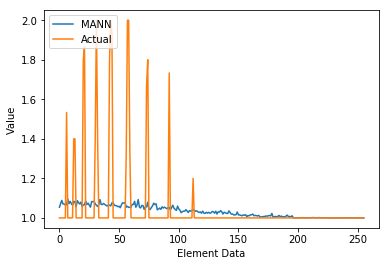

In [10]:
plt.xlabel('Element Data')
plt.ylabel("Value")
plt.plot(a)
plt.plot(actual_output)
plt.legend(['MANN', 'Actual'], loc = 'upper left')
plt.show()

In [0]:
# Evaluate the results using 
# evaluate(x=None, y=None, batch_size=None, verbose=1, sample_weight=None, steps=None, ca)

In [0]:
# Save the networks
save_path = '/content/gdrive/My Drive/Colab Notebooks/Networks/MANN/b2c_sgd_mann/'
output_network_name = 'b2c_nonoise_208_'+str(hidden_layer_neurons)+'_'+str(P)+'_mann_';

index = np.linspace(start=0; stop =P, dtype = int)
for x in index:
  mann[x].save(save_path+output_network_name+str(x)+'.h5')
  